# **Risk and Return Management: An Integrative Approach to Portfolio Optimization Using the Markowitz Model, and Monte Carlo Simulation**

---
The project aims to analyse stock market data, forecast future stock values, and assess risk for selected assets. Here is the structure for this notebook:
1. Exploratory Data Analysis
2. Implementation
  *   Visualization of of the Open, Close, and Volume of the Top Ten Companies in the Dataset from 2008 to 2013.
  *   Calculation of annual returns for 10 years for each security.
  *   Calculation of average returns and standard deviation for 10 years for each security.
  *   Calculation of the Covariance matrix for each security.
  *   Portfolio diversification with budget constraints.
  *   Generation of Effecient Frontier with Markowitz's Portfolio Theory.
  *   Calculation of the Sharpe Ratio and Sortino Index for all the securities and visualization of the portfolio which has best Sharpe Ratio and Sortino Index in Effecient Frontier.   
  *   Calculation of statistical measures for each years and visualized it.
  *   Forecasting future price changes using Monte Carlo Simulation for Apple Inc.  
  *   Calculation of statistical measures and forecasting price on 100th Day for Apple Inc.
  *   Calculation of call option price using Monte Carlo Simulation for Apple Inc.
  *   Calculation and Generated the stock price path for Apple Inc.


















In [1]:
# Import necessary libraries
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the data from a CSV file
data = pd.read_csv('/content/drive/MyDrive/Practicum/Top50.csv')

# **Exploratory Data Analysis**

In [4]:
# Get the shape of the DataFrame
shape = data.shape

print("Shape of the DataFrame:", shape)

Shape of the DataFrame: (136686, 8)


In [5]:
# Display information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136686 entries, 0 to 136685
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       136686 non-null  object 
 1   Open       136686 non-null  float64
 2   High       136686 non-null  float64
 3   Low        136686 non-null  float64
 4   Close      136686 non-null  float64
 5   Adj Close  136686 non-null  float64
 6   Volume     136686 non-null  int64  
 7   Name       136686 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 8.3+ MB


In [6]:

# Display summary statistics of the data
data.describe()

Open           High            Low          Close  \
count  136686.000000  136686.000000  136686.000000  136686.000000   
mean       66.168839      66.789194      65.524315      66.172411   
std        51.130052      51.565476      50.657737      51.118270   
min         1.500000       1.595000       1.437500       1.475000   
25%        28.590000      28.930000      28.250000      28.600000   
50%        52.529999      53.020000      52.000000      52.512499   
75%        88.790001      89.550003      88.010002      88.818975   
max       421.380005     423.209991     413.079987     418.970001   

           Adj Close        Volume  
count  136686.000000  1.366860e+05  
mean       53.899876  2.768065e+07  
std        45.640622  8.118952e+07  
min         1.353315  3.080000e+04  
25%        21.644444  5.432025e+06  
50%        40.862497  1.031250e+07  
75%        71.691723  2.284360e+07  
max       418.970001  3.372970e+09

In [7]:
# Calculate the number of rows in the DataFrame
num_rows = len(data)

print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 136686


In [8]:
# Calculate the number of columns in the DataFrame
num_columns = len(data.columns)

print("Number of columns in the DataFrame:", num_columns)

Number of columns in the DataFrame: 8


In [9]:
# Get the list of column names
column_names = data.columns.tolist()

print("Column names:")
print(column_names)

Column names:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name']


In [10]:
# Display the first few rows of the DataFrame
data.head()

Date      Open      High       Low     Close  Adj Close      Volume  \
0  2008-01-02  7.116786  7.152143  6.876786  6.958571   5.914387  1079178800   
1  2008-01-03  6.978929  7.049643  6.881786  6.961786   5.917120   842066400   
2  2008-01-04  6.837500  6.892857  6.388929  6.430357   5.465435  1455832000   
3  2008-01-07  6.473214  6.557143  6.079643  6.344286   5.392279  2072193200   
4  2008-01-08  6.433571  6.516429  6.100000  6.116071   5.198310  1523816000   

   Name  
0  AAPL  
1  AAPL  
2  AAPL  
3  AAPL  
4  AAPL

In [11]:
# Display the last few rows of the DataFrame
data.tail()

Date        Open        High         Low       Close  \
136681  2018-12-21  241.889999  251.740005  241.889999  244.910004   
136682  2018-12-24  242.000000  243.699997  233.509995  233.800003   
136683  2018-12-26  237.779999  248.500000  233.500000  248.139999   
136684  2018-12-27  245.000000  251.229996  242.139999  250.850006   
136685  2018-12-28  253.000000  258.059998  251.160004  253.589996   

         Adj Close    Volume  Name  
136681  209.589447  10213800  AVGO  
136682  200.081680   2849400  AVGO  
136683  212.353592   3674100  AVGO  
136684  214.672775   3750700  AVGO  
136685  217.017609   2870200  AVGO

In [12]:
# Access a specific column, retrieve unique values, and display them
# Access the specific column
column_name = 'Name'
column_values = data['Name']

# Retrieve unique values
unique_values = column_values.unique()

# Display the unique values
for value in unique_values:
    print(value)

AAPL
MSFT
XOM
GE
JNJ
AMZN
BRK.B
JPM
WFC
PG
VZ
T
PFE
CVX
GOOGL
CSCO
INTC
WMT
KO
V
PEP
MCD
MRK
IBM
DIS
HON
MMM
ORCL
CMCSA
AMGN
UNH
ABBV
BMY
BA
MO
GILD
CAT
GS
UNP
HD
TXN
MGM
MA
MS
NFLX
NVDA
ADBE
USB
SLB
AVGO


In [13]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isna().sum() / len(data)) * 100

# Display the percentage of missing values for each column
print(missing_percentage)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Name         0.0
dtype: float64


#**Implementation**

---
**Visualization of of the Open, Close, and Volume of the Top Ten Companies in the Dataset from 2008 to 2013.**


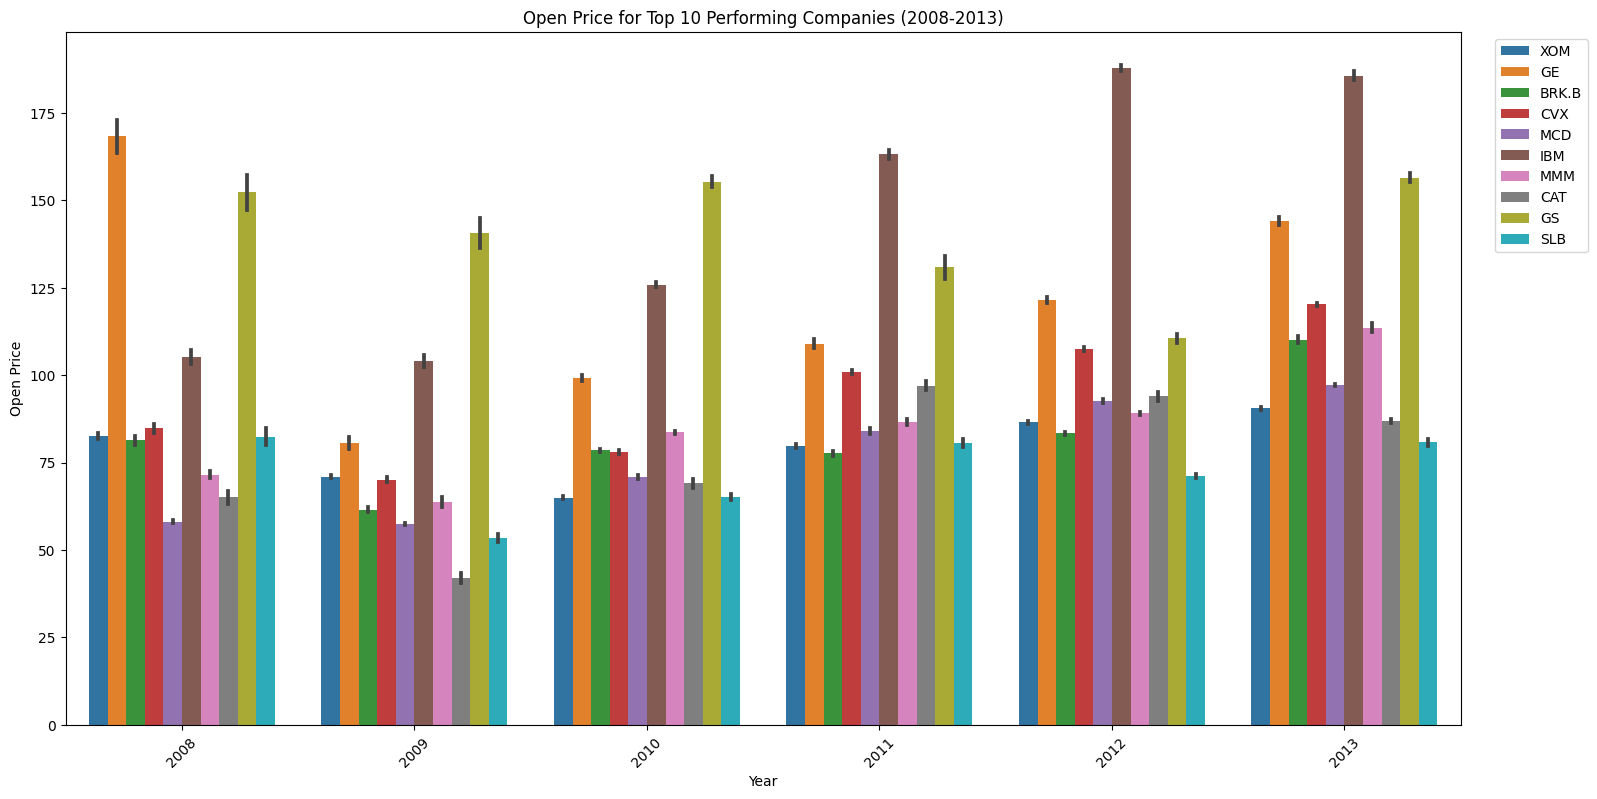

In [14]:
# Convert 'Date' column to datetime format and extract the year
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Filter the data for the years 2008 to 2013 and calculate average values for each year and company
filtered_data = data[(data['Year'] >= 2008) & (data['Year'] <= 2013)]
yearly_data = filtered_data.groupby(['Year', 'Name']).agg({'High': 'mean', 'Low': 'mean', 'Volume': 'mean'}).reset_index()

# Select the top 10 performing companies based on average high value
top_10_companies = yearly_data.groupby('Name').agg({'High': 'mean'}).nlargest(10, 'High').index

# Filter the data for the top performing companies
filtered_data = filtered_data[filtered_data['Name'].isin(top_10_companies)]

# Create a bar chart for the "Open" column of the top 10 companies for the years 2008 to 2013
plt.figure(figsize=(18, 9))
sns.barplot(x='Year', y='Open', hue='Name', data=filtered_data)
plt.xlabel('Year')
plt.ylabel('Open Price')
plt.title('Open Price for Top 10 Performing Companies (2008-2013)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

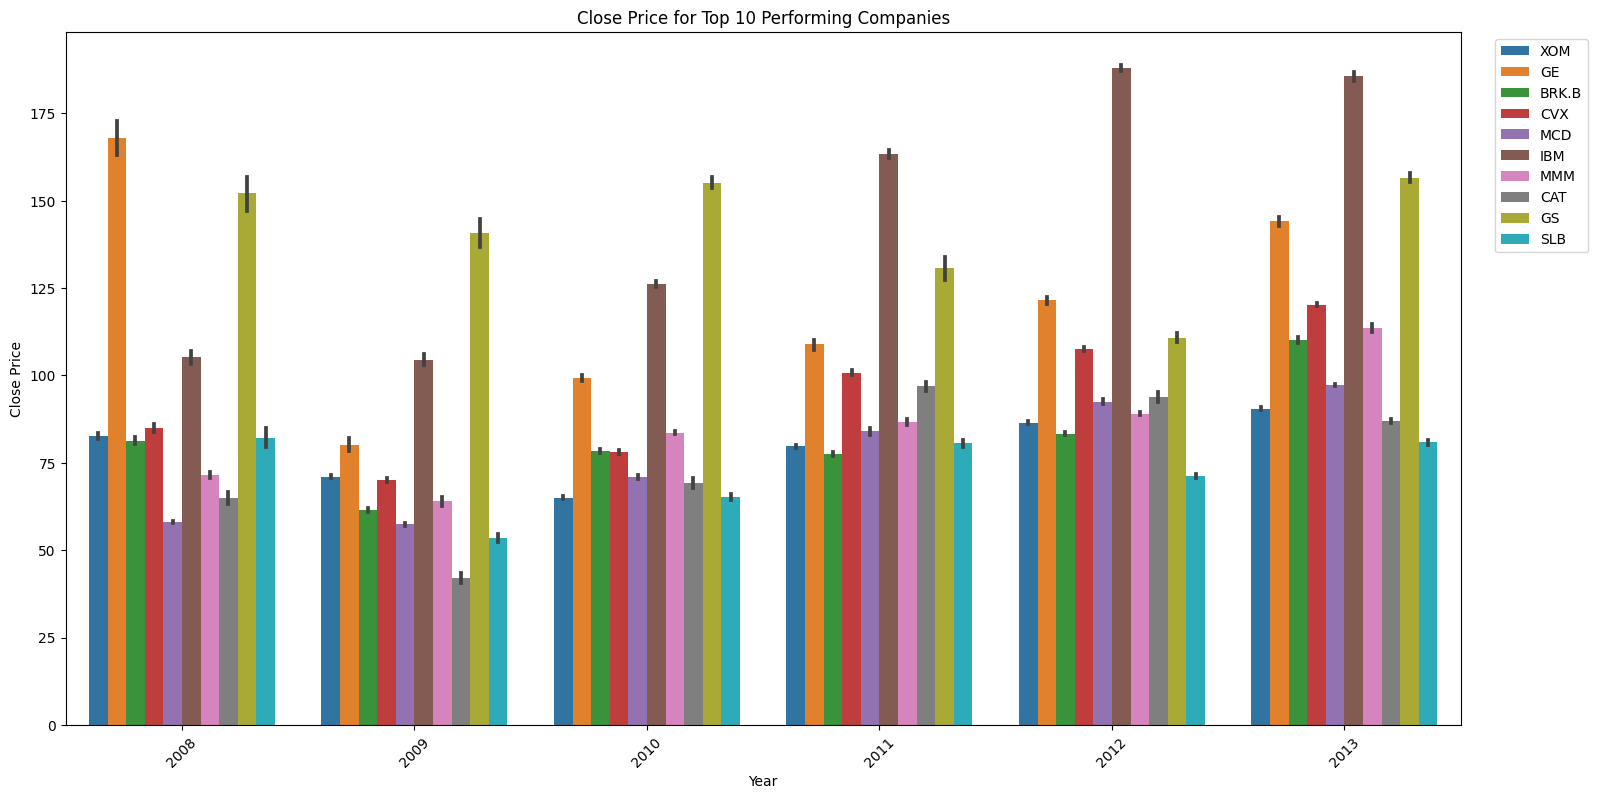

In [15]:
# Create a bar chart for the "Close" column of the top 10 companies
plt.figure(figsize=(18, 9))
sns.barplot(x='Year', y='Close', hue='Name', data=filtered_data)
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Price for Top 10 Performing Companies')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


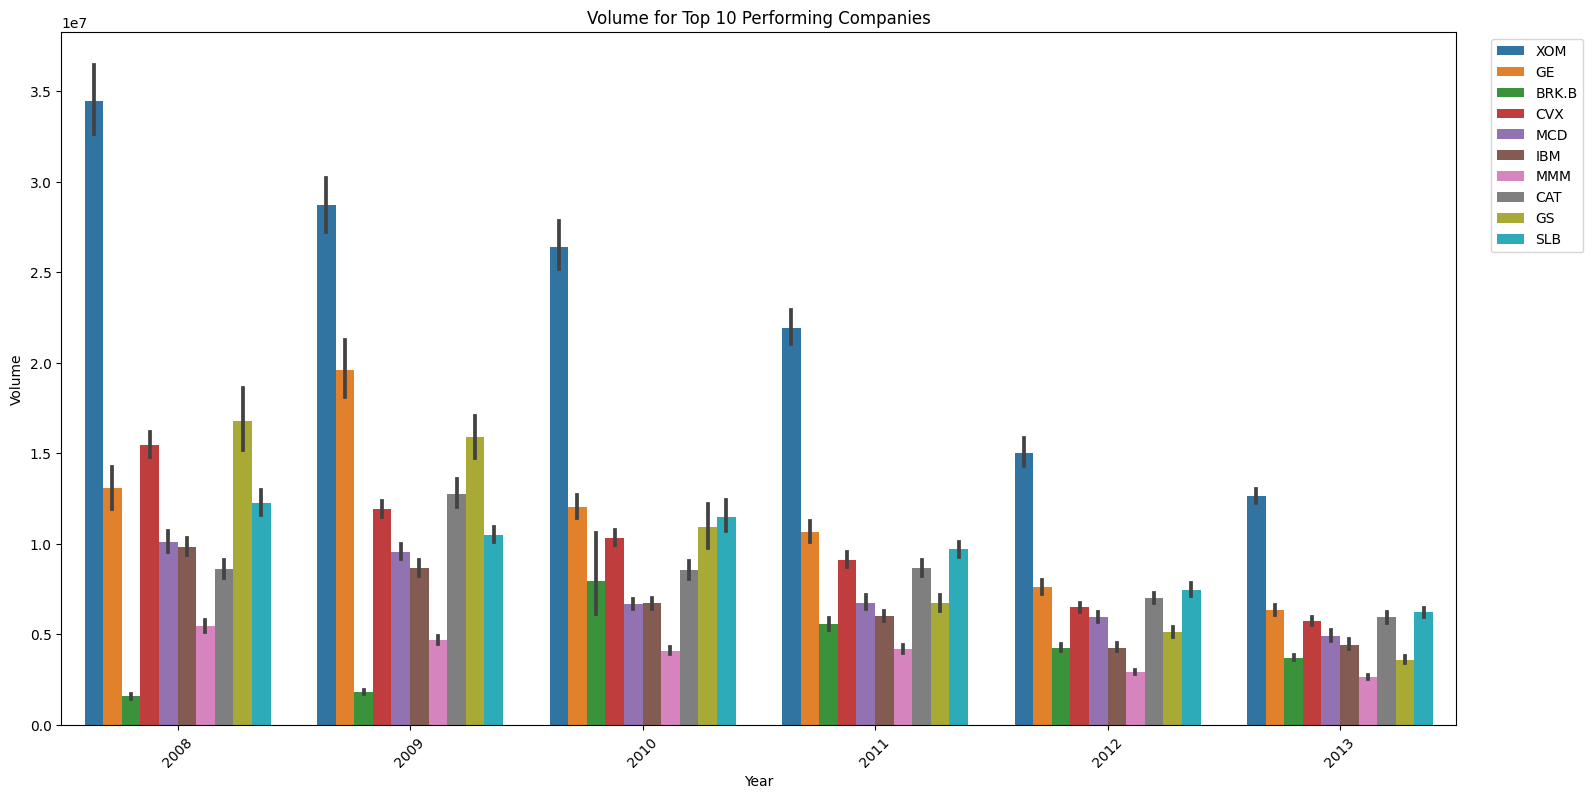

In [16]:
# Create a bar chart for the "Volume" column of the top 10 companies
plt.figure(figsize=(18, 9))
sns.barplot(x='Year', y='Volume', hue='Name', data=filtered_data)
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume for Top 10 Performing Companies')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

**Calculation of annual returns for 10 years for each security.**

In [17]:
# Sort the data by Name and Date, and calculate the rate of return for each company
data_sorted = data.sort_values(by=['Name', 'Date'])  # Sort by Name and Date
data_sorted['Return'] = data_sorted.groupby('Name')['Close'].pct_change() * 100

# Group the data by company and year, and calculate the average return for each company over 10 years
avg_returns = data_sorted.groupby(['Name', data_sorted['Date'].dt.year])['Return'].mean().reset_index()

# Beautify the output by formatting the average returns to two decimal places
avg_returns['Average Return'] = avg_returns['Return'].map('{:.2f}%'.format)

# Print the average returns for each company over 10 years
for company, group in avg_returns.groupby('Name'):
    print(f"Company: {company}")
    print(group[['Date', 'Average Return']])
    print()


Company: AAPL
    Date Average Return
0   2008         -0.26%
1   2009          0.38%
2   2010          0.18%
3   2011          0.10%
4   2012          0.13%
5   2013          0.04%
6   2014          0.14%
7   2015         -0.00%
8   2016          0.05%
9   2017          0.16%
10  2018         -0.02%

Company: ABBV
    Date Average Return
11  2013          0.17%
12  2014          0.10%
13  2015         -0.02%
14  2016          0.04%
15  2017          0.18%
16  2018          0.00%

Company: ADBE
    Date Average Return
17  2008         -0.21%
18  2009          0.26%
19  2010         -0.04%
20  2011         -0.01%
21  2012          0.13%
22  2013          0.20%
23  2014          0.09%
24  2015          0.11%
25  2016          0.05%
26  2017          0.22%
27  2018          0.12%

Company: AMGN
    Date Average Return
28  2008          0.12%
29  2009          0.01%
30  2010         -0.00%
31  2011          0.07%
32  2012          0.12%
33  2013          0.13%
34  2014          0.14%
35  2

**Calculation of average returns and standard deviation for 10 years for each security.**

In [18]:
# Group the data by company and calculate the average return over 10 years
avg_returns_10yr = data_sorted.groupby('Name')['Return'].mean().reset_index()
avg_returns_10yr.rename(columns={'Return': 'Average Return 10 Years'}, inplace=True)

# Calculate the standard deviation of the average 10-year returns for each company
std_dev_10yr = data_sorted.groupby('Name')['Return'].std().reset_index()
std_dev_10yr.rename(columns={'Return': 'Standard Deviation 10 Years'}, inplace=True)

# Print the standard deviation of the average 10-year returns for each company
result = pd.merge(avg_returns_10yr, std_dev_10yr, on='Name')
print(result)

     Name  Average Return 10 Years  Standard Deviation 10 Years
0    AAPL                 0.081449                     1.950283
1    ABBV                 0.078376                     1.738858
2    ADBE                 0.083321                     2.130417
3    AMGN                 0.064977                     1.680868
4    AMZN                 0.127565                     2.415890
5    AVGO                 0.139785                     2.165227
6      BA                 0.063588                     1.832774
7     BMY                 0.036851                     1.590462
8   BRK.B                 0.038899                     1.455617
9     CAT                 0.042416                     2.080860
10  CMCSA                 0.066752                     1.888536
11   CSCO                 0.034153                     1.836811
12    CVX                 0.019906                     1.704511
13    DIS                 0.058262                     1.697307
14     GE                -0.036434      

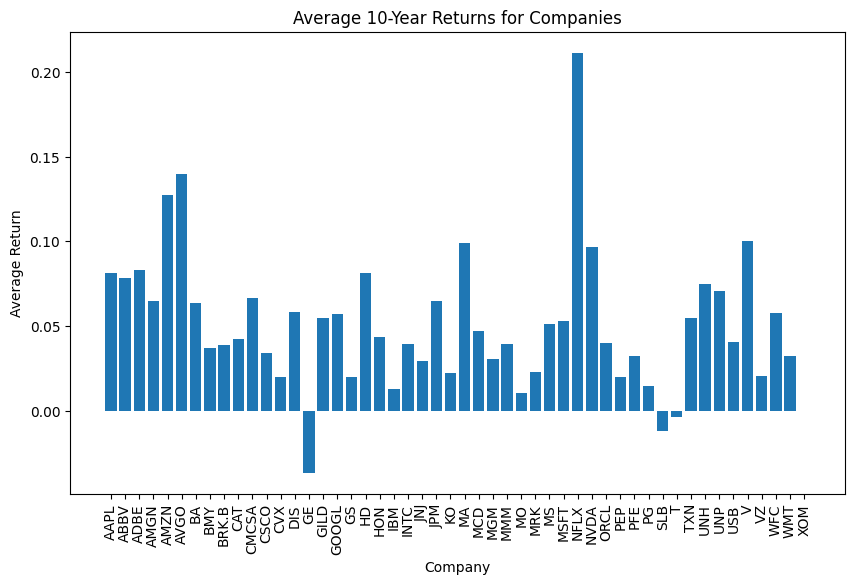

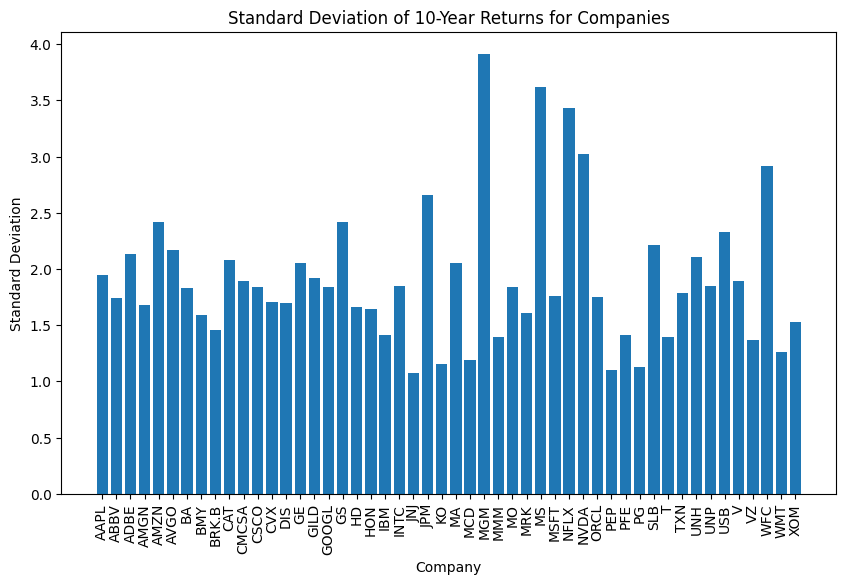

In [19]:
# Plotting the average 10-year returns
plt.figure(figsize=(10, 6))
plt.bar(result['Name'], result['Average Return 10 Years'])
plt.xlabel('Company')
plt.ylabel('Average Return')
plt.title('Average 10-Year Returns for Companies')
plt.xticks(rotation=90)
plt.show()

# Plotting the standard deviation of 10-year returns
plt.figure(figsize=(10, 6))
plt.bar(result['Name'], result['Standard Deviation 10 Years'])
plt.xlabel('Company')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of 10-Year Returns for Companies')
plt.xticks(rotation=90)
plt.show()


**Calculation of the Covariance matrix for each security.**

In [20]:
# Calculate the covariance between securities
covariance_matrix = data_sorted.pivot_table(values='Return', index='Date', columns='Name', aggfunc='mean').cov()

# Set the pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the covariance matrix
print(covariance_matrix)

Name       AAPL      ABBV      ADBE      AMGN      AMZN      AVGO        BA  \
Name                                                                          
AAPL   3.803606  0.564085  1.941260  1.111447  2.206261  1.500716  1.546011   
ABBV   0.564085  3.023628  0.905953  1.331190  0.870844  0.917983  0.725516   
ADBE   1.941260  0.905953  4.538676  1.440178  2.537923  1.464812  1.977700   
AMGN   1.111447  1.331190  1.440178  2.825317  1.460367  1.007444  1.262436   
AMZN   2.206261  0.870844  2.537923  1.460367  5.836523  1.470146  1.850512   
AVGO   1.500716  0.917983  1.464812  1.007444  1.470146  4.688210  1.188384   
BA     1.546011  0.725516  1.977700  1.262436  1.850512  1.188384  3.359061   
BMY    0.926408  1.066067  1.221076  1.202998  1.098882  0.638410  1.097794   
BRK.B  1.047826  0.673882  1.367876  0.941429  1.318570  0.981059  1.427561   
CAT    1.910513  0.773872  2.291959  1.263229  2.154270  1.492563  2.233016   
CMCSA  1.495134  0.667849  2.051721  1.338310  1.845

**Portfolio diversification with budget constraints.**

In [21]:
# Allocate the budget to a random selection of companies based on random weights
budget = 8000
companies = data["Name"].unique()
num_companies = random.randint(6, 7)
selected_companies = random.sample(companies.tolist(), num_companies)

# Generate random weights for each selected company
weights = [random.uniform(0, 1) for _ in range(num_companies)]
total_weight = sum(weights)
normalized_weights = [weight / total_weight for weight in weights]

# Calculate the allocated amount for each selected company
allocated_amounts = [budget * weight for weight in normalized_weights]

# Print the selected companies, their weights, and allocated amounts
print("Selected Companies:")
for i in range(num_companies):
    company = selected_companies[i]
    weight = normalized_weights[i]
    allocation = allocated_amounts[i]
    print(f"{company}: Weight={weight:.4f}, Allocated Amount=${allocation:.2f}")


Selected Companies:
VZ: Weight=0.2912, Allocated Amount=$2329.71
CVX: Weight=0.0938, Allocated Amount=$750.10
KO: Weight=0.0818, Allocated Amount=$654.42
UNP: Weight=0.1157, Allocated Amount=$925.92
MS: Weight=0.1010, Allocated Amount=$807.92
ABBV: Weight=0.3165, Allocated Amount=$2531.93


In [22]:
# Create an empty dictionary to store the annual returns for each year
portfolio_returns = {}

# Iterate over the selected companies
for company in selected_companies:
    # Filter the data for the current company
    company_data = data[data['Name'] == company]

    # Iterate over the years in the dataset
    for year in company_data['Year'].unique():
        # Filter the data for the current year and company
        year_data = company_data[company_data['Year'] == year]

        # Calculate the annual return for the current year and company
        annual_return = (year_data['Close'].iloc[-1] - year_data['Open'].iloc[0]) / year_data['Open'].iloc[0]

        # Check if the current year is already in the portfolio_returns dictionary
        if year in portfolio_returns:
            # If it is, add the annual return of the current company to the existing value
            portfolio_returns[year] += annual_return
        else:
            # If it's not, initialize the value with the annual return of the current company
            portfolio_returns[year] = annual_return

# Print the yearly portfolio returns
print("Yearly Portfolio Returns:")
for year, return_value in portfolio_returns.items():
    print(f"Year {year}: Return={return_value:.4f}")


Yearly Portfolio Returns:
Year 2008: Return=-1.6374
Year 2009: Return=1.4457
Year 2010: Return=0.7808
Year 2011: Return=0.0123
Year 2012: Return=0.4786
Year 2013: Return=1.7320
Year 2014: Return=0.7901
Year 2015: Return=-0.8223
Year 2016: Return=1.2662
Year 2017: Return=1.1822
Year 2018: Return=-0.3683


In [23]:
# Create an empty dictionary to store the annual portfolio variances for each year
portfolio_variances = {}

# Iterate over the selected companies
for company in selected_companies:
    # Filter the data for the current company
    company_data = data[data['Name'] == company]

    # Iterate over the years in the dataset
    for year in company_data['Year'].unique():
        # Filter the data for the current year and company
        year_data = company_data[company_data['Year'] == year]

        # Calculate the daily returns for the current year and company
        daily_returns = (year_data['Close'] - year_data['Open']) / year_data['Open']

        # Calculate the annual portfolio variance for the current year and company
        portfolio_variance = np.var(daily_returns, ddof=1)

        # Check if the current year is already in the portfolio_variances dictionary
        if year in portfolio_variances:
            # If it is, add the portfolio variance of the current company to the existing value
            portfolio_variances[year].append(portfolio_variance)
        else:
            # If it's not, initialize the value with a list containing the portfolio variance of the current company
            portfolio_variances[year] = [portfolio_variance]

# Calculate the average portfolio variance for each year
average_variances = {year: np.mean(variances) for year, variances in portfolio_variances.items()}

# Print the yearly portfolio variances
print("Yearly Portfolio Variances:")
for year, variance in average_variances.items():
    print(f"Year {year}: Variance={variance:.6f}")


Yearly Portfolio Variances:
Year 2008: Variance=0.001268
Year 2009: Variance=0.000607
Year 2010: Variance=0.000153
Year 2011: Variance=0.000285
Year 2012: Variance=0.000151
Year 2013: Variance=0.000119
Year 2014: Variance=0.000114
Year 2015: Variance=0.000159
Year 2016: Variance=0.000157
Year 2017: Variance=0.000081
Year 2018: Variance=0.000199


In [24]:
# Create an empty dictionary to store the annual portfolio standard deviations for each year
portfolio_std_deviations = {}

# Iterate over the selected companies
for company in selected_companies:
    # Filter the data for the current company
    company_data = data[data['Name'] == company]

    # Iterate over the years in the dataset
    for year in company_data['Year'].unique():
        # Filter the data for the current year and company
        year_data = company_data[company_data['Year'] == year]

        # Calculate the daily returns for the current year and company
        daily_returns = (year_data['Close'] - year_data['Open']) / year_data['Open']

        # Calculate the annual portfolio standard deviation for the current year and company
        portfolio_std_deviation = np.std(daily_returns, ddof=1)

        # Check if the current year is already in the portfolio_std_deviations dictionary
        if year in portfolio_std_deviations:
            # If it is, add the portfolio standard deviation of the current company to the existing value
            portfolio_std_deviations[year].append(portfolio_std_deviation)
        else:
            # If it's not, initialize the value with a list containing the portfolio standard deviation of the current company
            portfolio_std_deviations[year] = [portfolio_std_deviation]

# Calculate the average portfolio standard deviation for each year
average_std_deviations = {year: np.mean(std_deviations) for year, std_deviations in portfolio_std_deviations.items()}

# Print the yearly portfolio standard deviations
print("Yearly Portfolio Standard Deviations:")
for year, std_deviation in average_std_deviations.items():
    print(f"Year {year}: Standard Deviation={std_deviation:.6f}")


Yearly Portfolio Standard Deviations:
Year 2008: Standard Deviation=0.032703
Year 2009: Standard Deviation=0.021845
Year 2010: Standard Deviation=0.011746
Year 2011: Standard Deviation=0.015058
Year 2012: Standard Deviation=0.011304
Year 2013: Standard Deviation=0.010455
Year 2014: Standard Deviation=0.010402
Year 2015: Standard Deviation=0.012158
Year 2016: Standard Deviation=0.012090
Year 2017: Standard Deviation=0.008799
Year 2018: Standard Deviation=0.013798


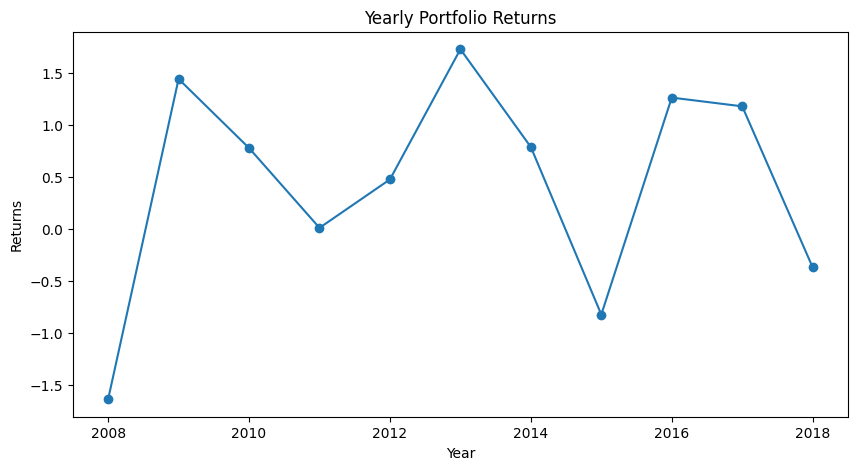

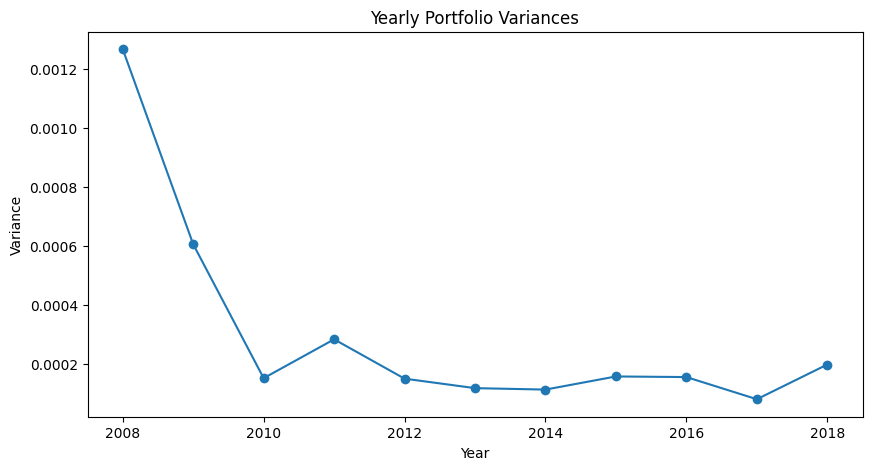

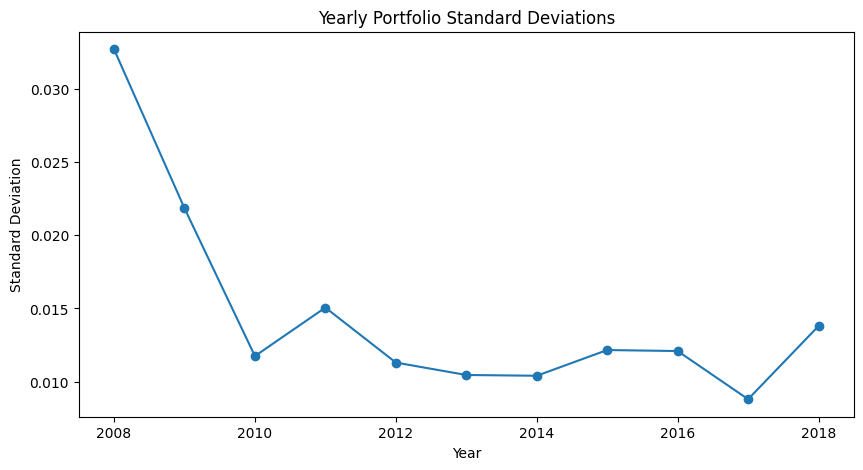

In [25]:
# Plotting the returns
plt.figure(figsize=(10, 5))
plt.plot(list(portfolio_returns.keys()), list(portfolio_returns.values()), marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.title('Yearly Portfolio Returns')
plt.show()

# Plotting the variances
plt.figure(figsize=(10, 5))
plt.plot(list(average_variances.keys()), list(average_variances.values()), marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Variance')
plt.title('Yearly Portfolio Variances')
plt.show()


# Plotting the standard deviations
plt.figure(figsize=(10, 5))
plt.plot(list(average_std_deviations.keys()), list(average_std_deviations.values()), marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Yearly Portfolio Standard Deviations')
plt.show()



**Generation of Effecient Frontier with Markowitz's Portfolio Theory.**

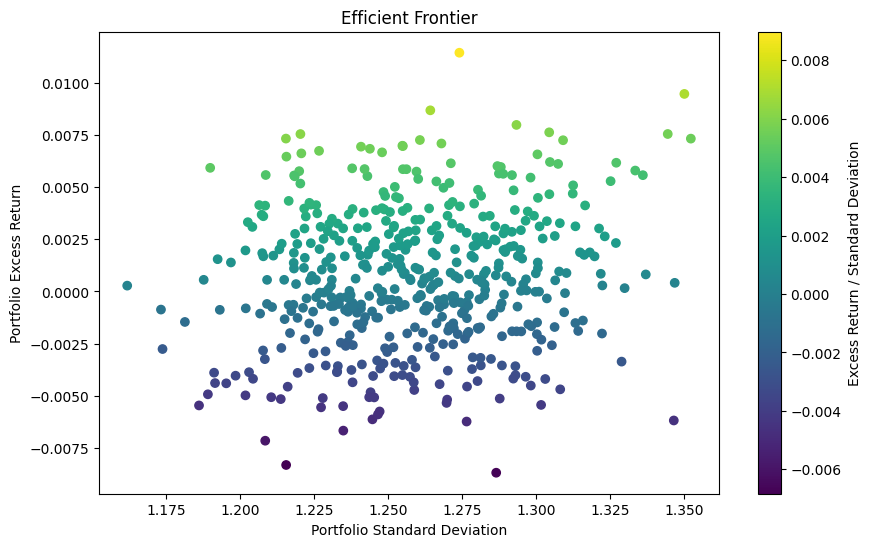

In [26]:
# Define the risk-free rate
risk_free_rate = 0.05

# Define the number of portfolios to generate
num_portfolios = 500

# Set random seed for reproducibility
np.random.seed(42)

# Generate portfolio weights
weights = np.random.random((num_portfolios, len(avg_returns_10yr)))
weights /= np.sum(weights, axis=1, keepdims=True)  # Ensure the weights sum up to 1 for each portfolio

# Convert average 10-year returns to a numpy array
avg_returns = avg_returns_10yr['Average Return 10 Years'].values

# Calculate portfolio expected returns and standard deviations
portfolio_returns = np.dot(weights, avg_returns)
portfolio_std_devs = np.zeros(num_portfolios)
for i in range(num_portfolios):
    portfolio_std_devs[i] = np.sqrt(np.dot(weights[i].T, np.dot(covariance_matrix, weights[i])))

# Calculate portfolio excess returns
portfolio_excess_returns = portfolio_returns - risk_free_rate

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std_devs, portfolio_excess_returns, c=portfolio_excess_returns / portfolio_std_devs, marker='o')
plt.colorbar(label='Excess Return / Standard Deviation')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Excess Return')
plt.title('Efficient Frontier')
plt.show()


 **Calculation of the Sharpe Ratio and Sortino Index for all the securities and visualization of the portfolio which has best Sharpe Ratio and Sortino Index in Effecient Frontier.**

In [27]:
# Define the risk-free rate
risk_free_rate = 0.05

# Calculate the excess returns by subtracting the risk-free rate from the average returns
excess_returns = avg_returns_10yr['Average Return 10 Years'] - risk_free_rate

# Calculate the downside deviation for each security
downside_returns = avg_returns_10yr['Average Return 10 Years'].copy()
downside_returns[downside_returns > 0] = 0  # Set positive returns to 0
downside_deviation = np.sqrt(np.mean(downside_returns**2))

# Calculate the Sharpe ratio for each security
sharpe_ratio = excess_returns / std_dev_10yr['Standard Deviation 10 Years']

# Calculate the Sortino ratio for each security
sortino_ratio = excess_returns / downside_deviation

# Create a DataFrame to store the calculated metrics
metrics_df = pd.DataFrame({
    'Security': avg_returns_10yr['Name'],
    'Sharpe Ratio': sharpe_ratio,
    'Sortino Ratio': sortino_ratio
})

# Print the metrics DataFrame
print(metrics_df)


   Security  Sharpe Ratio  Sortino Ratio
0      AAPL      0.016125       5.776917
1      ABBV      0.016319       5.212441
2      ADBE      0.015640       6.120698
3      AMGN      0.008910       2.751059
4      AMZN      0.032106      14.247956
5      AVGO      0.041467      16.492732
6        BA      0.007414       2.495929
7       BMY     -0.008267      -2.415303
8     BRK.B     -0.007626      -2.039150
9       CAT     -0.003645      -1.393058
10    CMCSA      0.008871       3.077237
11     CSCO     -0.008627      -2.910871
12      CVX     -0.017656      -5.528008
13      DIS      0.004868       1.517647
14       GE     -0.042186     -15.877079
15     GILD      0.002507       0.884968
16    GOOGL      0.003843       1.297862
17       GS     -0.012283      -5.462750
18       HD      0.018961       5.772089
19      HON     -0.004002      -1.207354
20      IBM     -0.026424      -6.846710
21     INTC     -0.005833      -1.981661
22      JNJ     -0.019081      -3.759818
23      JPM     

Best Sharpe Ratio Portfolio:
Standard Deviation: 1.2741
Excess Return: 0.0114
Sharpe Ratio: 0.0090
Best Sortino Index Portfolio:
Standard Deviation: 1.2741
Excess Return: 0.0114
Sortino Index: 2.1010


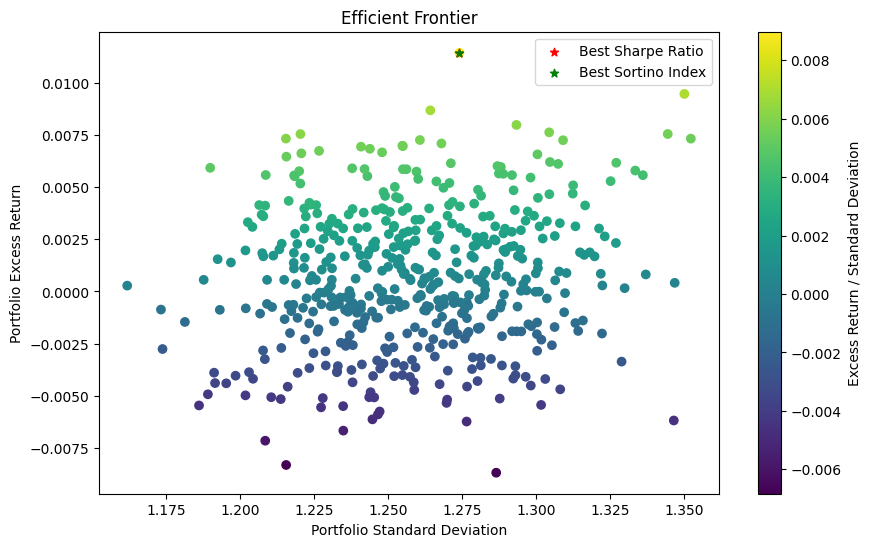

In [28]:
# Calculate the Sharpe ratio for each portfolio
sharpe_ratio = portfolio_excess_returns / portfolio_std_devs

# Calculate the Sortino index for each portfolio
sortino_index = portfolio_excess_returns / downside_deviation

# Find the portfolio with the highest Sharpe ratio
best_sharpe_portfolio_index = np.argmax(sharpe_ratio)
best_sharpe_ratio = sharpe_ratio[best_sharpe_portfolio_index]
best_sharpe_std_dev = portfolio_std_devs[best_sharpe_portfolio_index]
best_sharpe_excess_return = portfolio_excess_returns[best_sharpe_portfolio_index]

# Find the portfolio with the highest Sortino index
best_sortino_portfolio_index = np.argmax(sortino_index)
best_sortino_index = sortino_index[best_sortino_portfolio_index]
best_sortino_std_dev = portfolio_std_devs[best_sortino_portfolio_index]
best_sortino_excess_return = portfolio_excess_returns[best_sortino_portfolio_index]

# Print the results
print("Best Sharpe Ratio Portfolio:")
print(f"Standard Deviation: {best_sharpe_std_dev:.4f}")
print(f"Excess Return: {best_sharpe_excess_return:.4f}")
print(f"Sharpe Ratio: {best_sharpe_ratio:.4f}")

print("Best Sortino Index Portfolio:")
print(f"Standard Deviation: {best_sortino_std_dev:.4f}")
print(f"Excess Return: {best_sortino_excess_return:.4f}")
print(f"Sortino Index: {best_sortino_index:.4f}")

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std_devs, portfolio_excess_returns, c=portfolio_excess_returns / portfolio_std_devs, marker='o')
plt.colorbar(label='Excess Return / Standard Deviation')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Excess Return')
plt.title('Efficient Frontier')

# Highlight portfolio with the best Sharpe ratio
plt.scatter(best_sharpe_std_dev, best_sharpe_excess_return, color='red', marker='*', label='Best Sharpe Ratio')

# Highlight portfolio with the best Sortino index
plt.scatter(best_sortino_std_dev, best_sortino_excess_return, color='green', marker='*', label='Best Sortino Index')

plt.legend()
plt.show()

**Calculation of statistical measures for each years and visualized it.**

In [29]:
# Calculate gross profit for each trading day for each company
data['Gross_Profit'] = data['Close'] * data['Volume']

# Calculate the mean, standard deviation, 10th percentile, and 90th percentile of gross profit for each company and each year
analysis_results = data.groupby(['Name', 'Year'])['Gross_Profit'].agg(['mean', 'std', lambda x: x.quantile(0.1), lambda x: x.quantile(0.9)]).reset_index()
analysis_results.rename(columns={'<lambda_0>': '10th Percentile', '<lambda_1>': '90th Percentile'}, inplace=True)

# Display analysis results for each company and each year
for company in analysis_results['Name'].unique():
    company_data = analysis_results[analysis_results['Name'] == company]
    print(f"Company: {company}")
    for _, row in company_data.iterrows():
        print(f"Year: {row['Year']}")
        print(f"Mean Gross Profit: {row['mean']:.2f}")
        print(f"Standard Deviation: {row['std']:.2f}")
        print(f"10th Percentile of Gross Profit: {row['10th Percentile']:.2f}")
        print(f"90th Percentile of Gross Profit: {row['90th Percentile']:.2f}")
        print()

Company: AAPL
Year: 2008
Mean Gross Profit: 5532562119.59
Standard Deviation: 2154829316.03
10th Percentile of Gross Profit: 3509468822.71
90th Percentile of Gross Profit: 7758547541.25

Year: 2009
Mean Gross Profit: 2839530332.98
Standard Deviation: 1028810889.98
10th Percentile of Gross Profit: 1946776273.65
90th Percentile of Gross Profit: 4220271972.39

Year: 2010
Mean Gross Profit: 5457116612.72
Standard Deviation: 2233568539.50
10th Percentile of Gross Profit: 3156884048.49
90th Percentile of Gross Profit: 8333628539.03

Year: 2011
Mean Gross Profit: 6421558541.47
Standard Deviation: 2919818826.85
10th Percentile of Gross Profit: 3669777025.57
90th Percentile of Gross Profit: 10267641111.81

Year: 2012
Mean Gross Profit: 10885038377.94
Standard Deviation: 4805465460.22
10th Percentile of Gross Profit: 5405022435.59
90th Percentile of Gross Profit: 17707890613.25

Year: 2013
Mean Gross Profit: 6810511039.08
Standard Deviation: 2892730762.02
10th Percentile of Gross Profit: 4153549

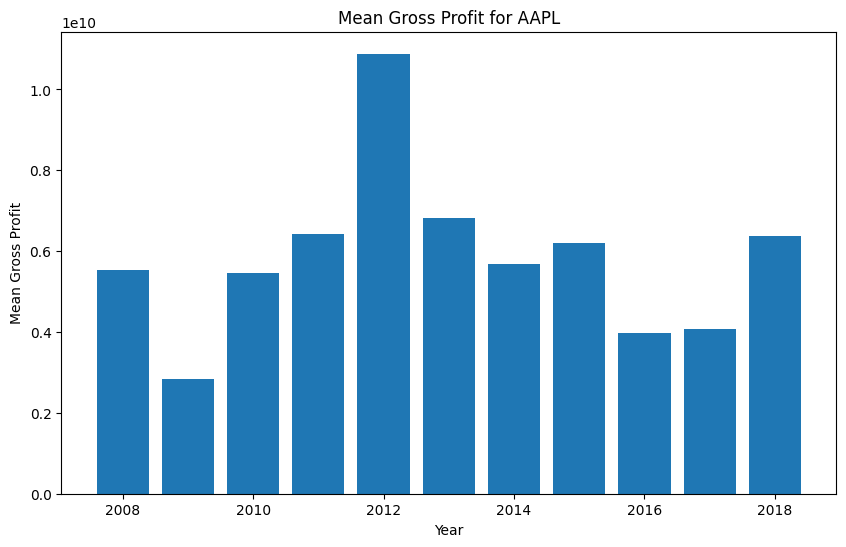

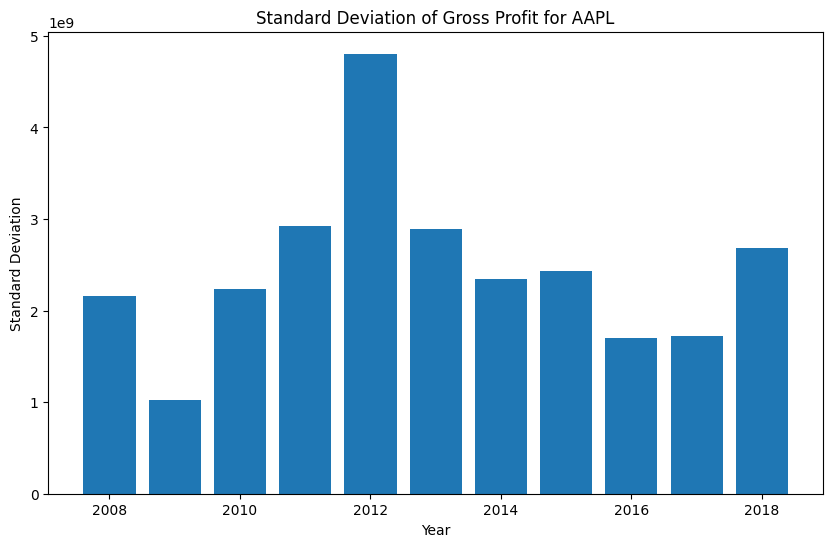

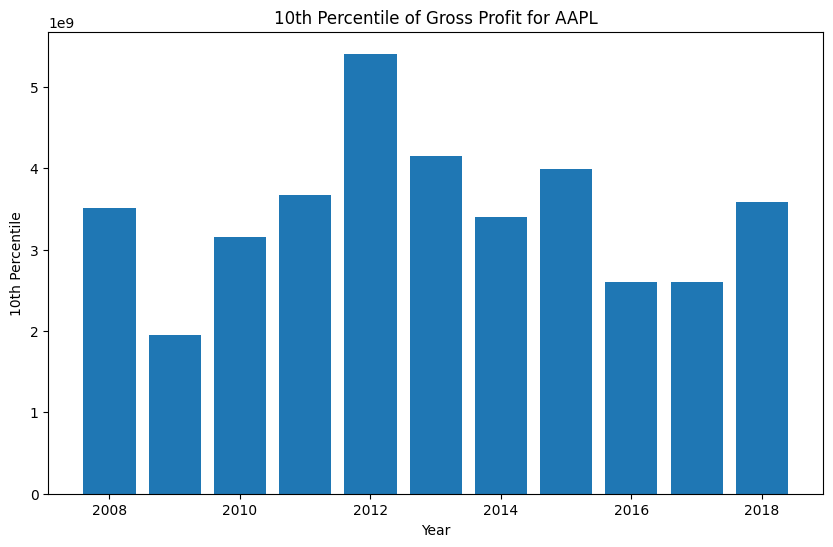

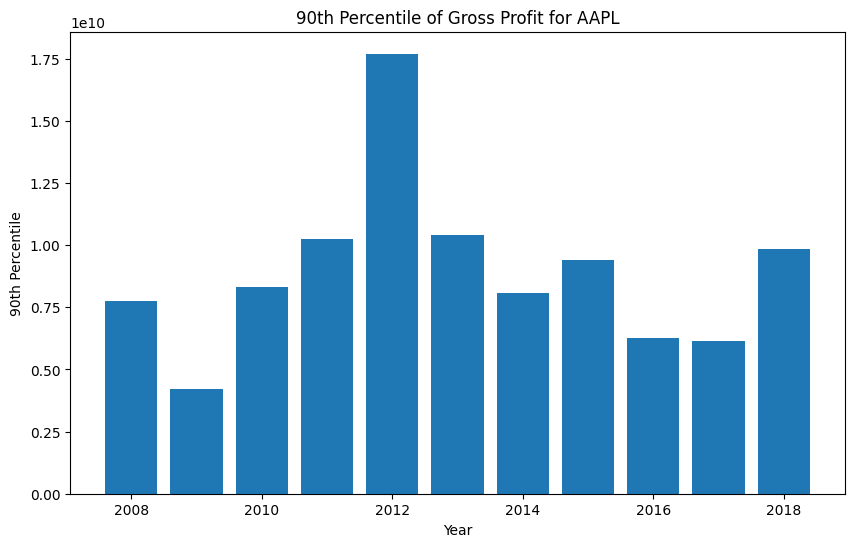

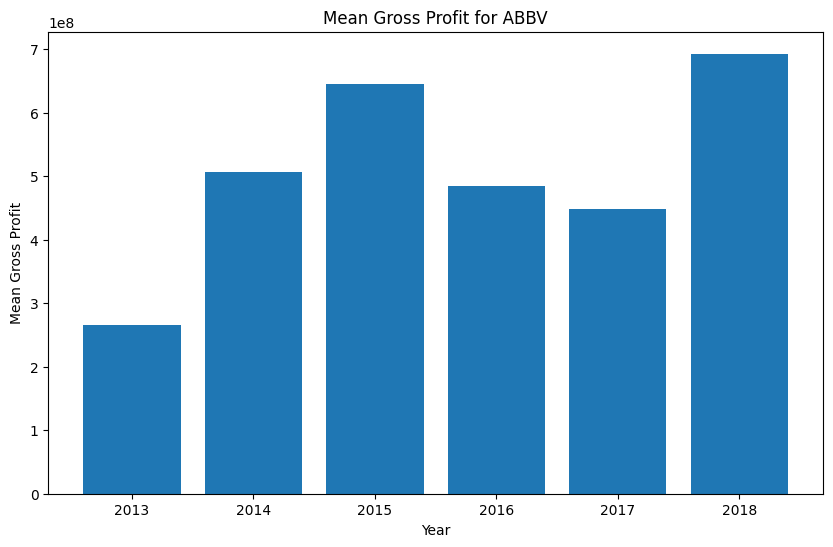

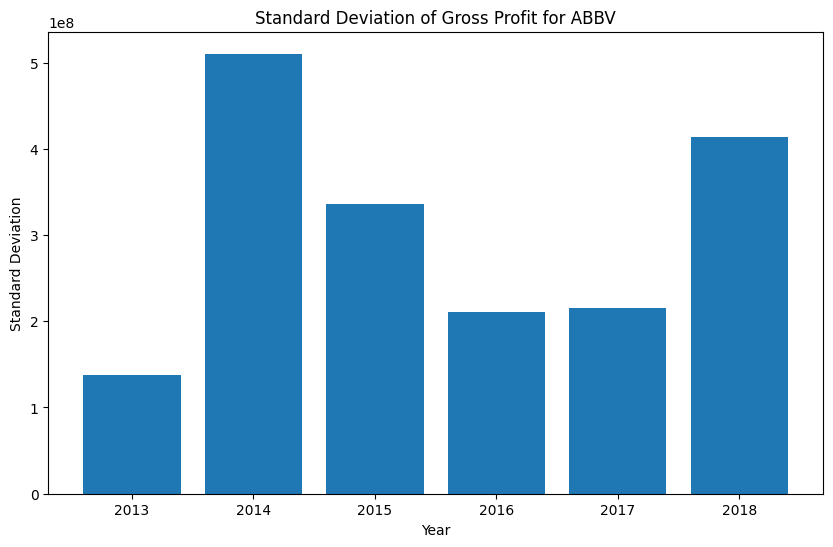

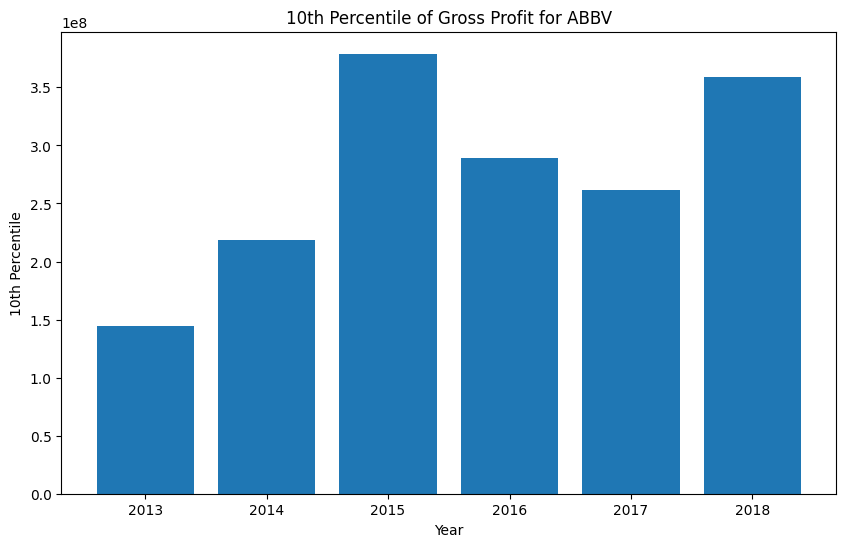

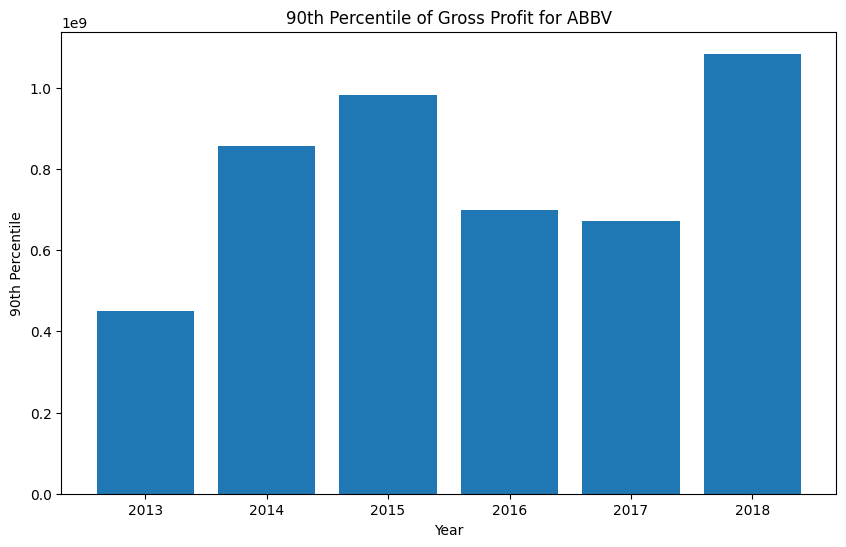

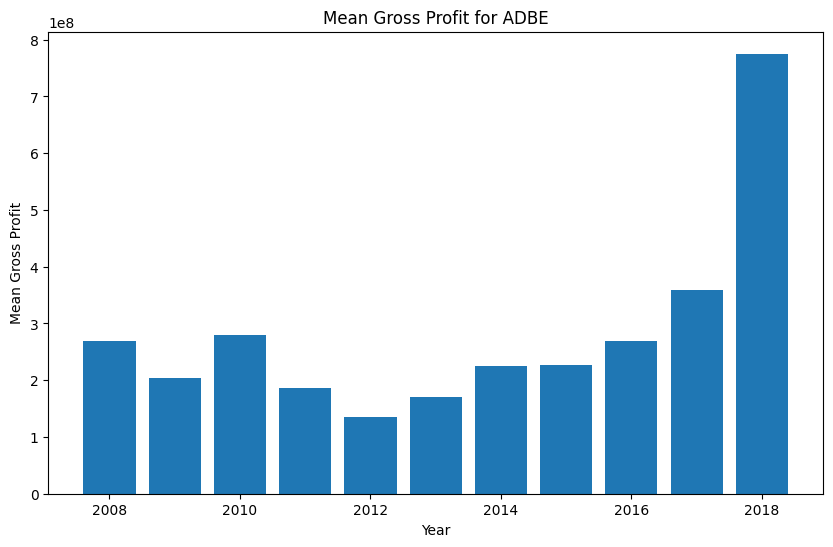

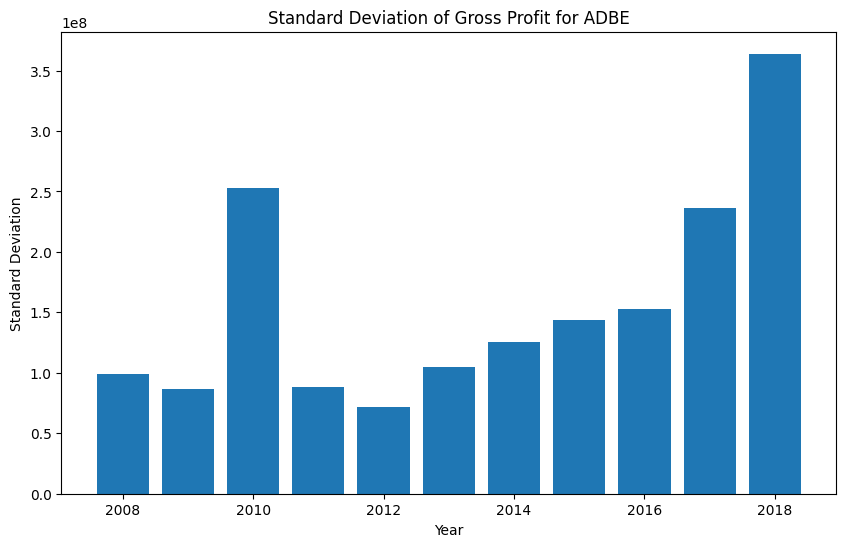

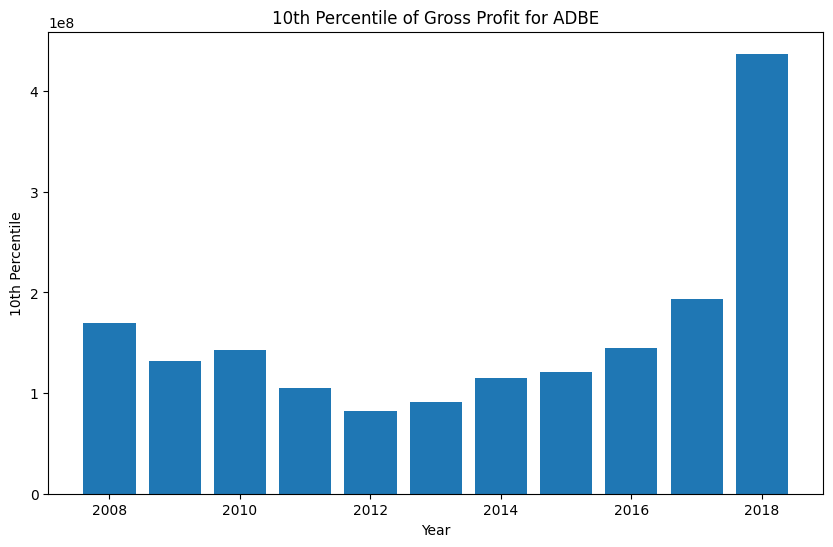

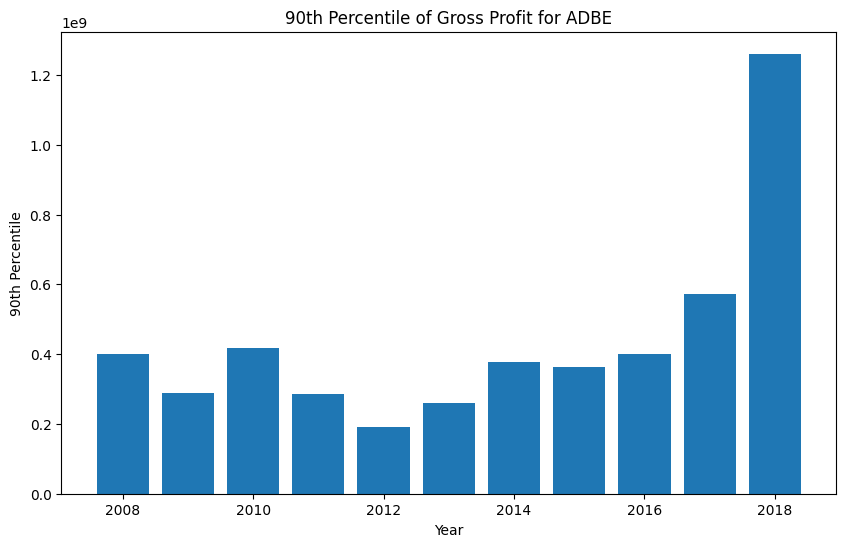

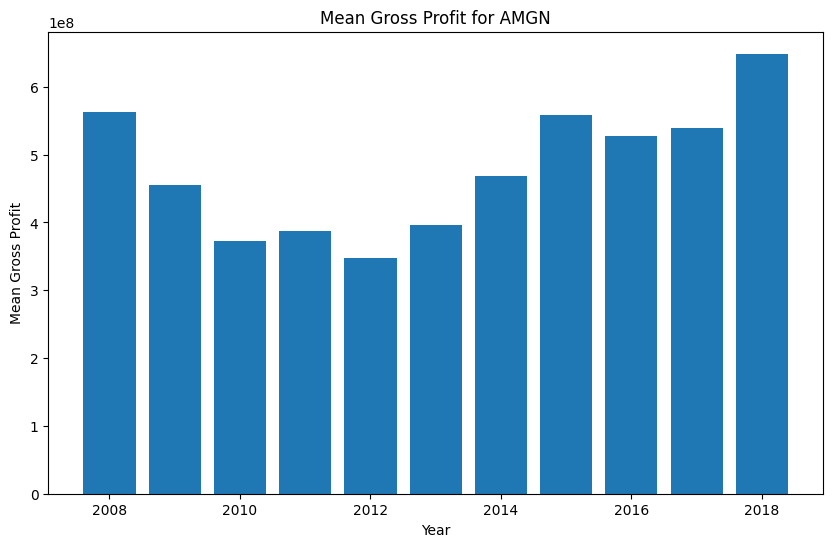

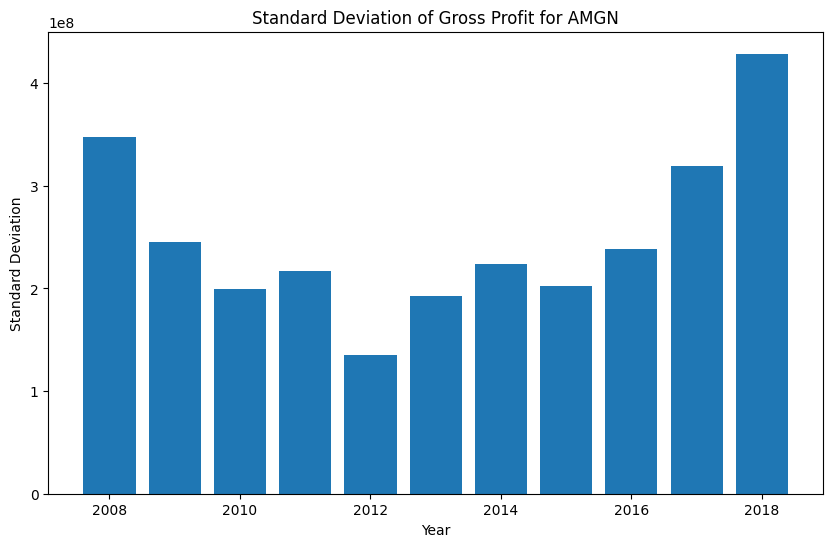

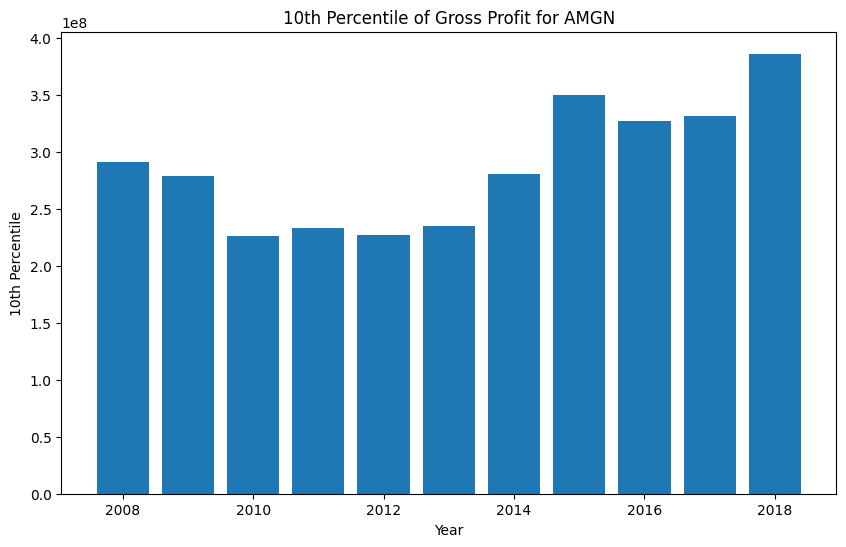

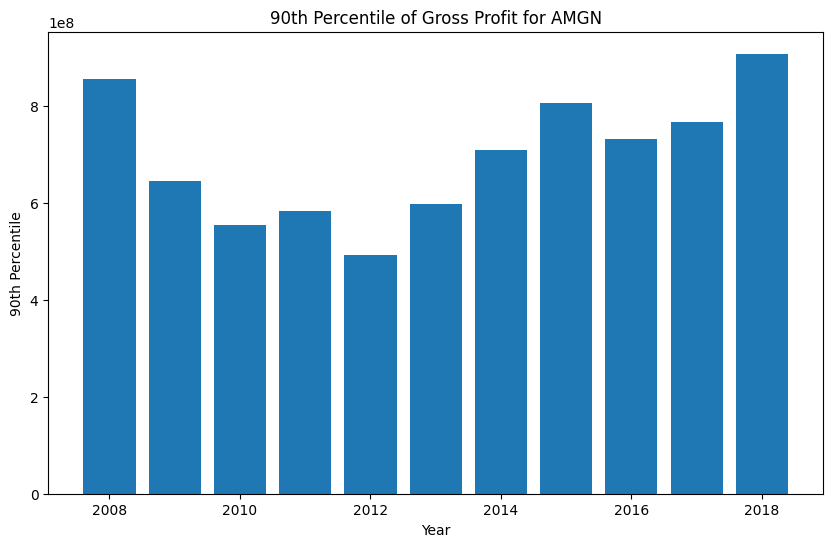

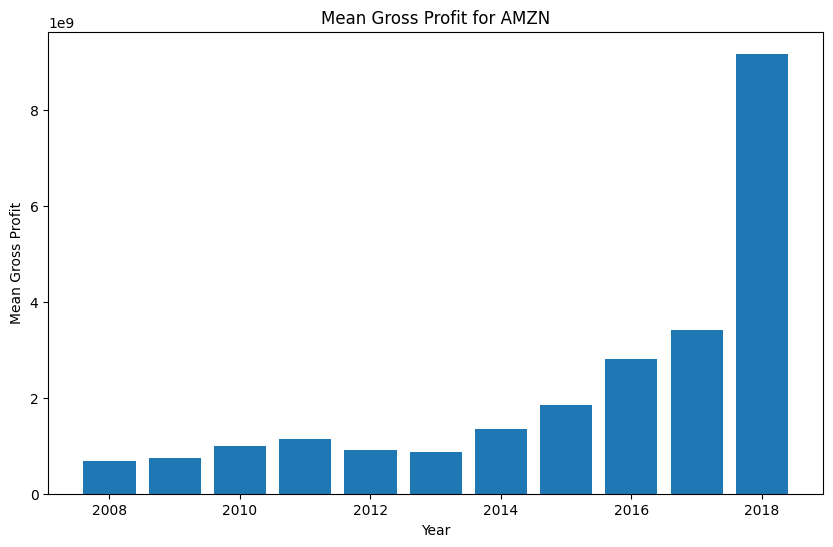

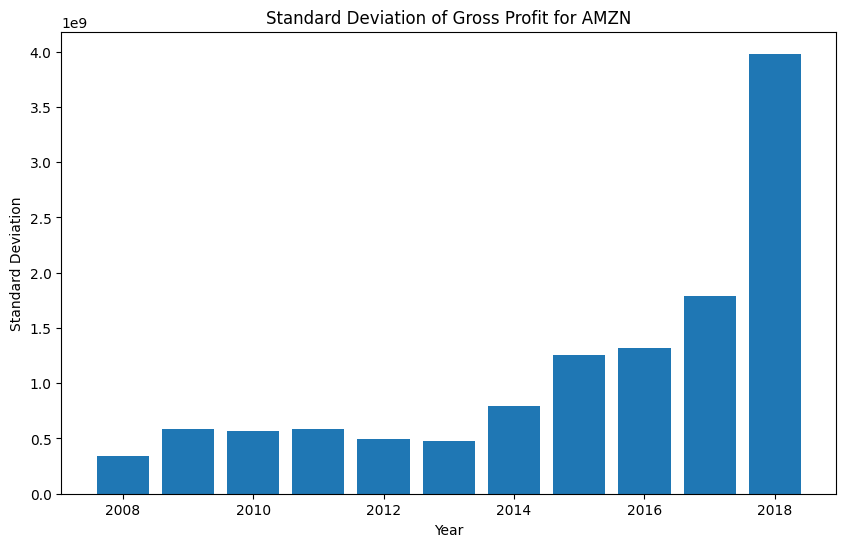

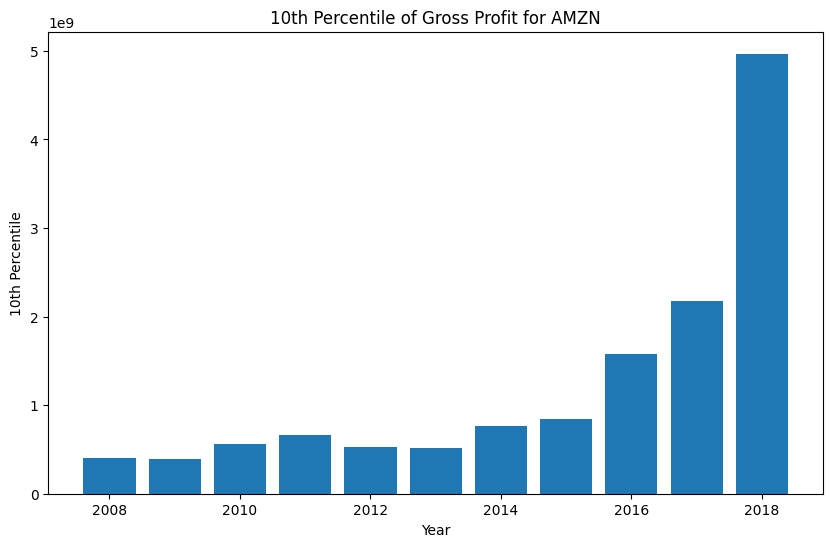

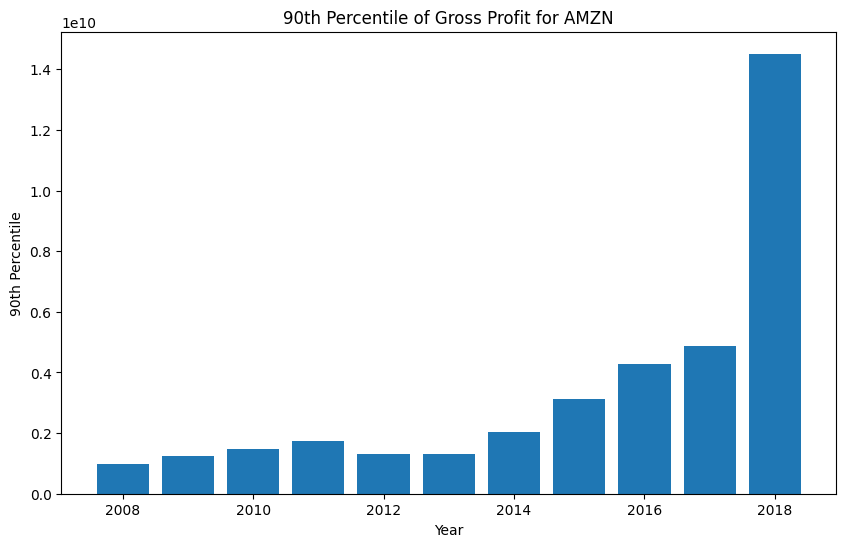

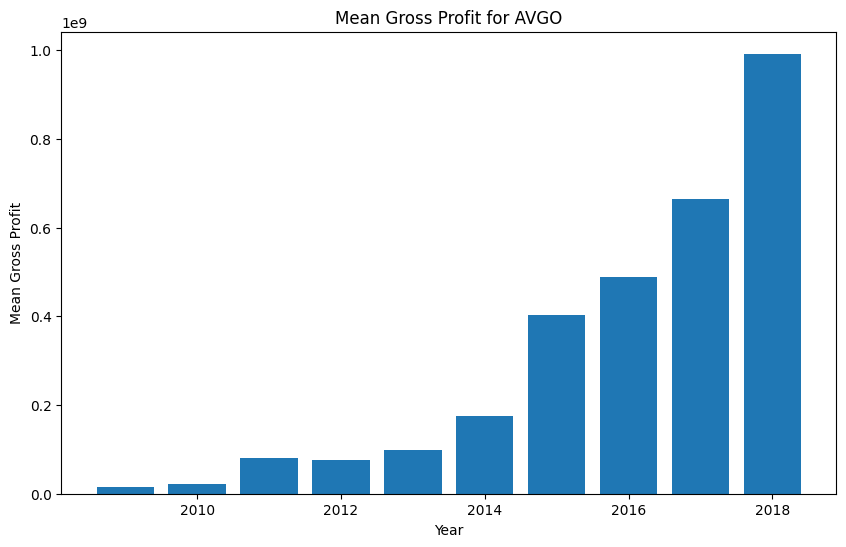

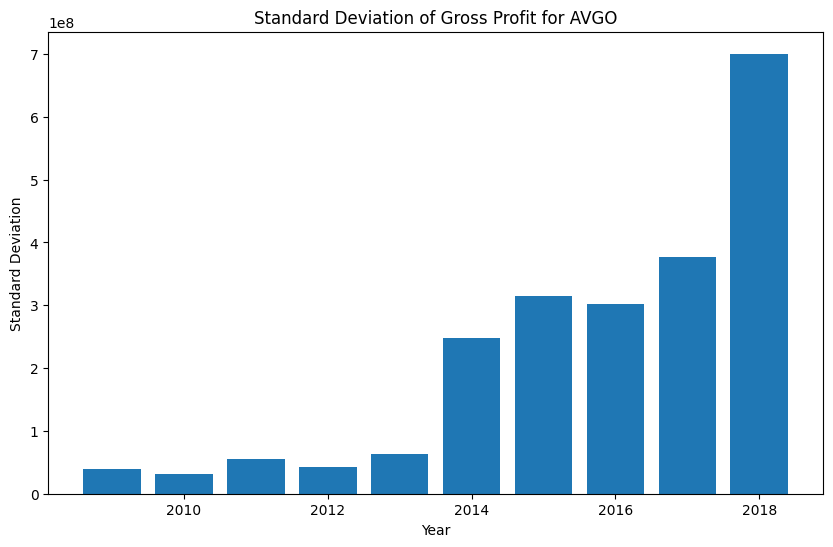

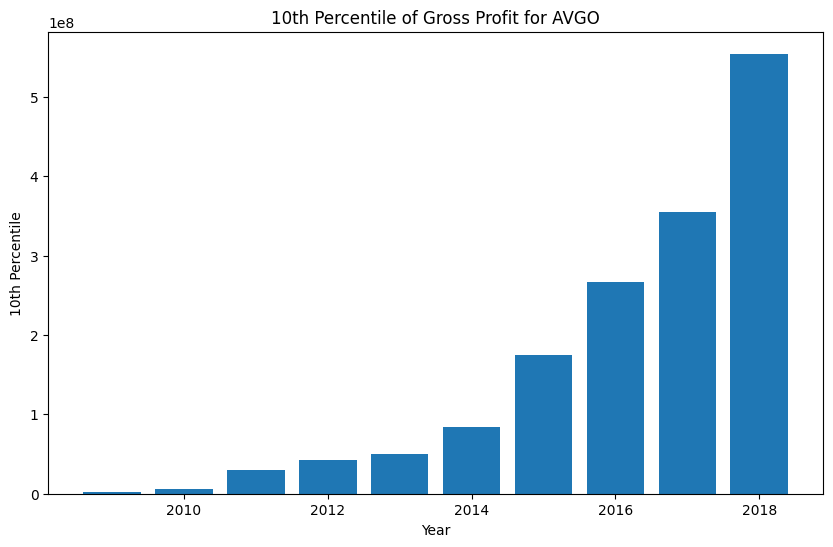

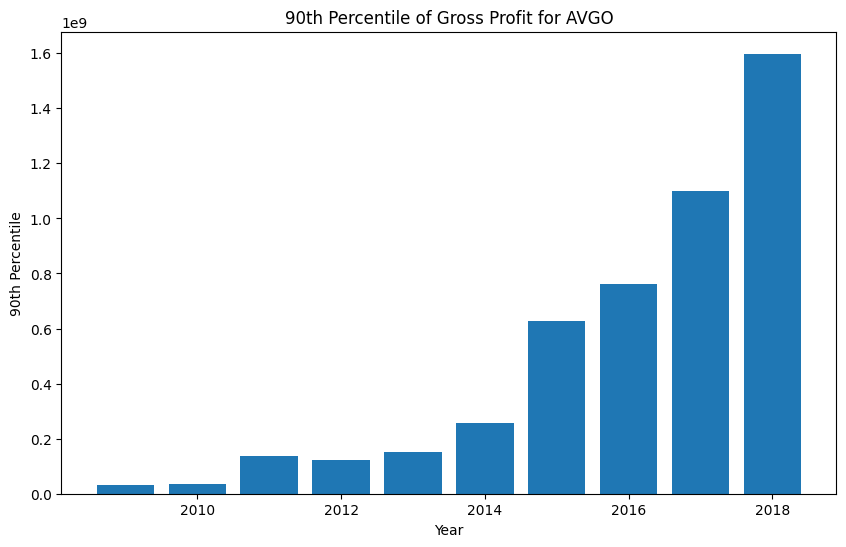

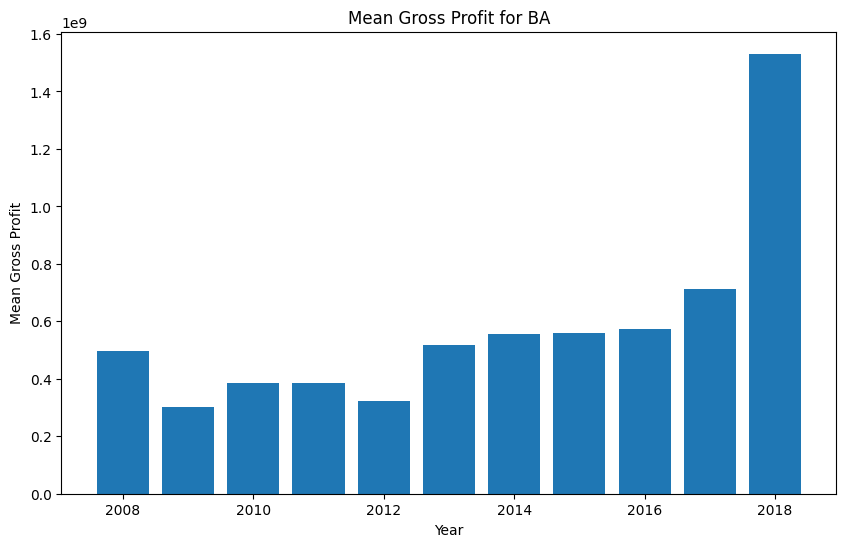

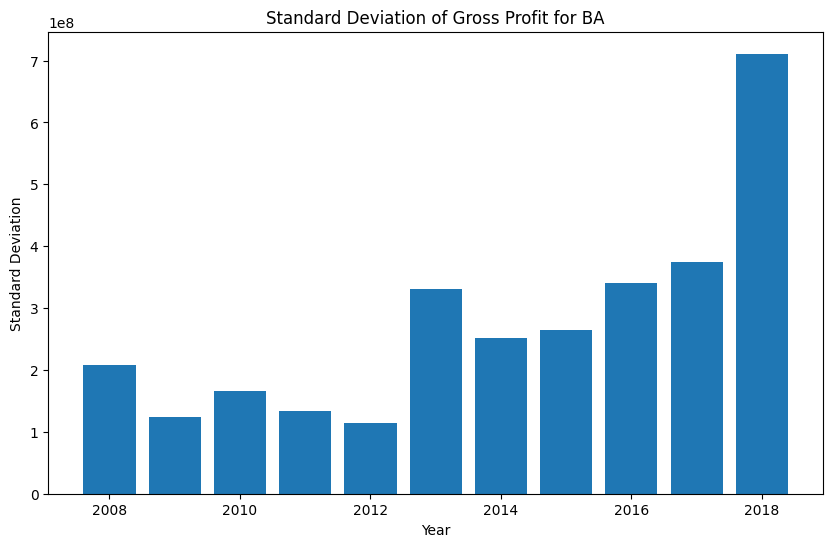

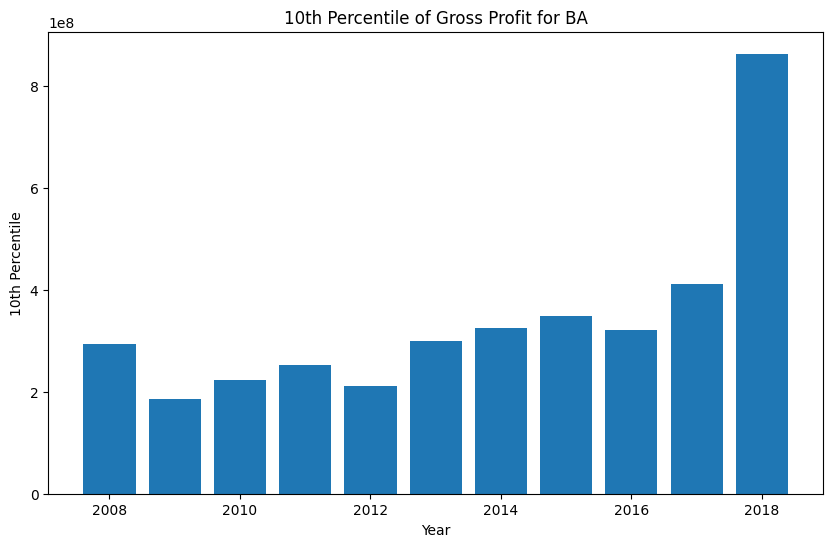

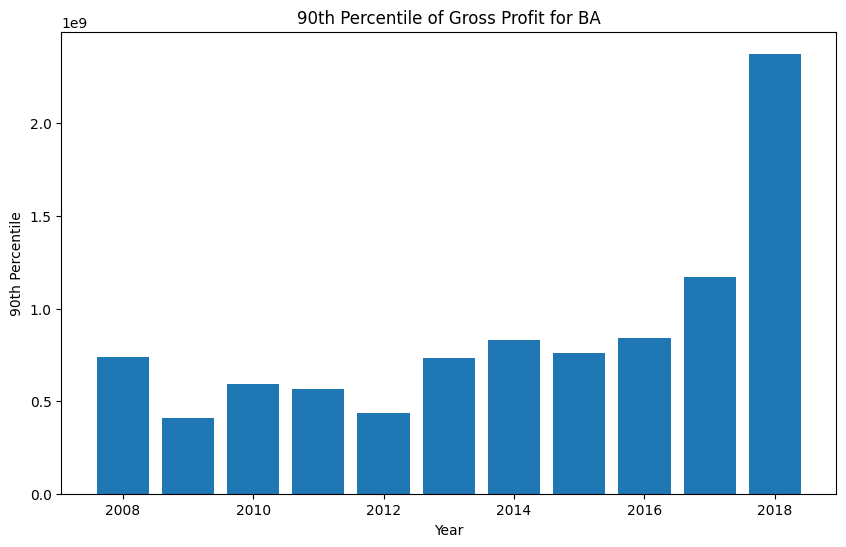

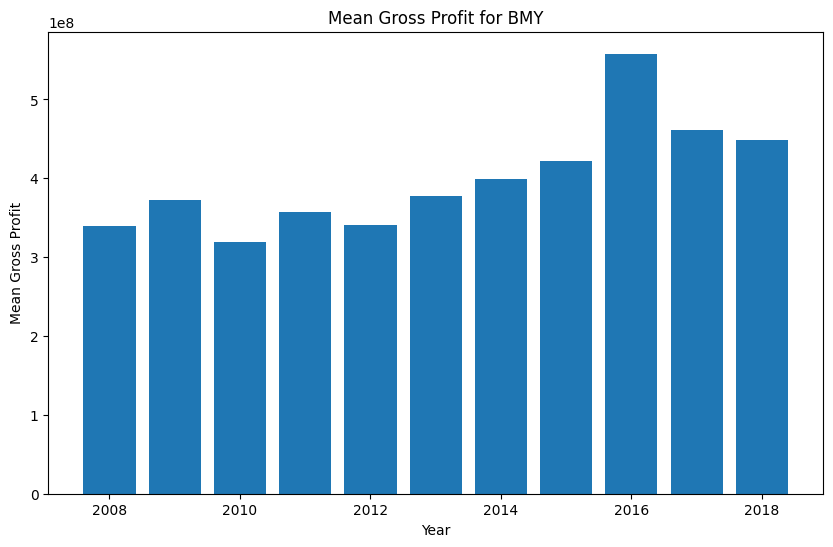

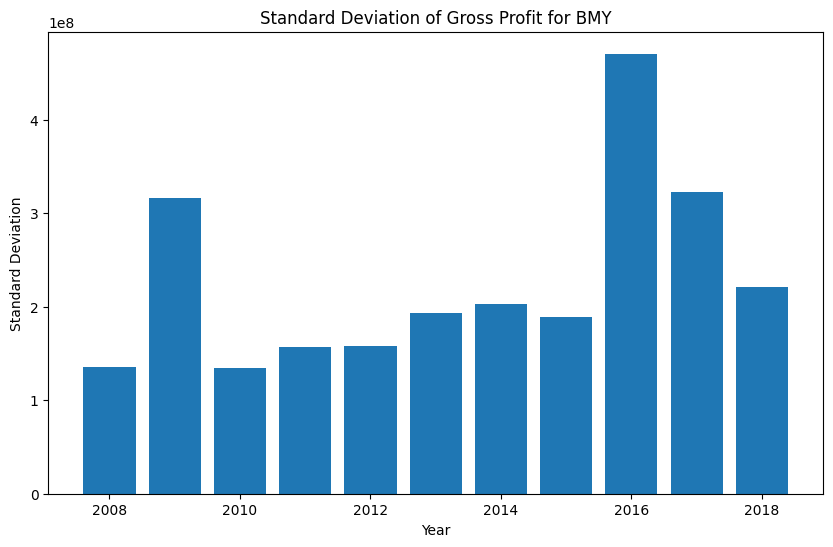

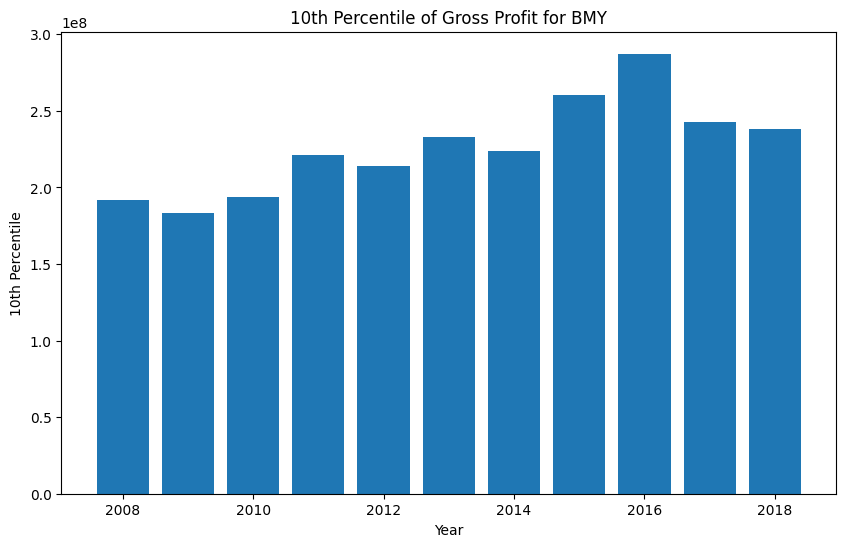

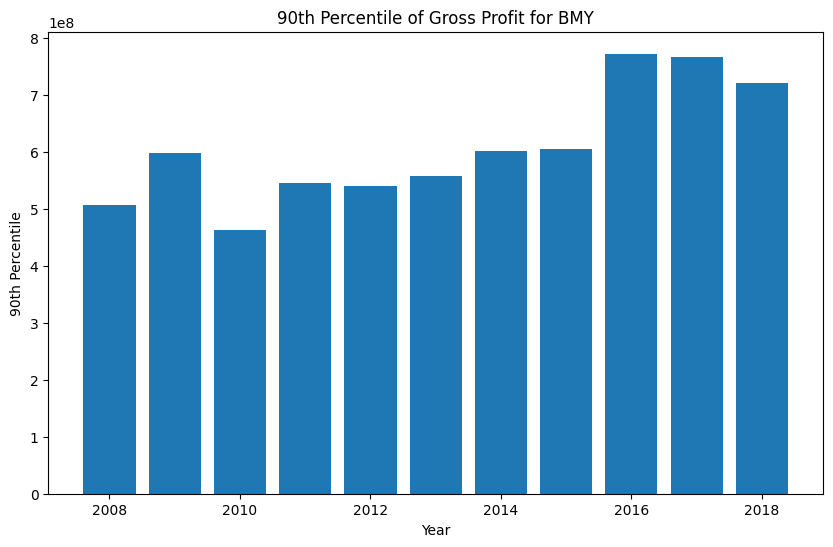

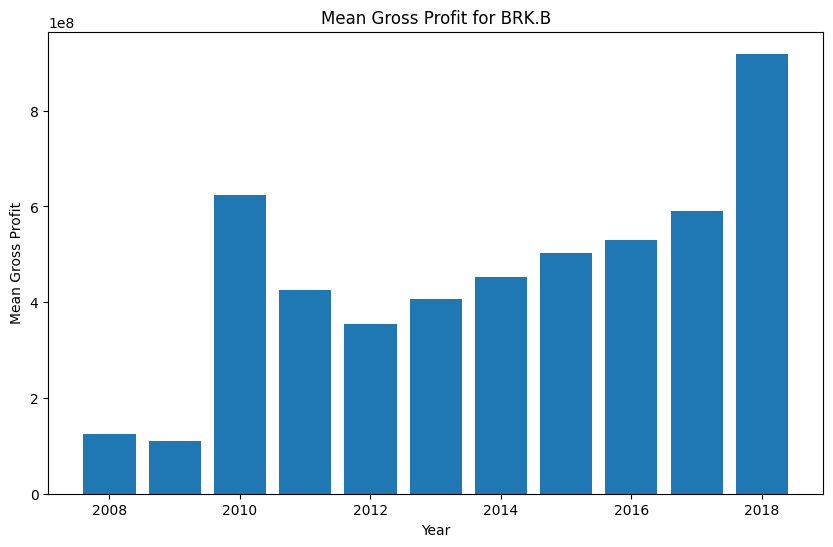

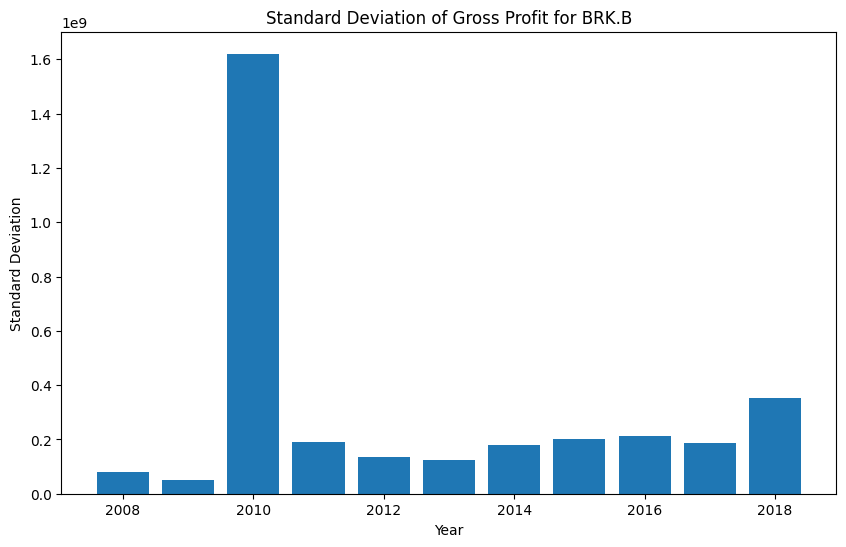

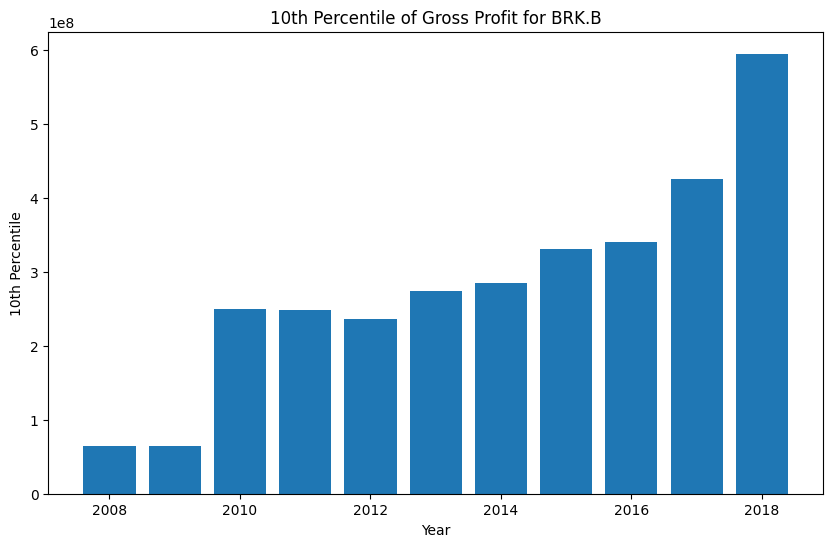

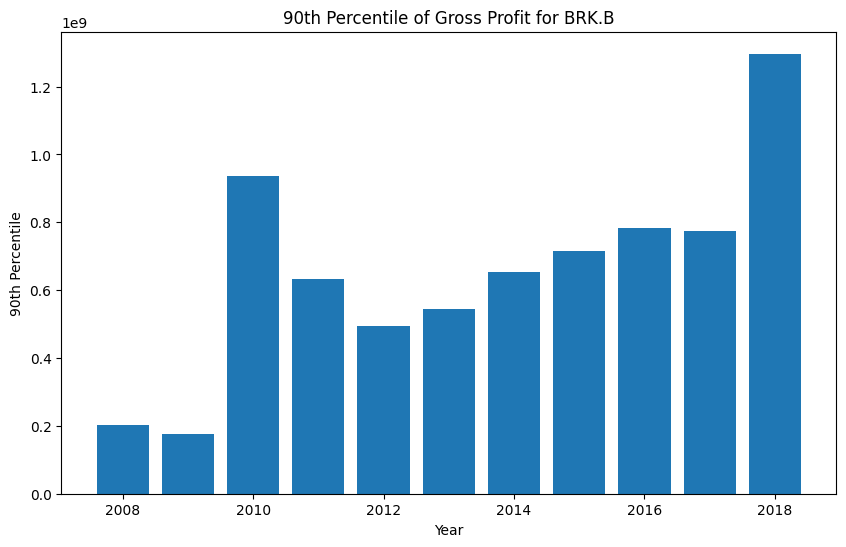

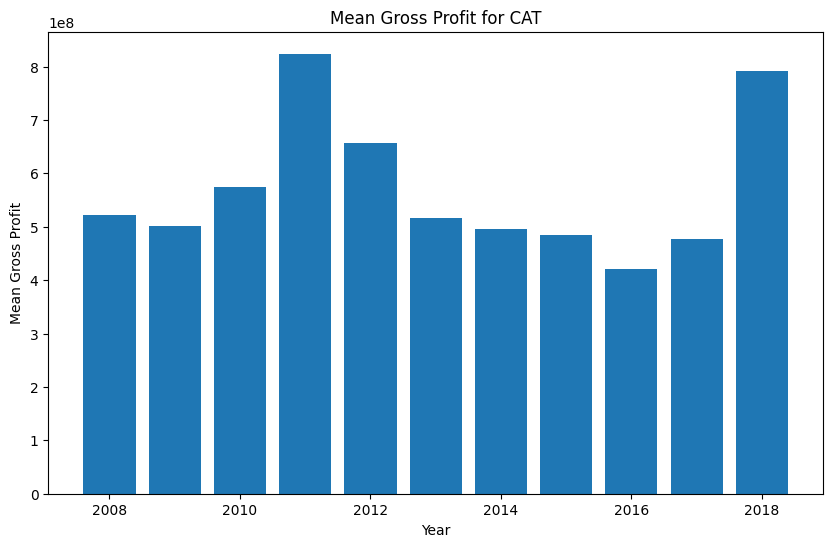

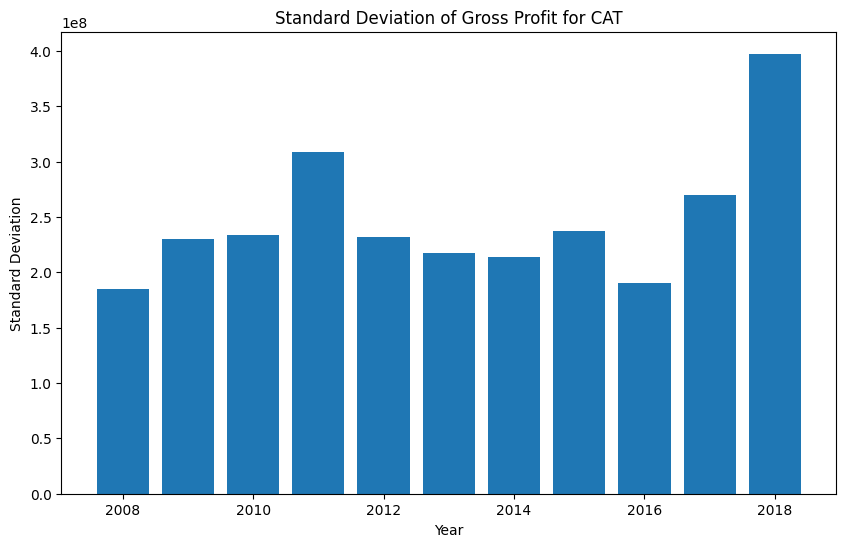

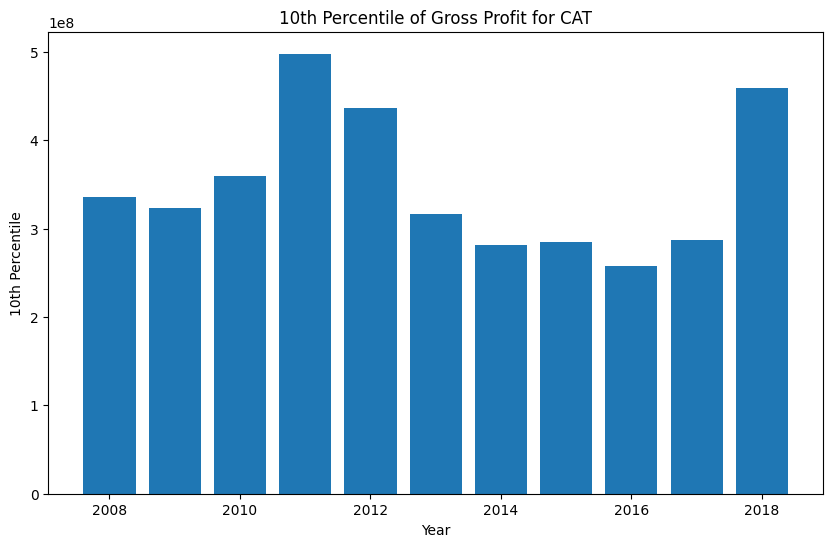

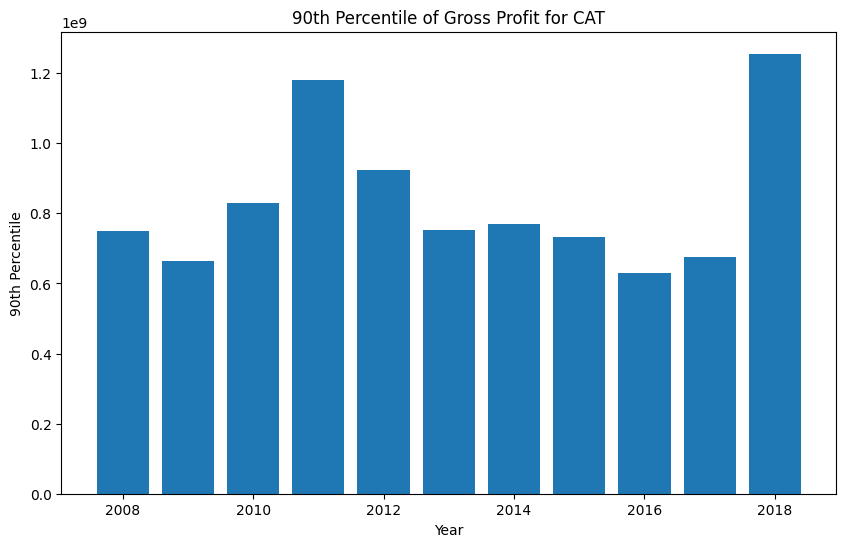

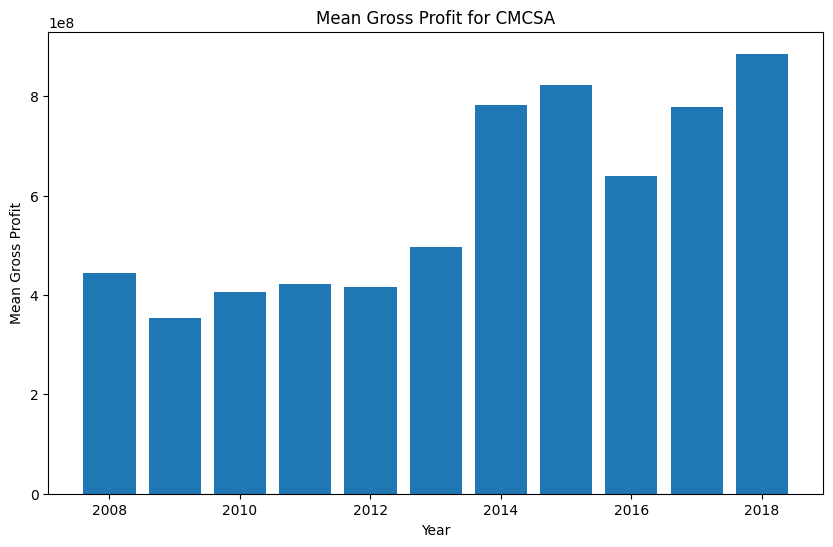

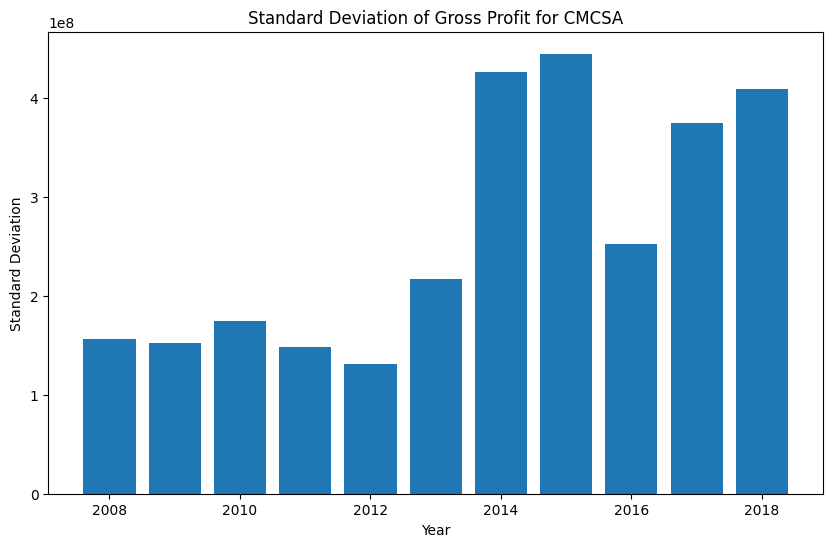

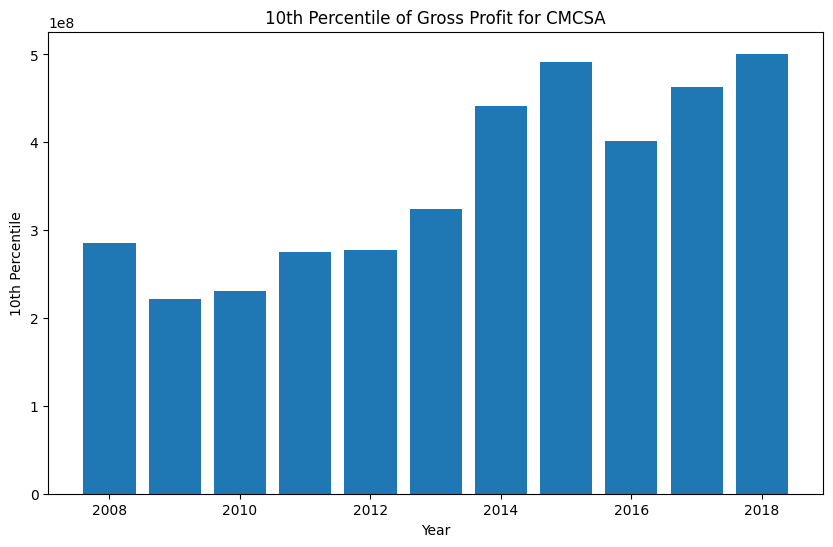

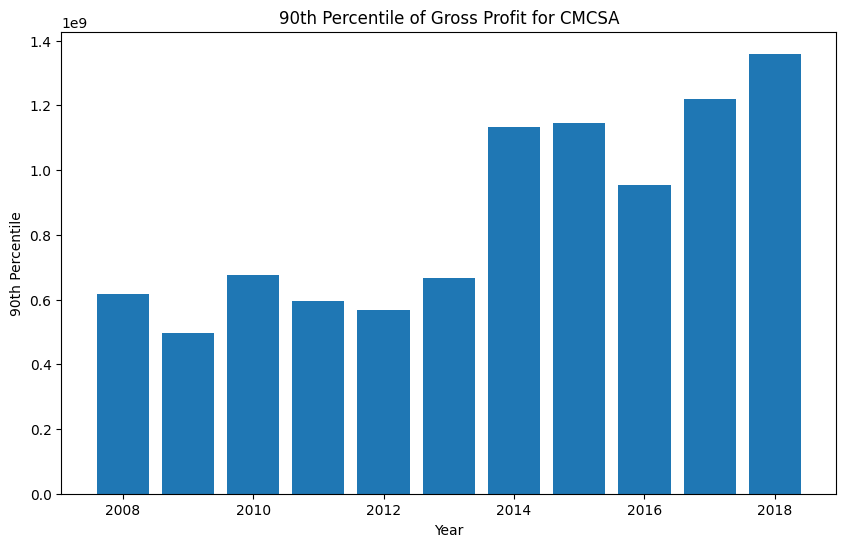

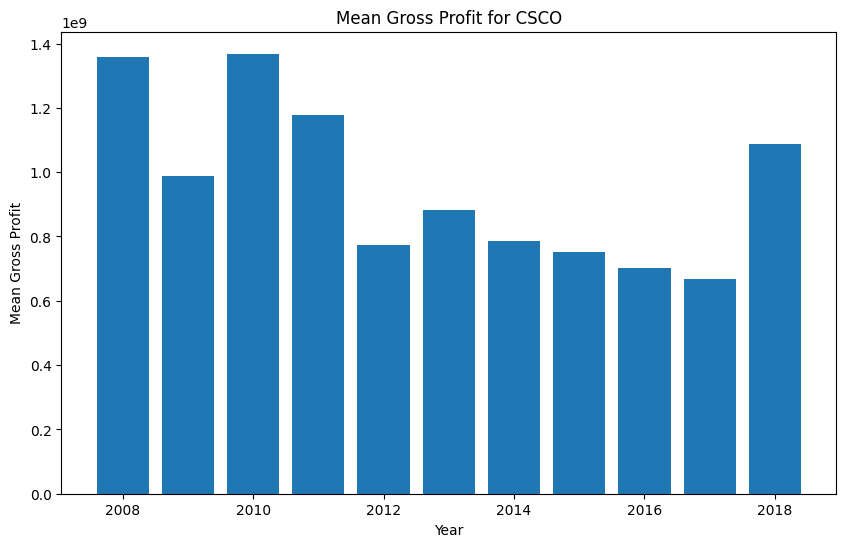

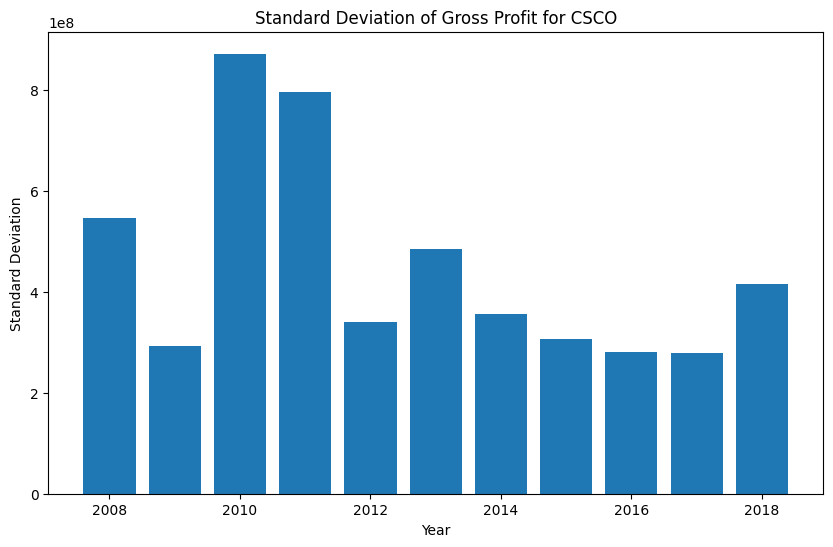

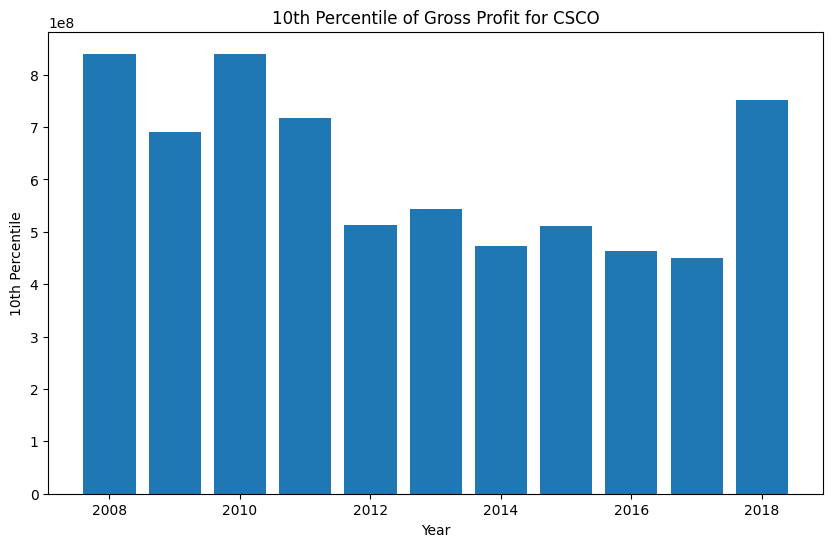

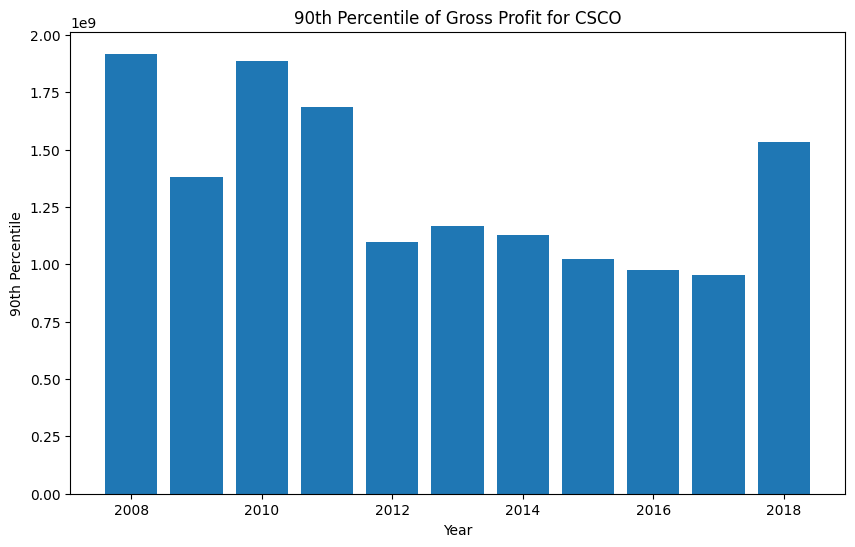

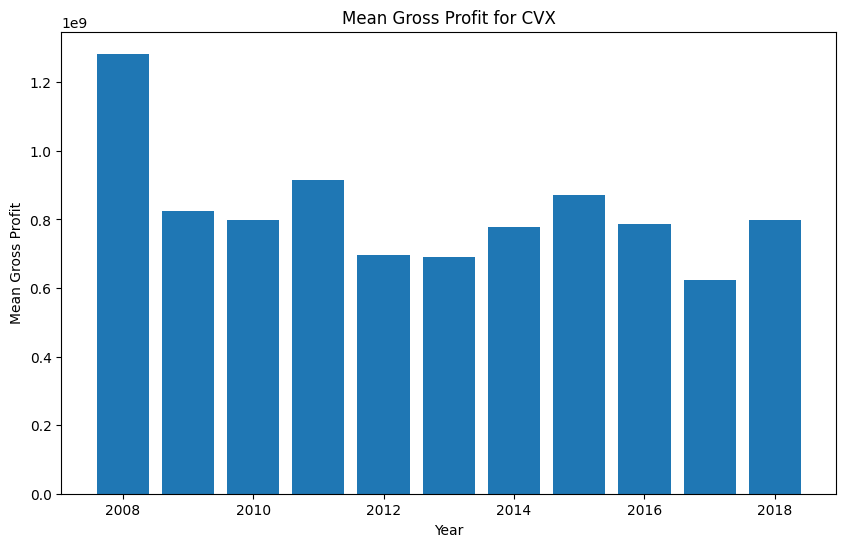

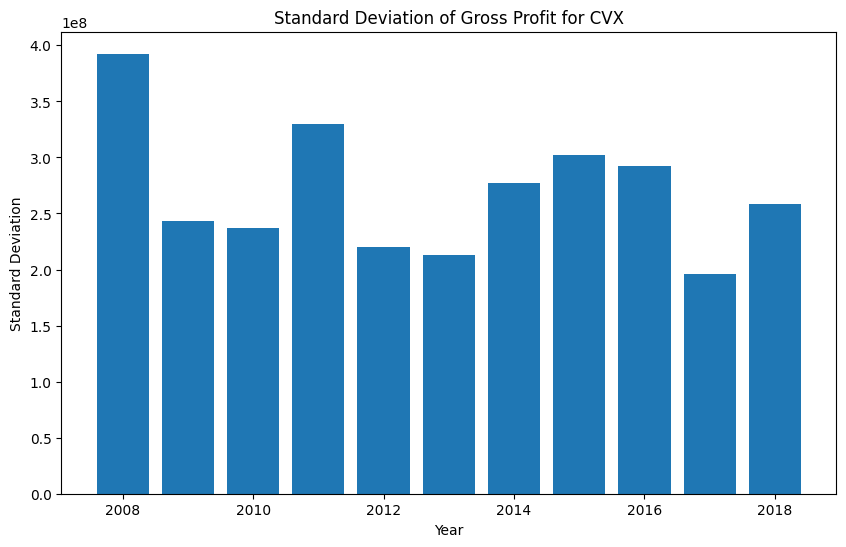

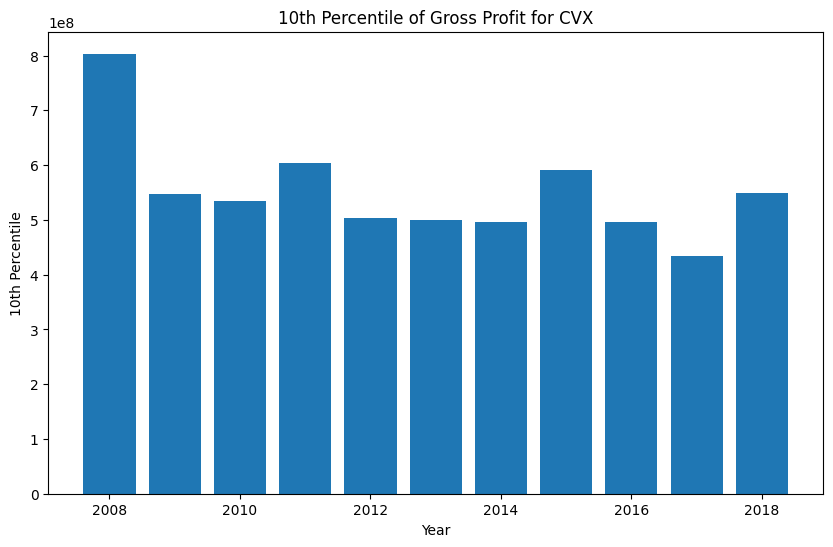

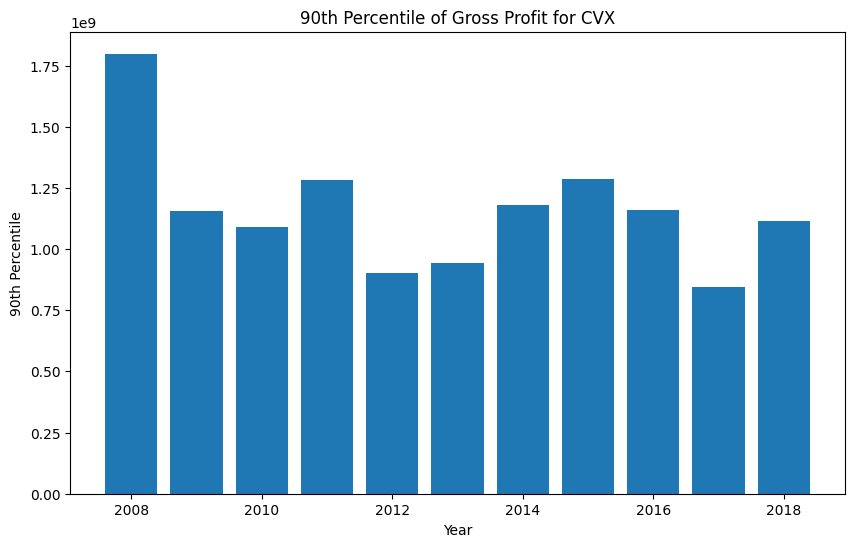

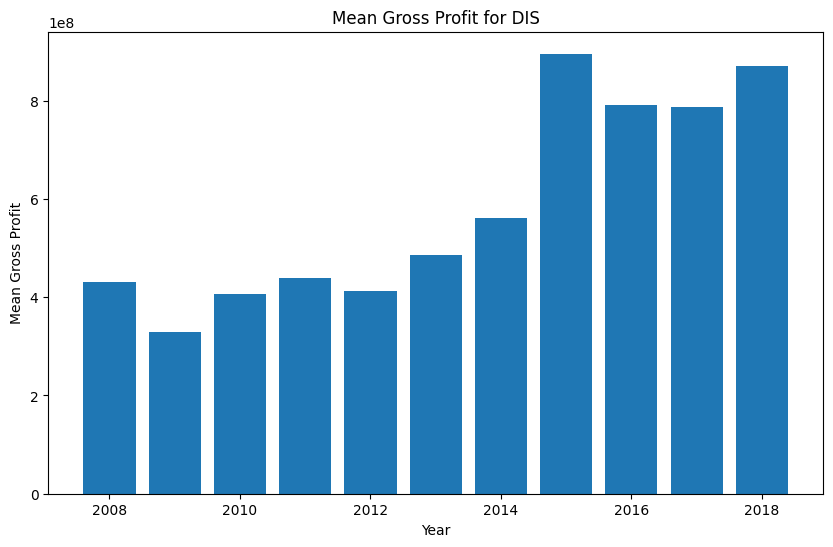

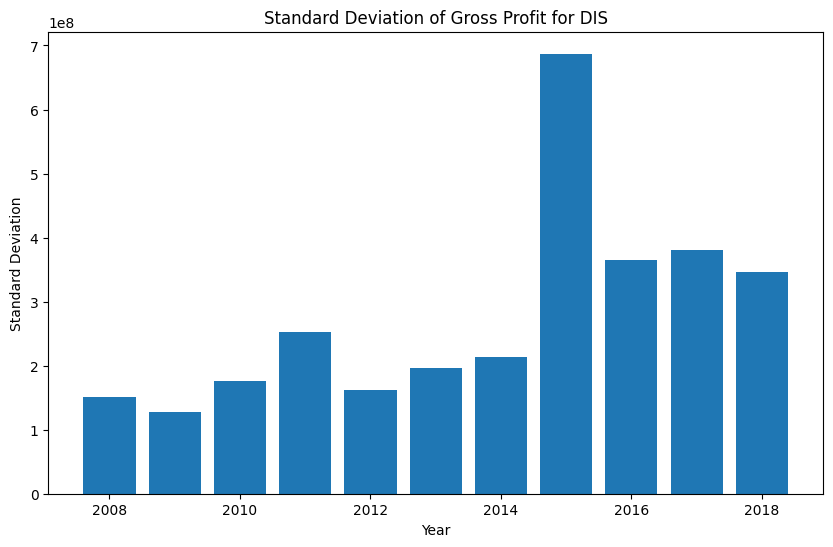

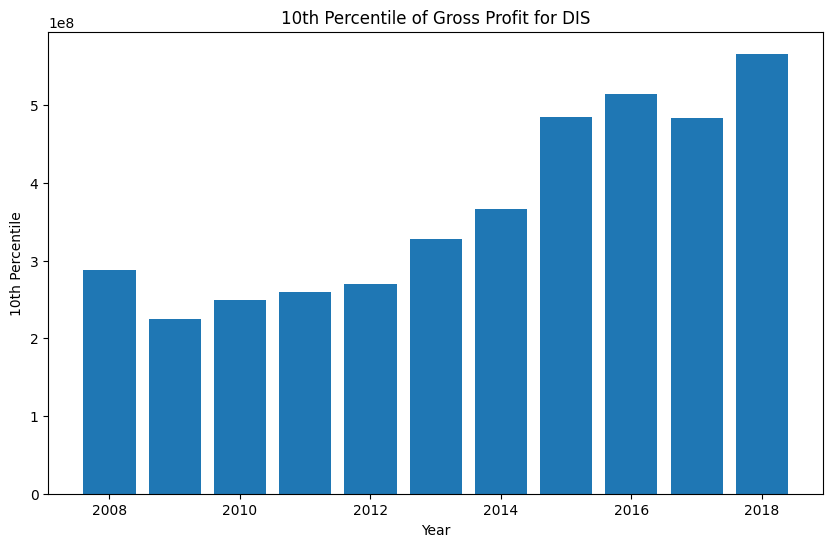

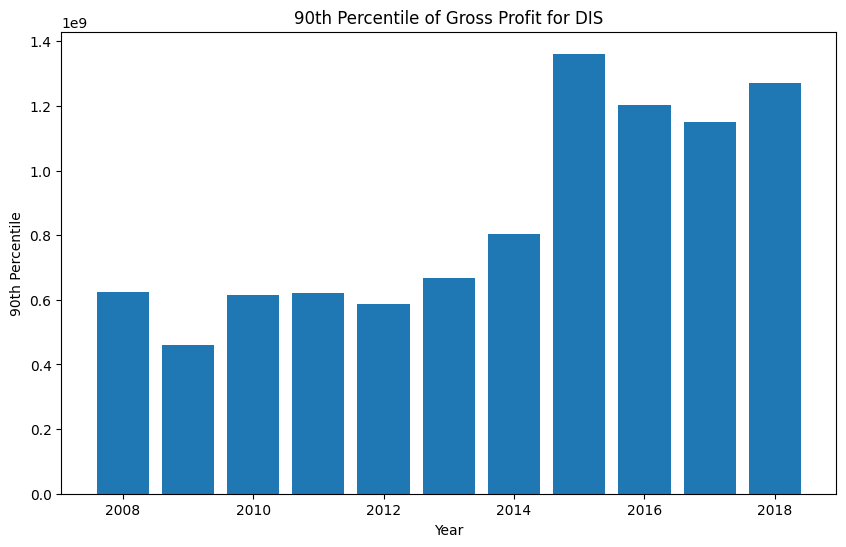

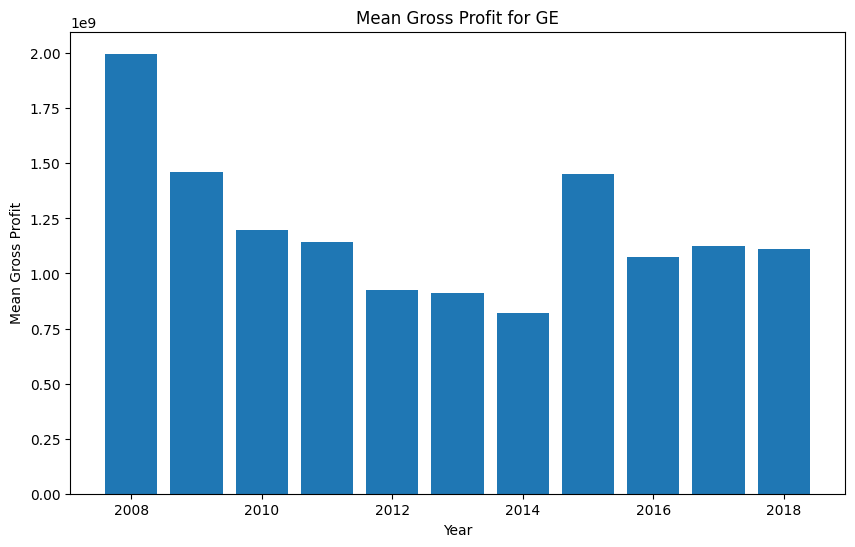

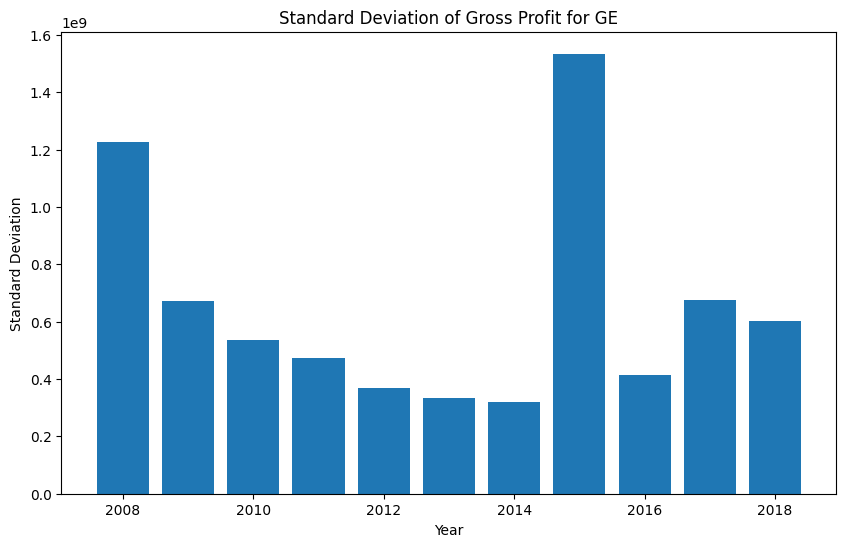

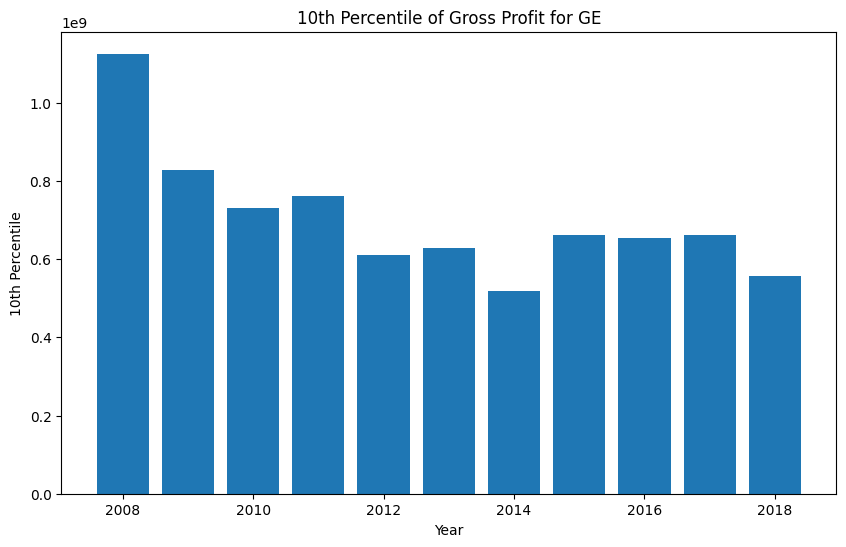

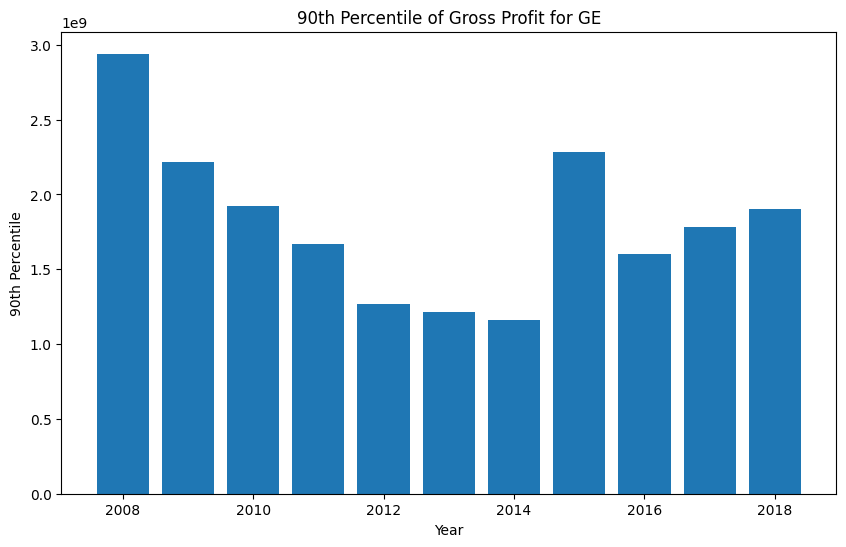

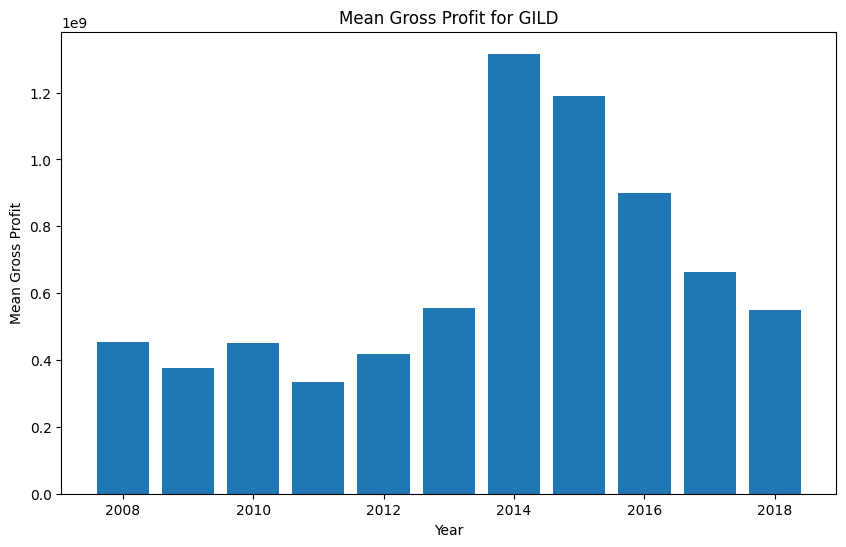

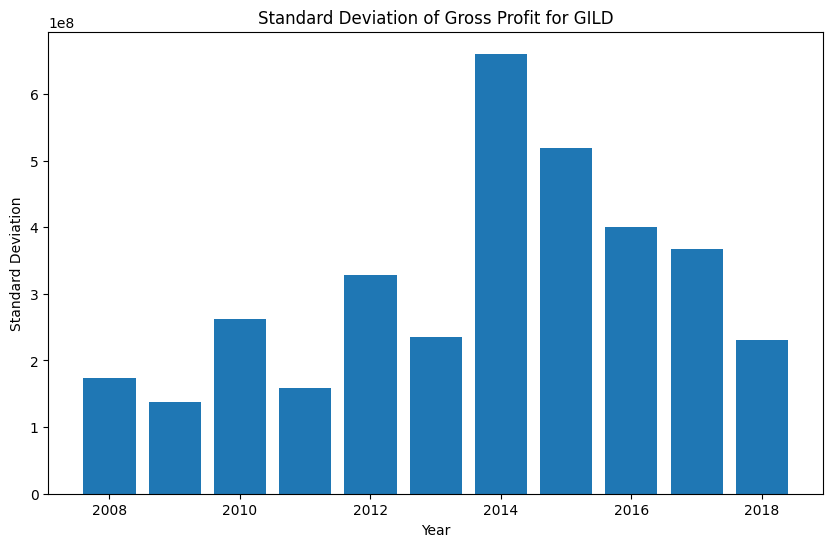

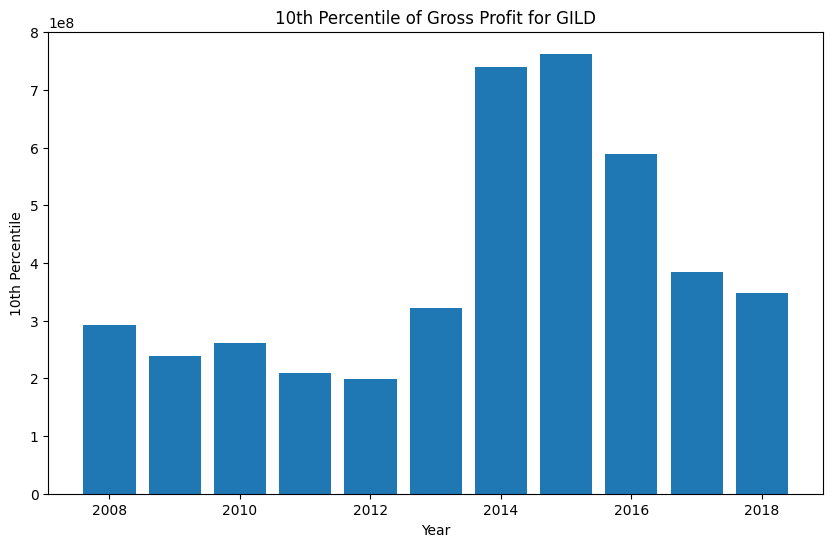

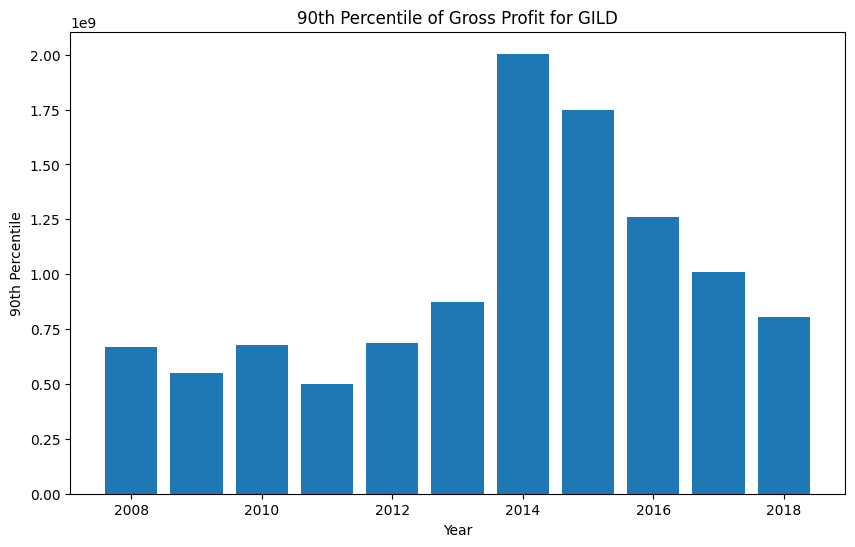

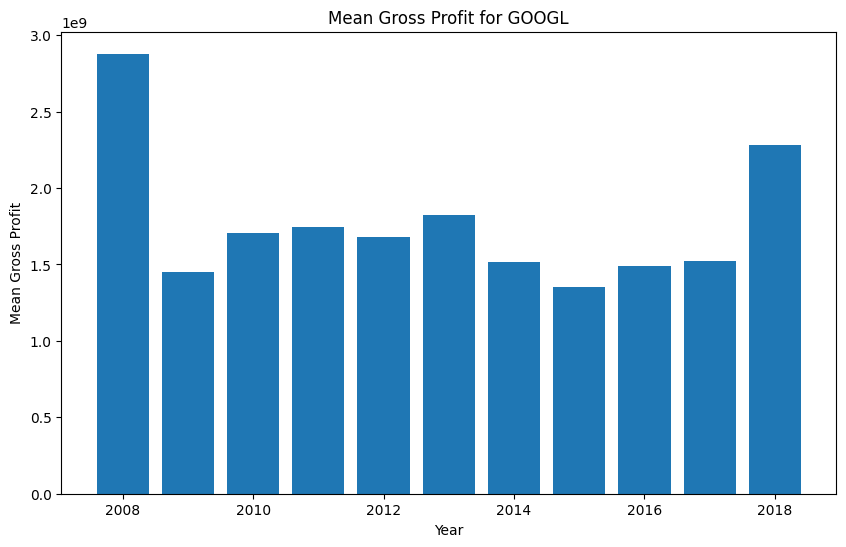

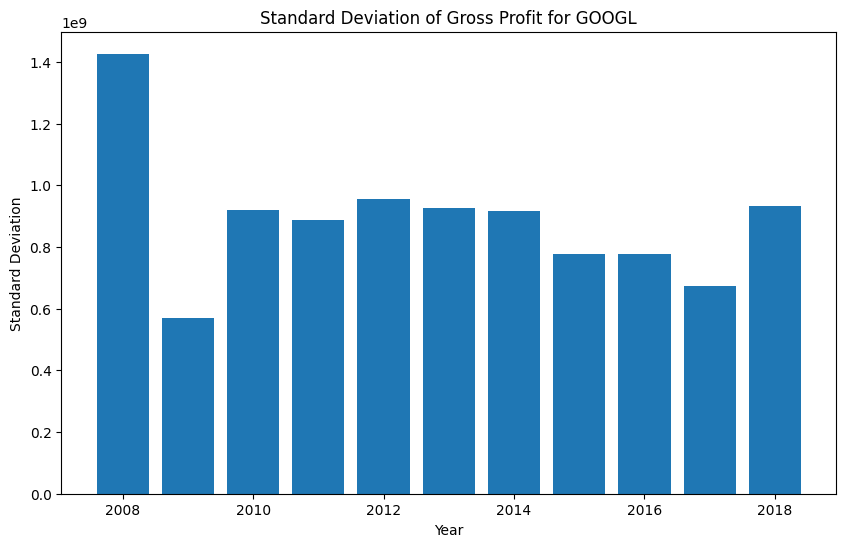

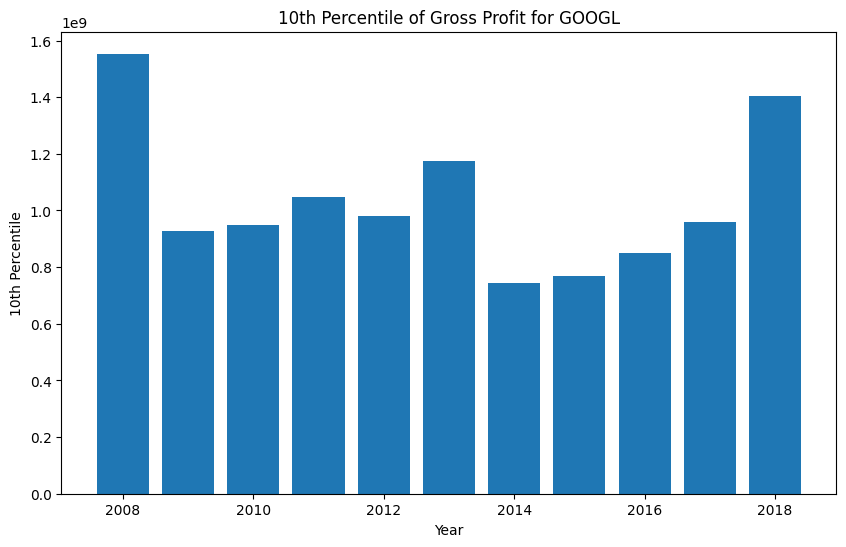

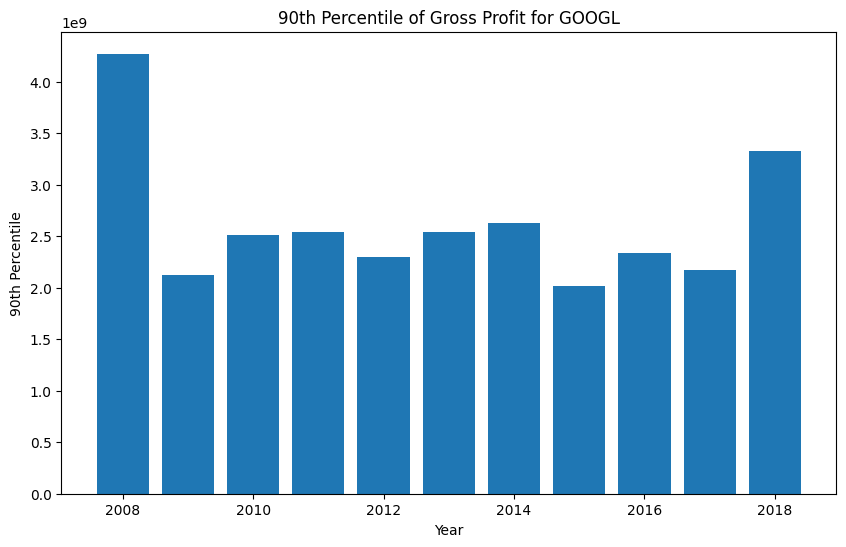

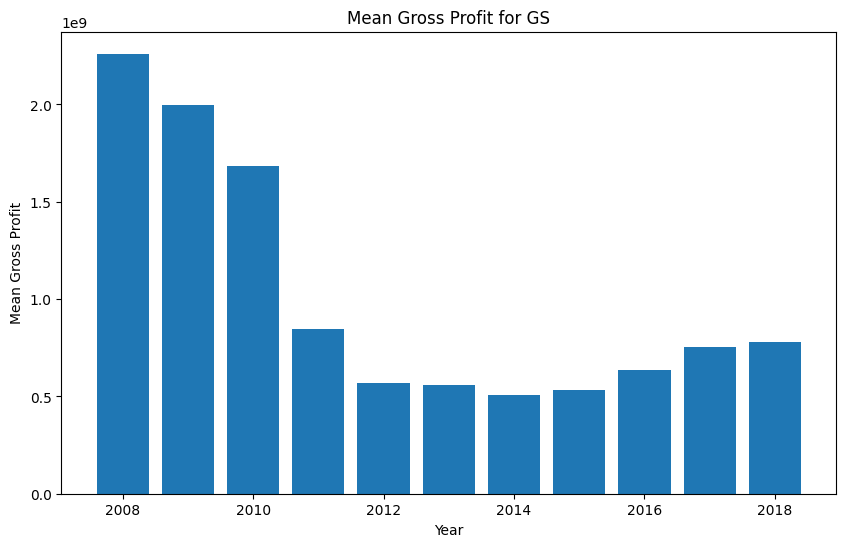

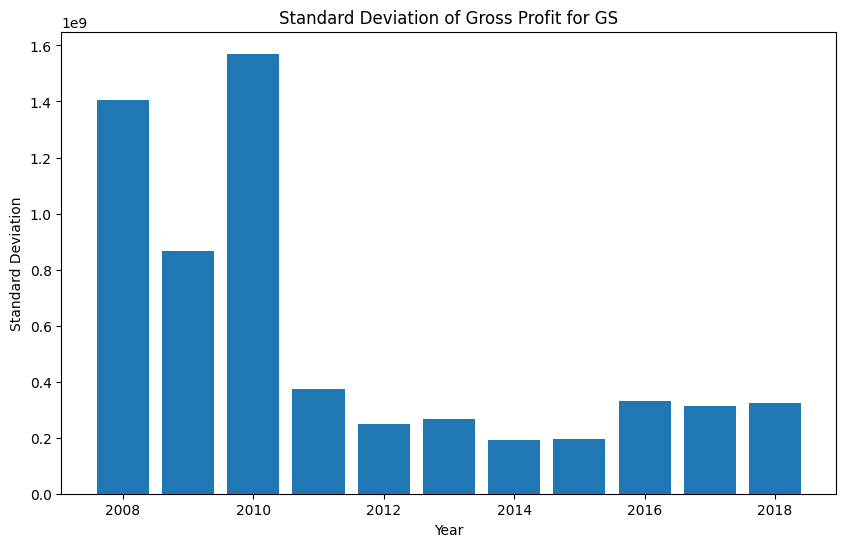

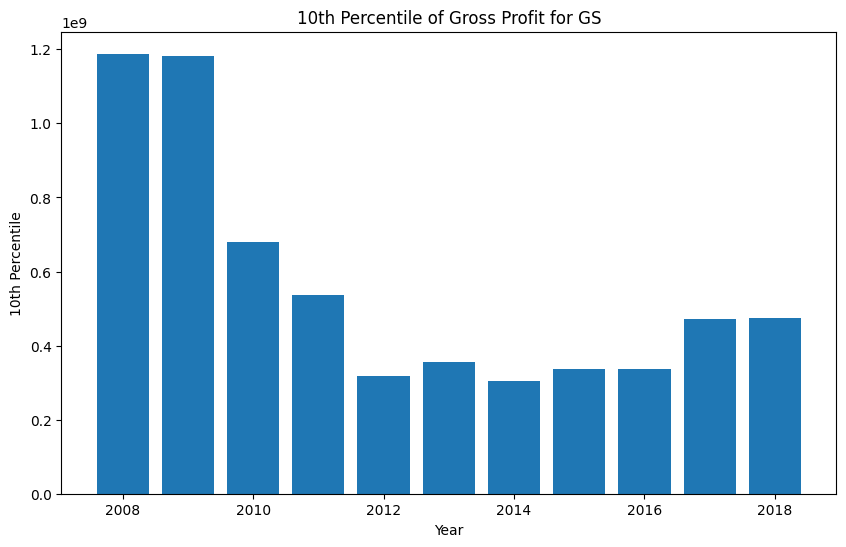

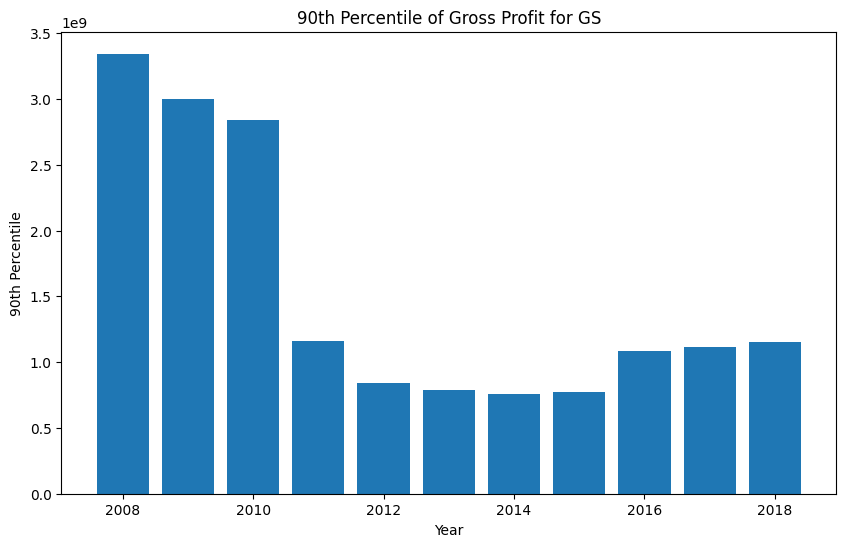

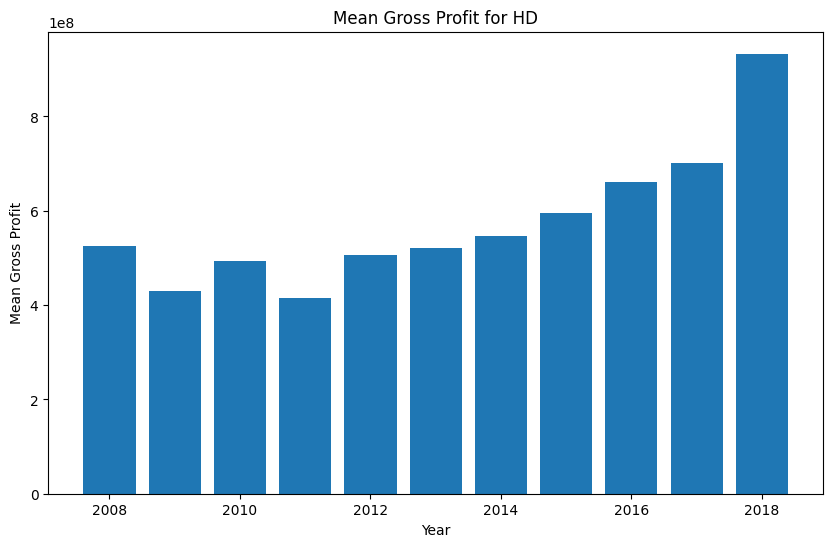

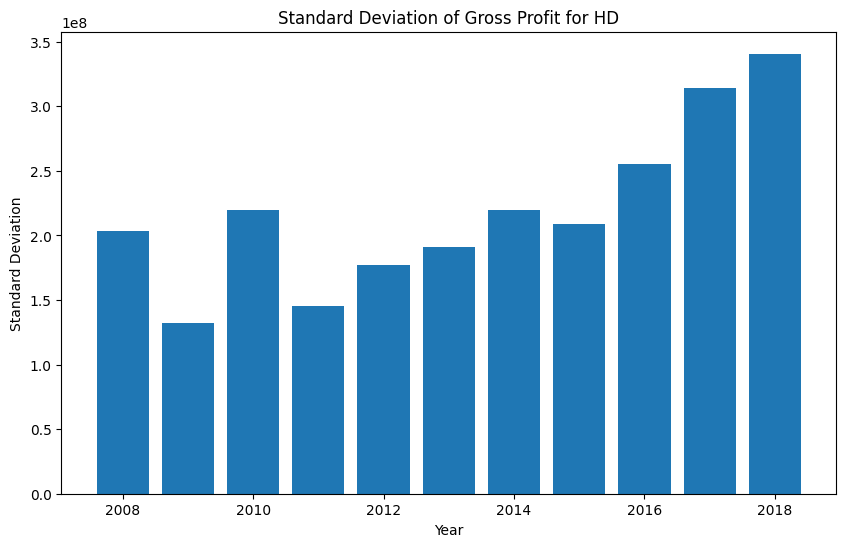

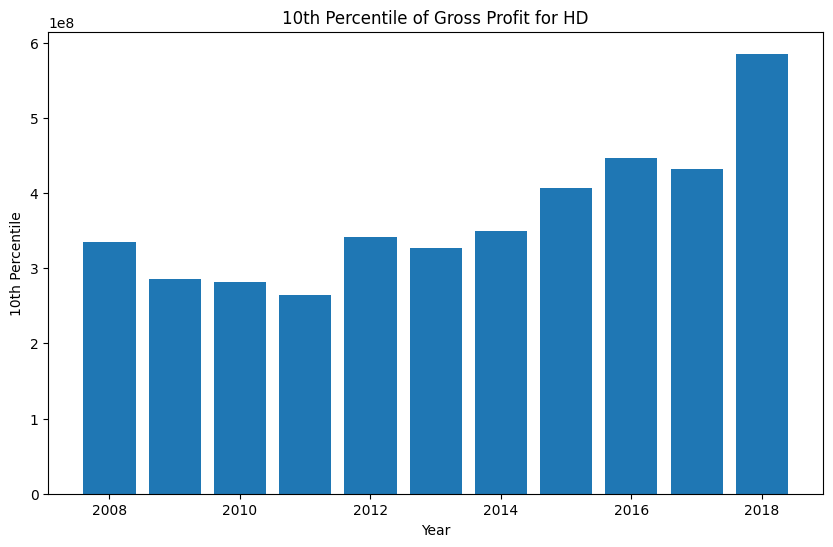

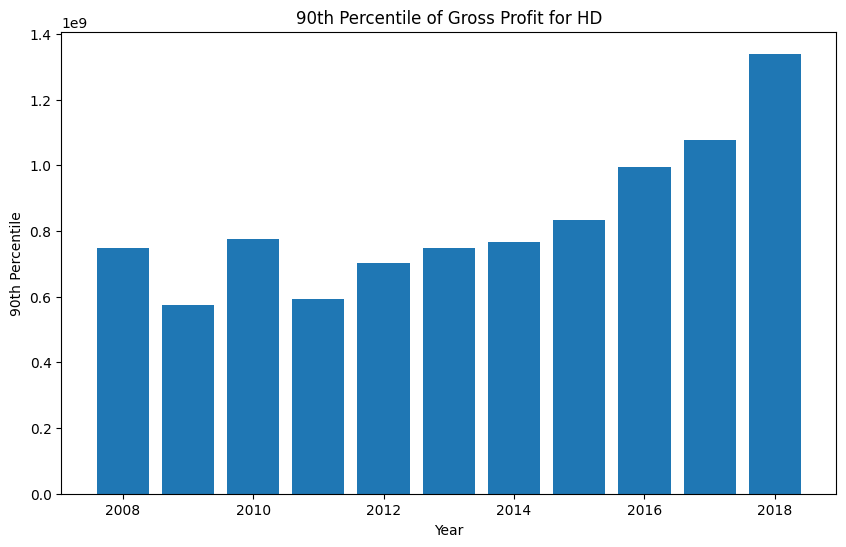

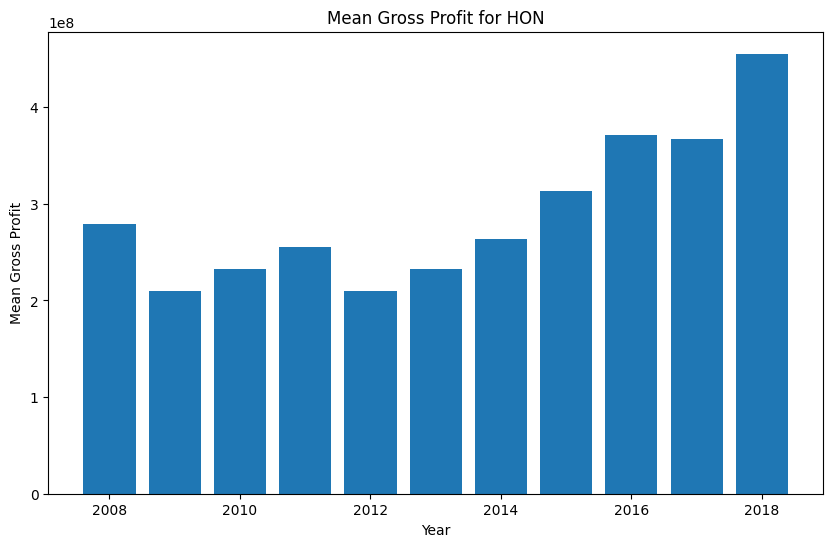

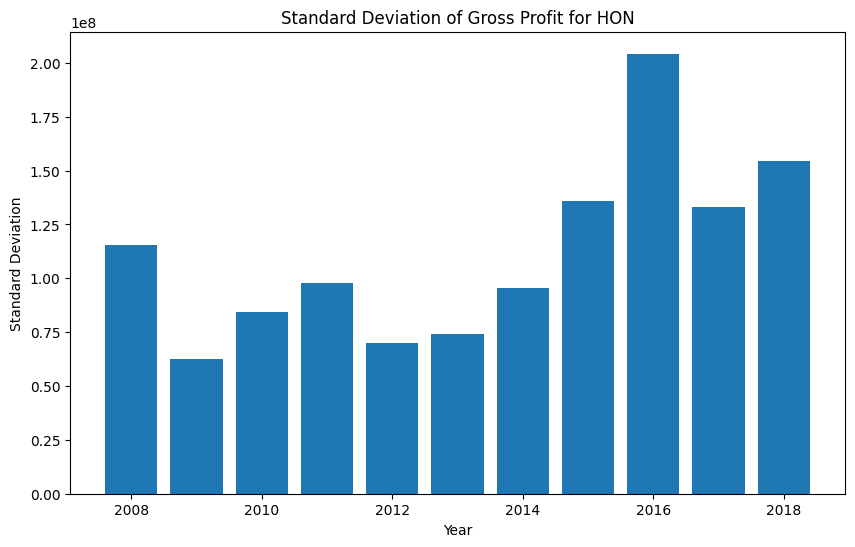

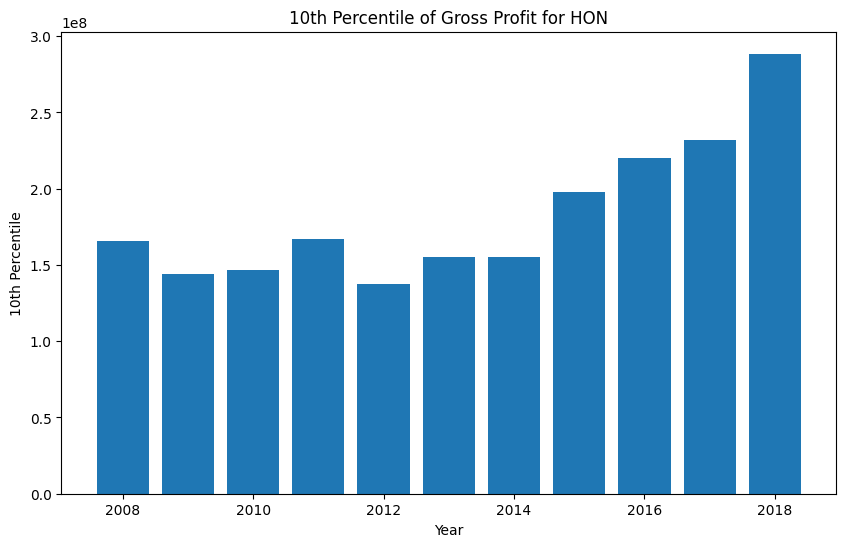

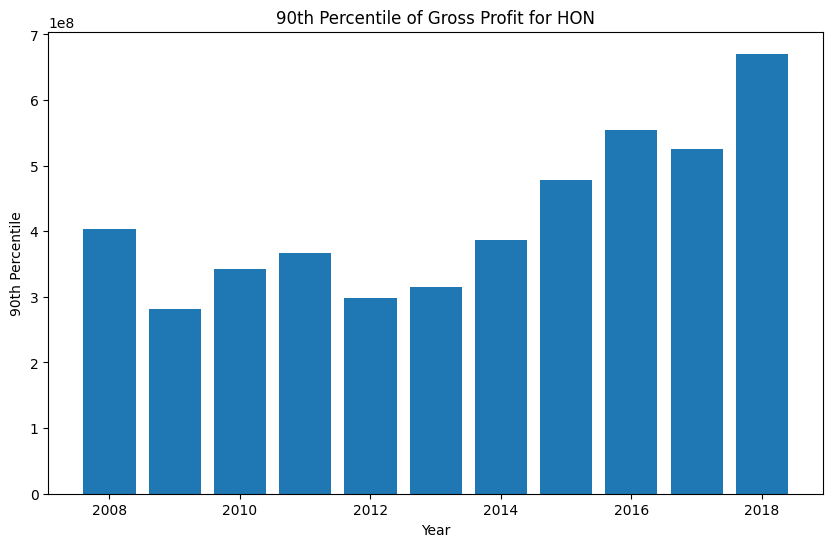

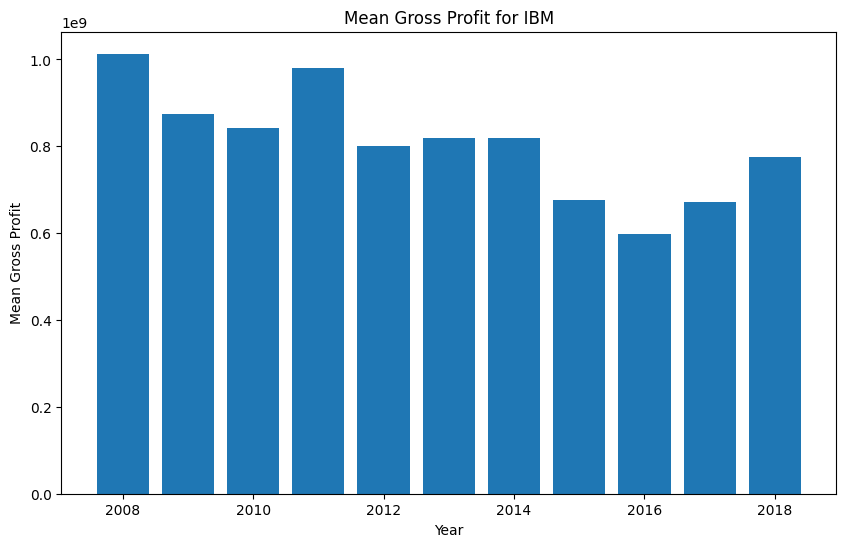

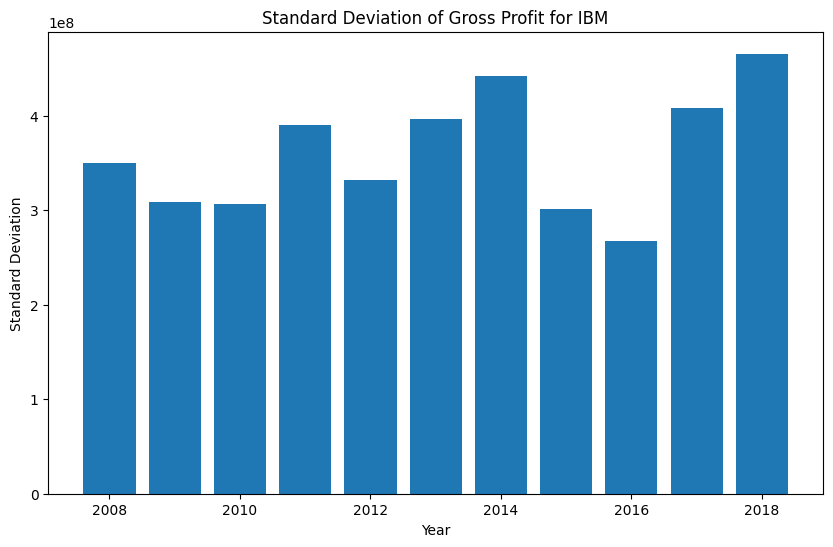

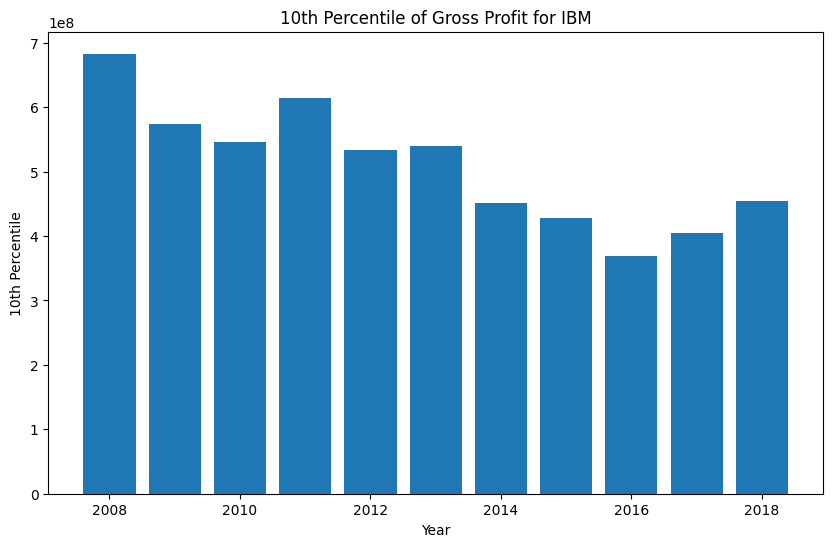

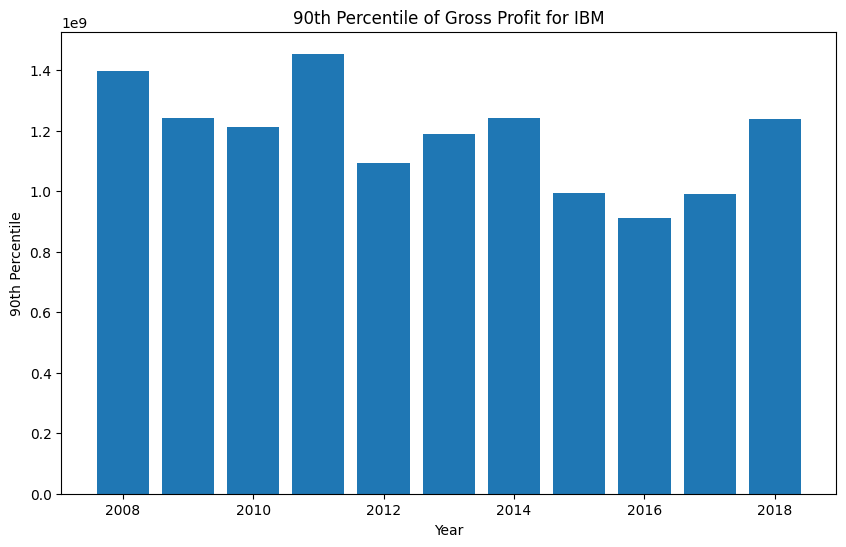

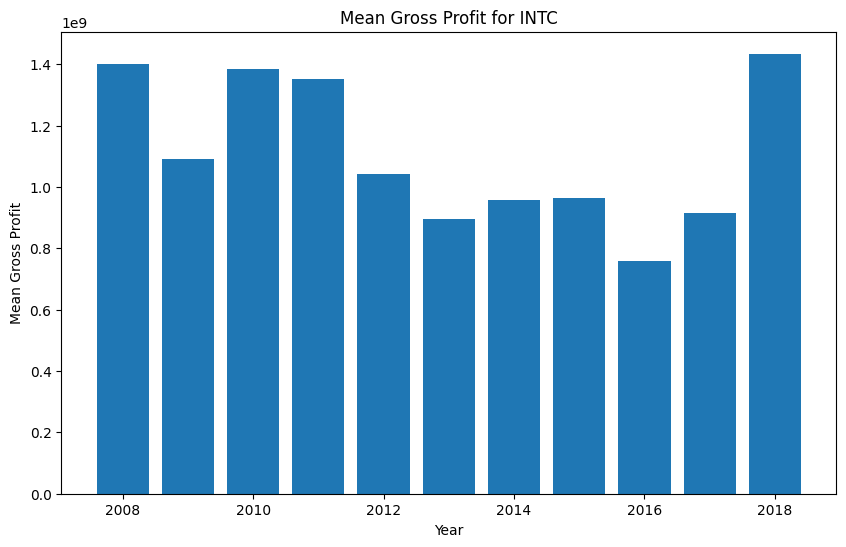

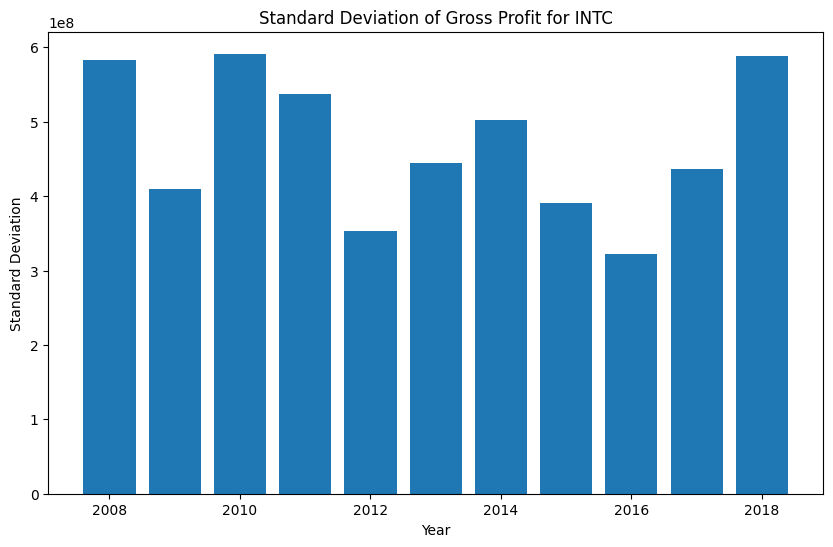

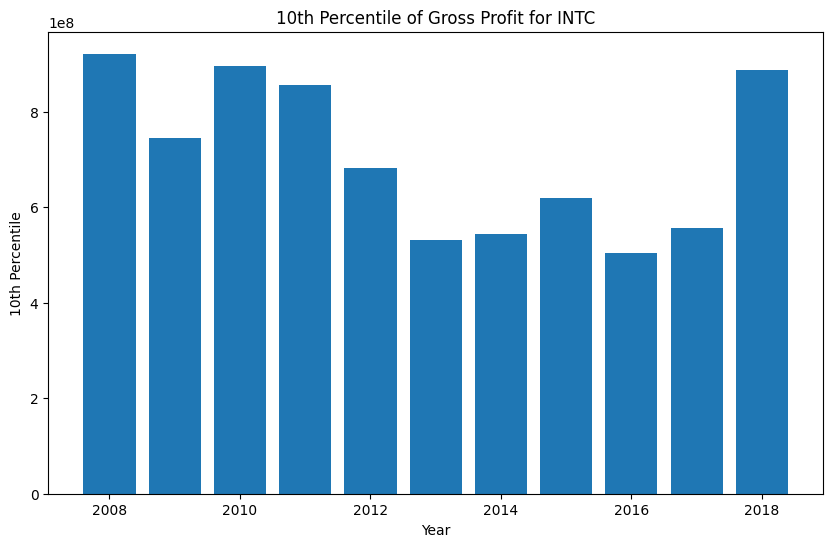

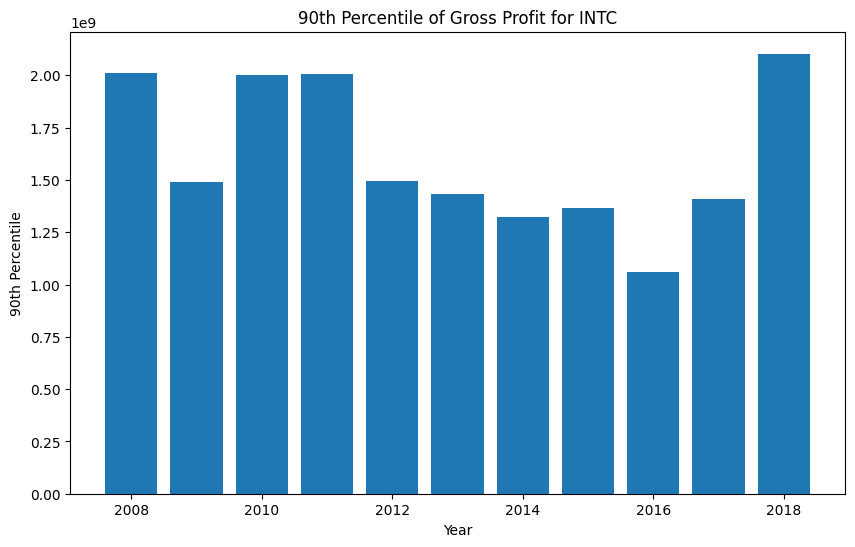

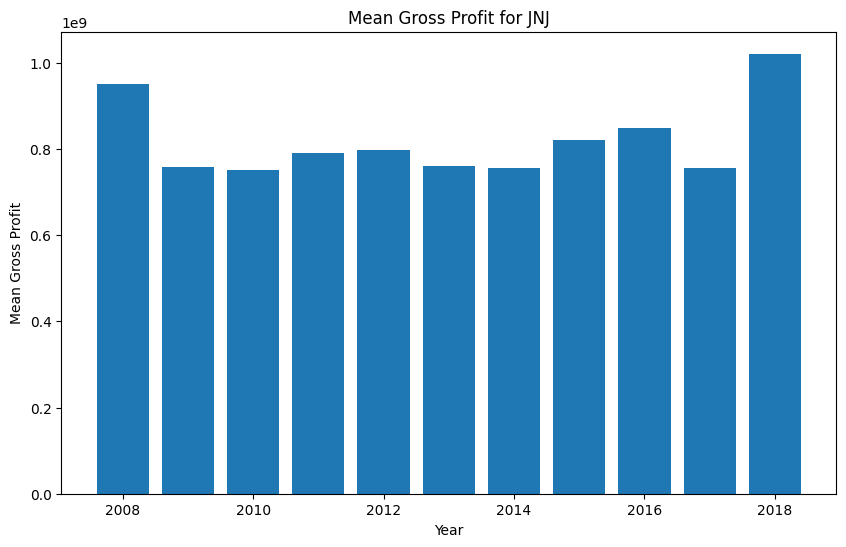

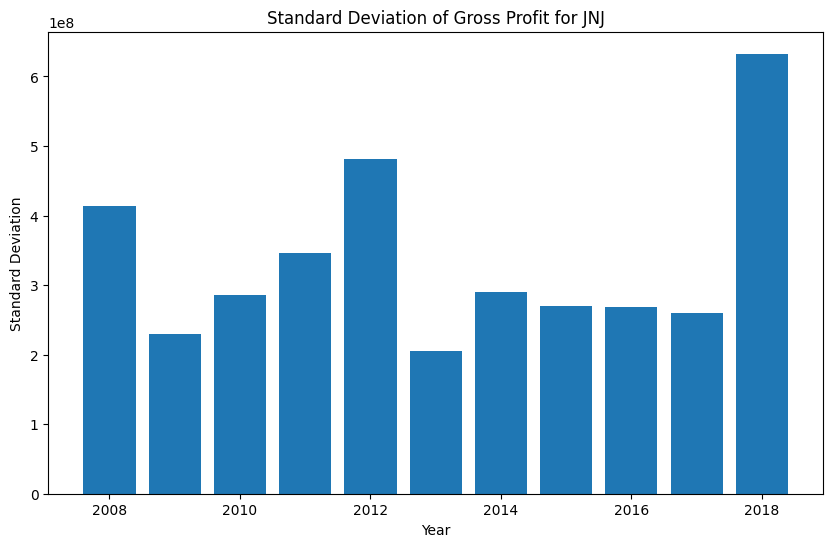

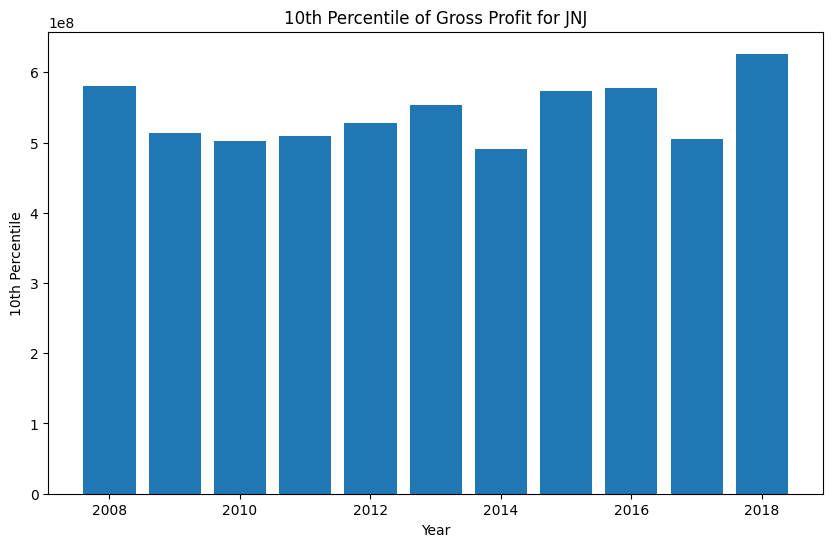

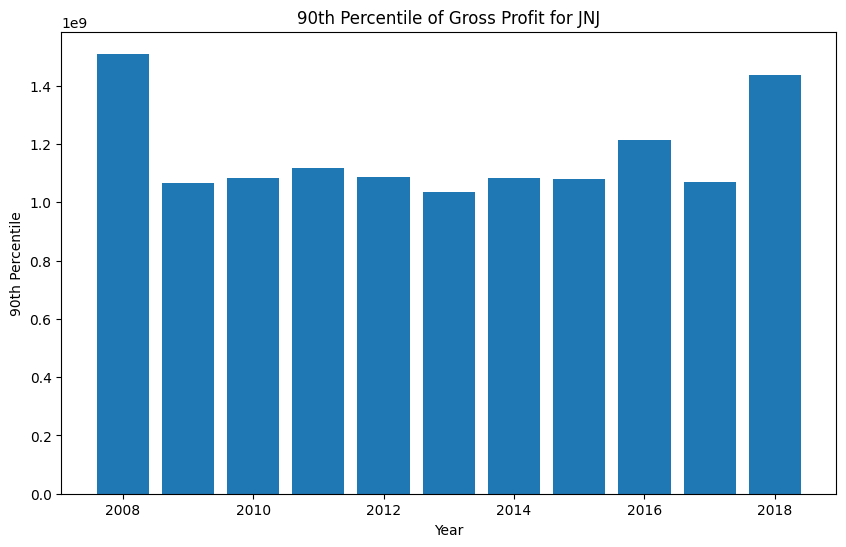

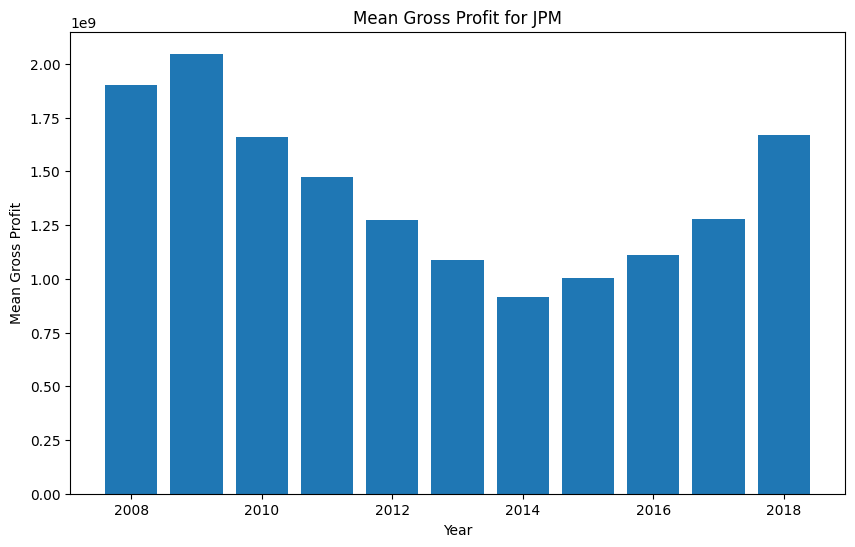

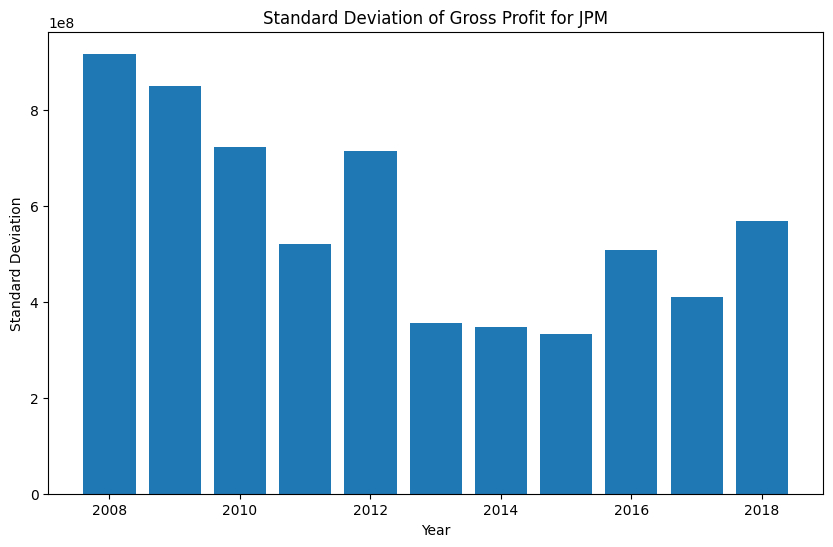

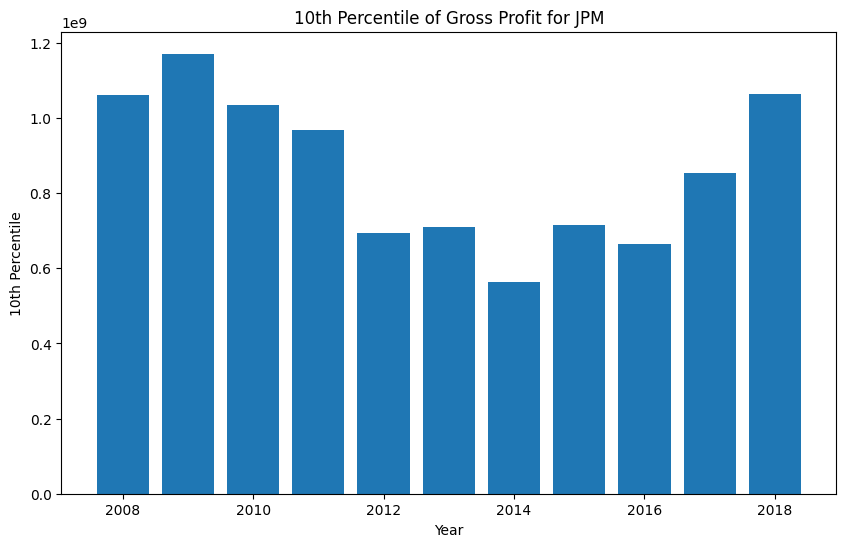

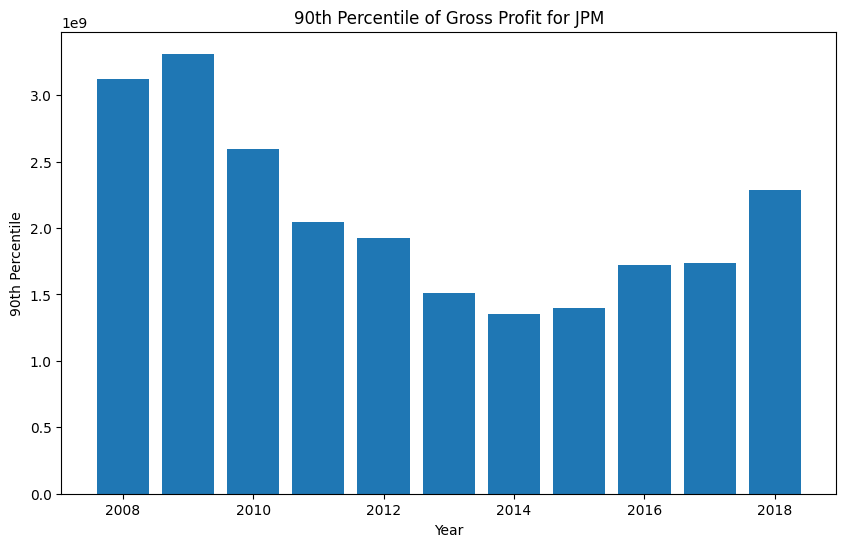

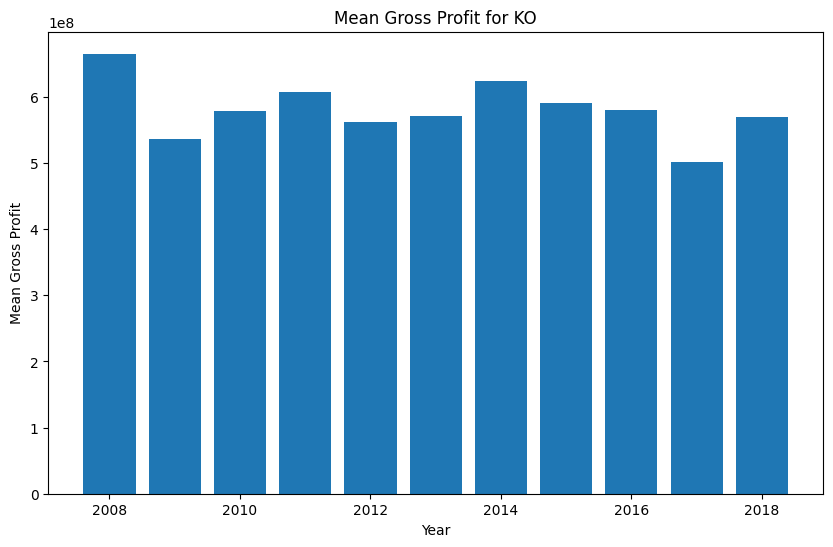

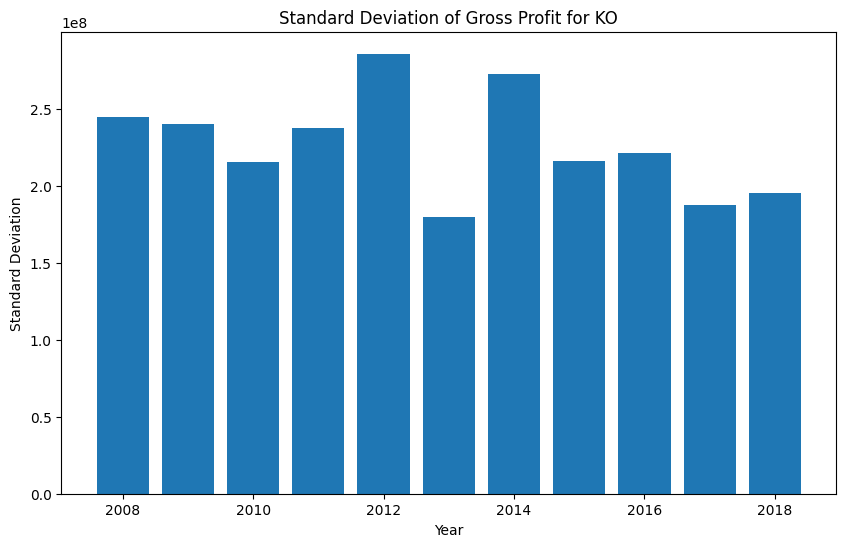

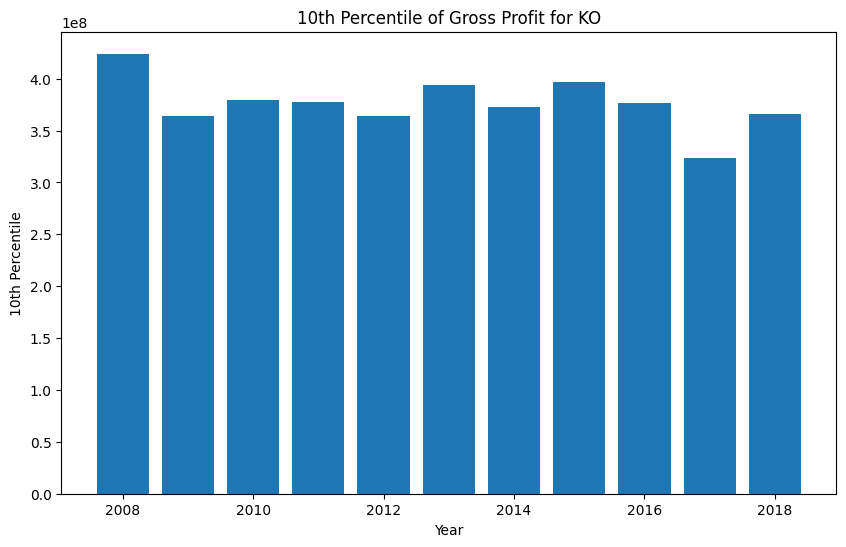

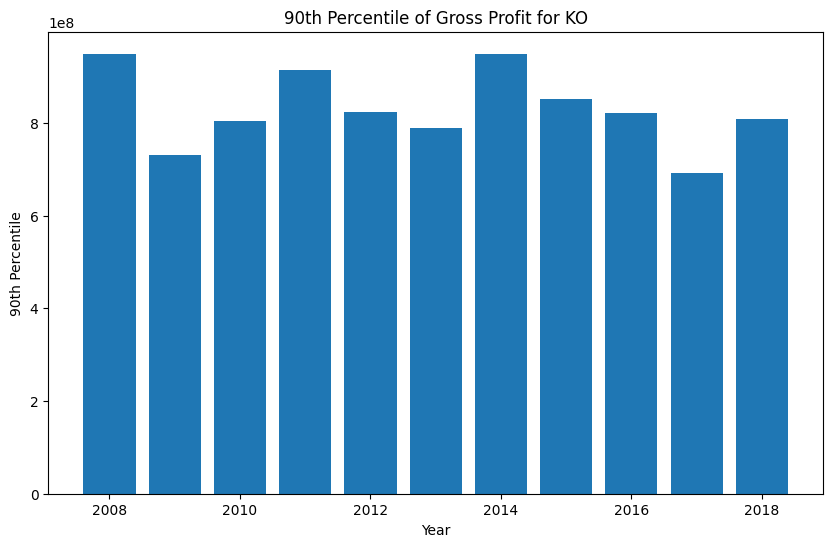

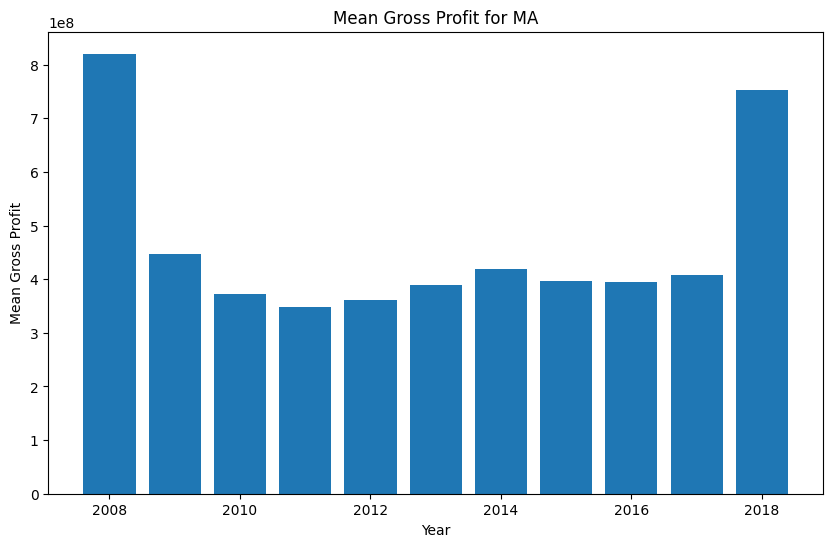

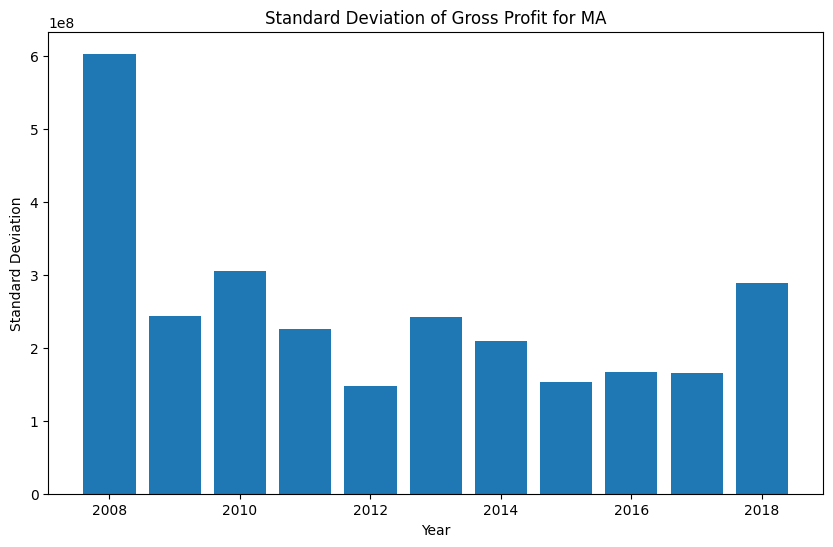

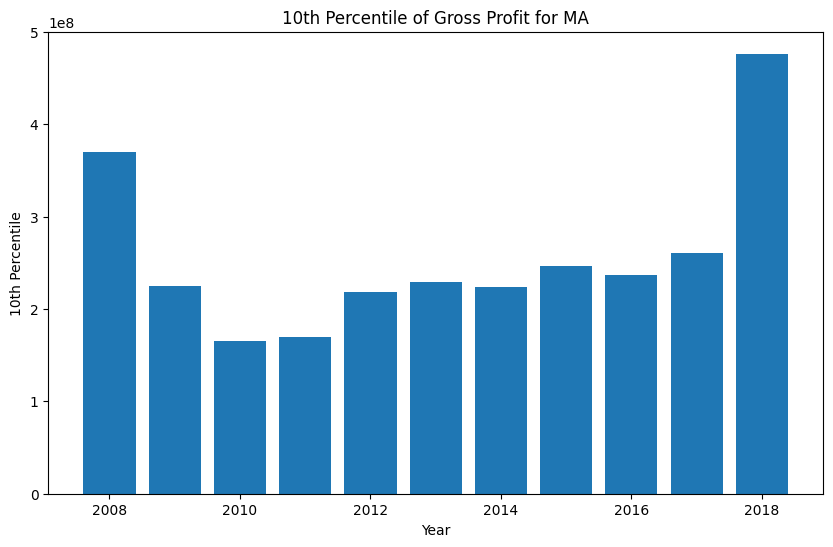

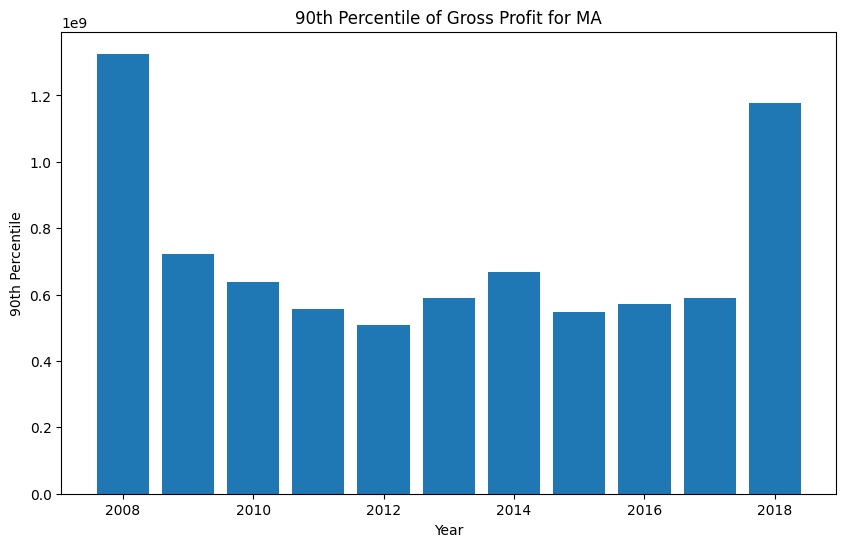

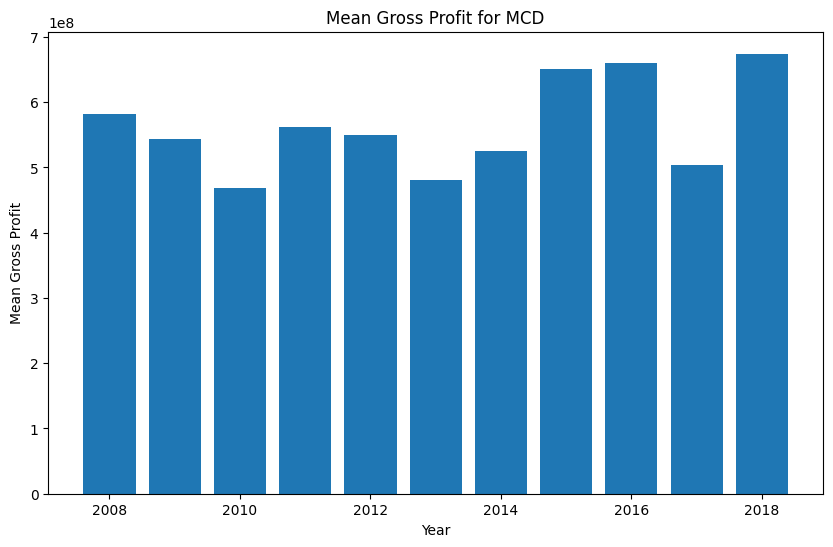

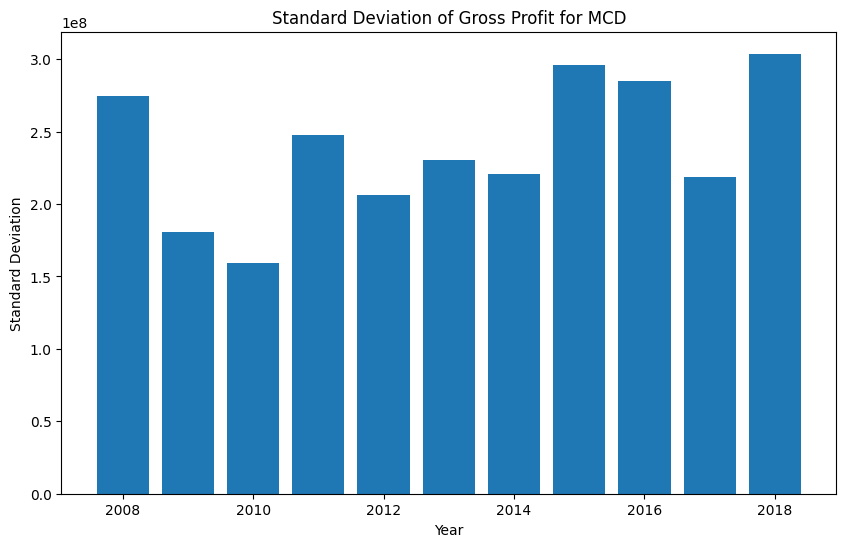

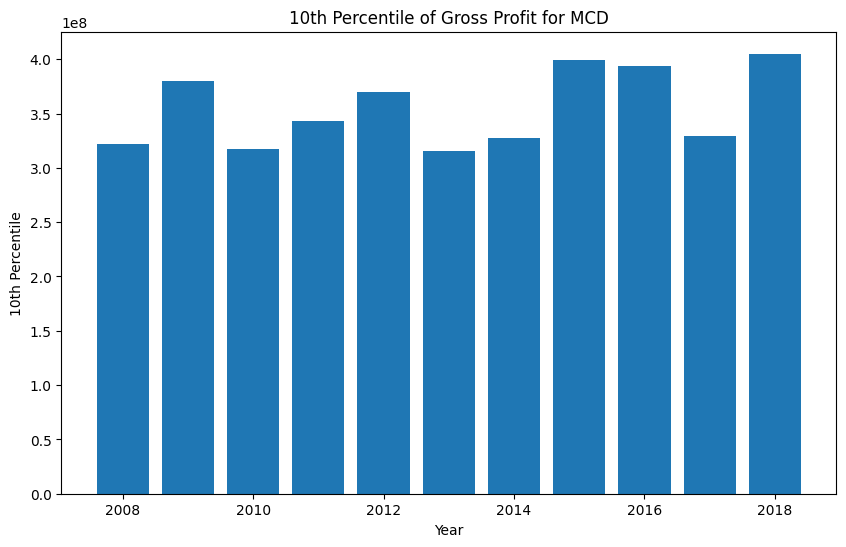

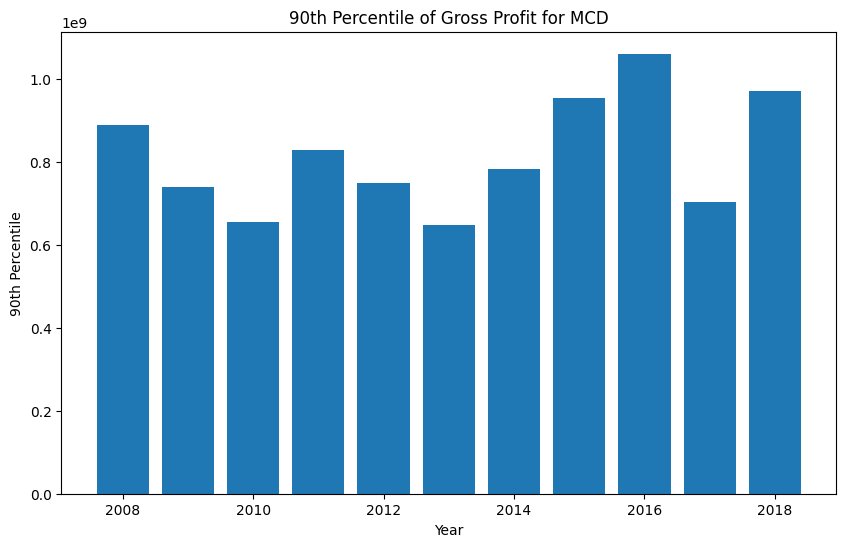

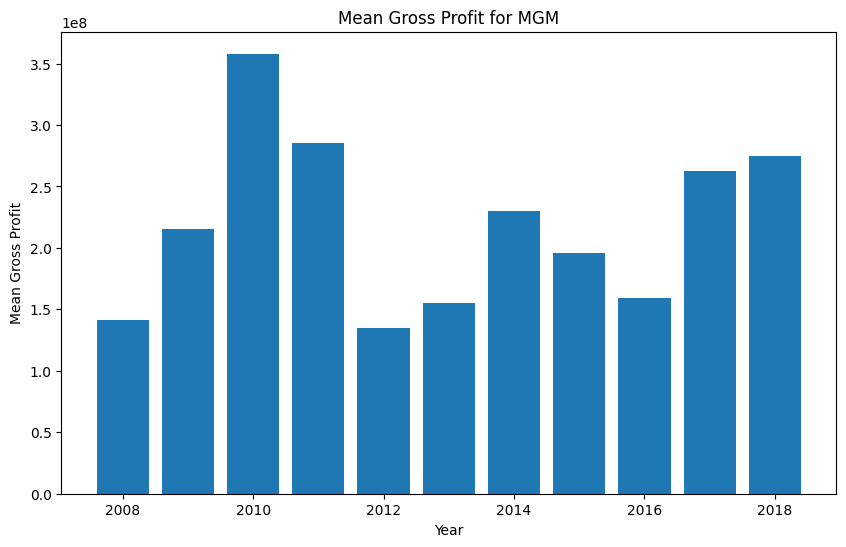

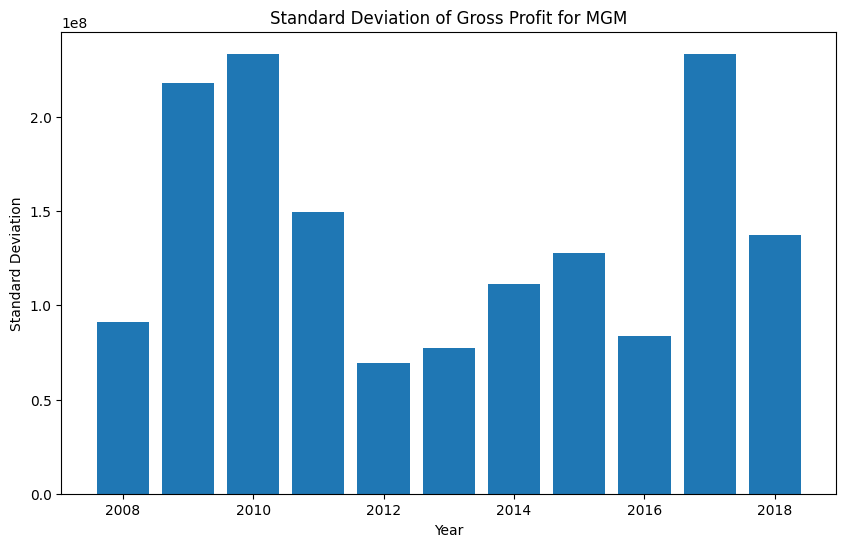

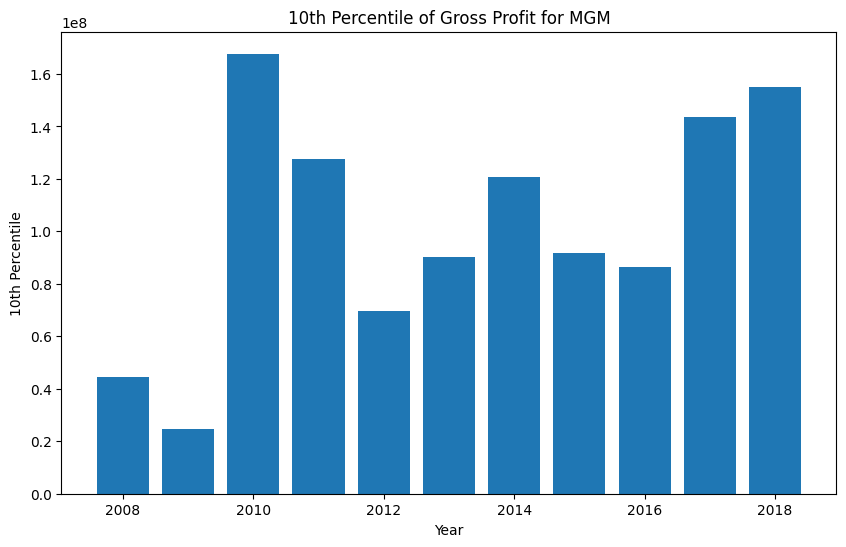

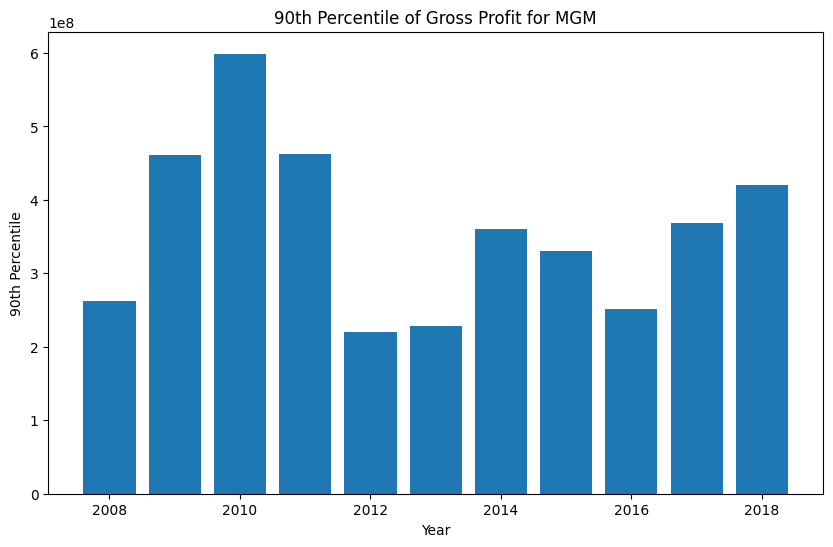

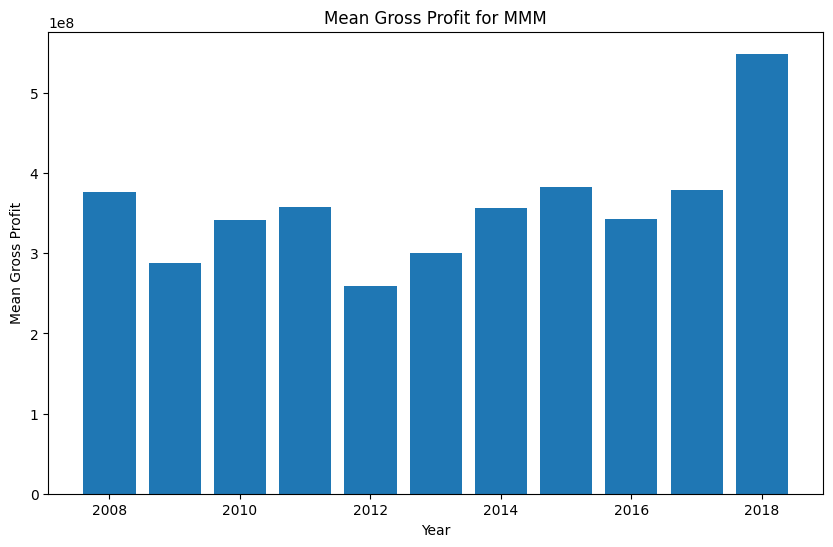

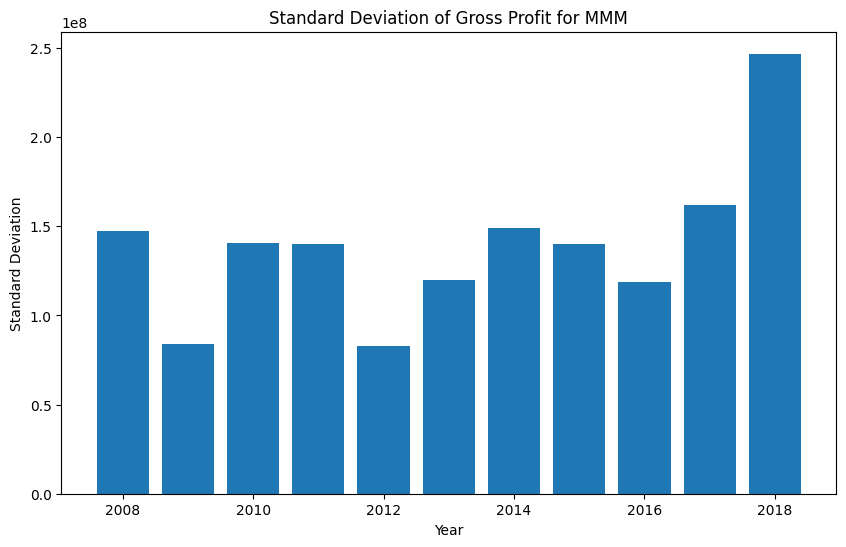

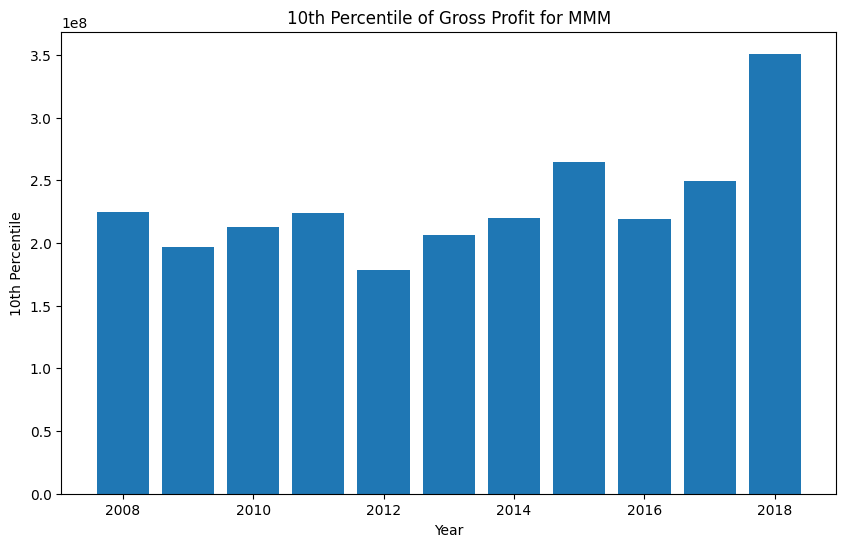

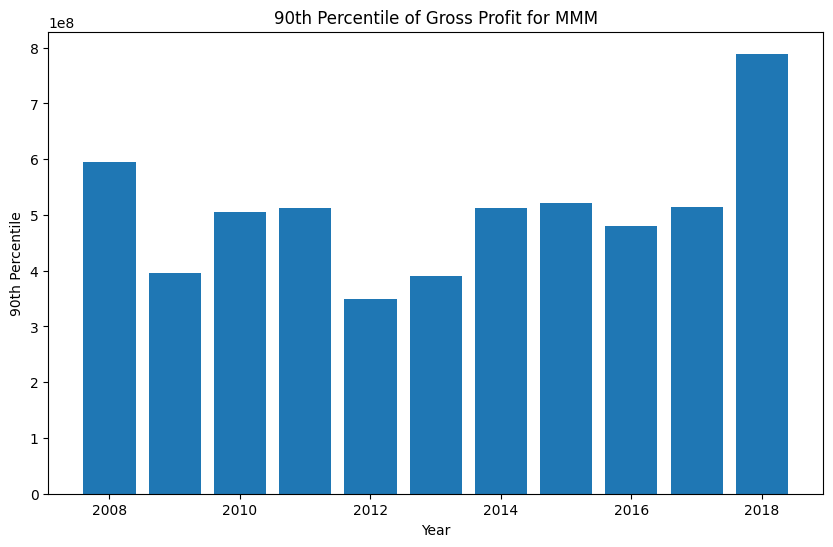

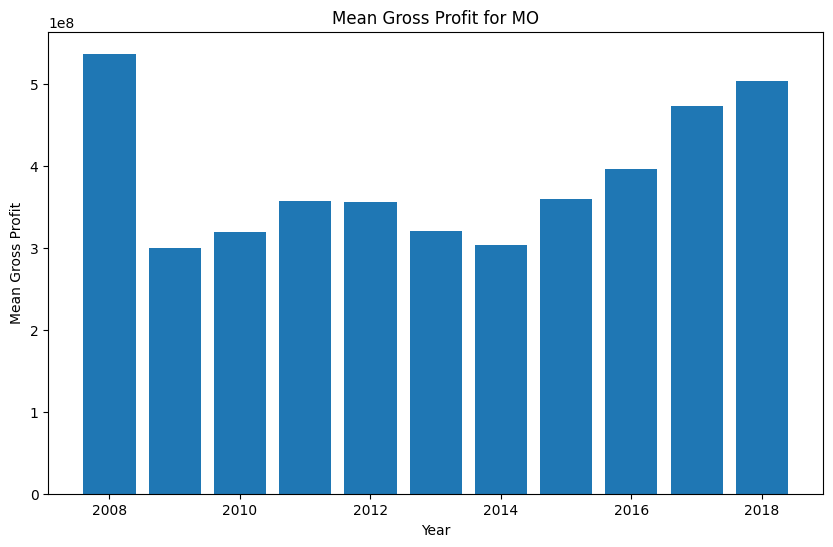

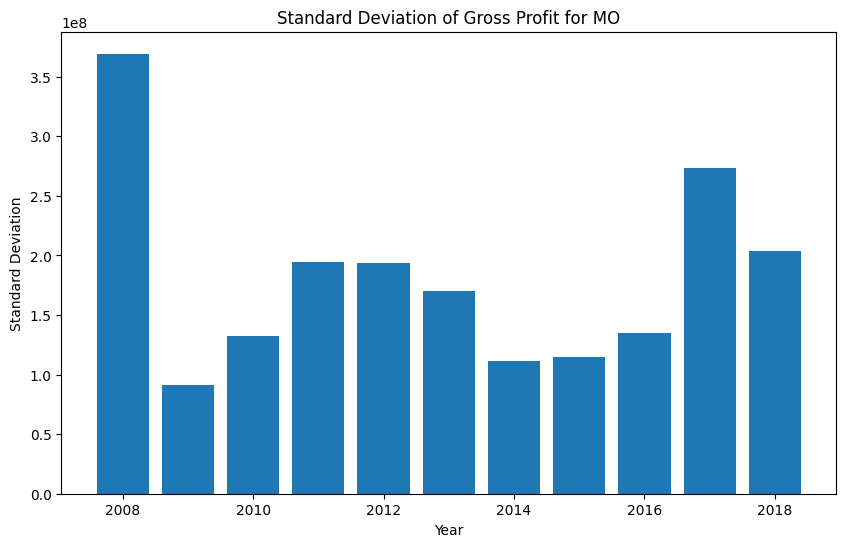

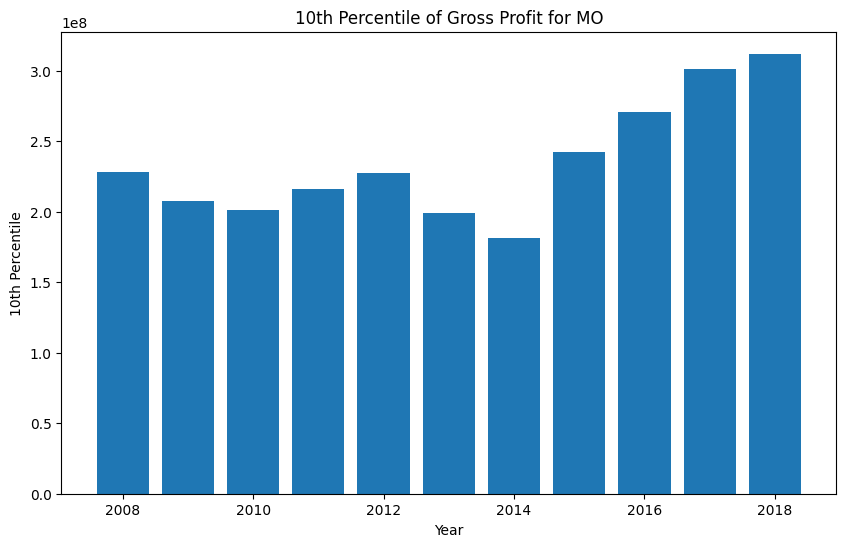

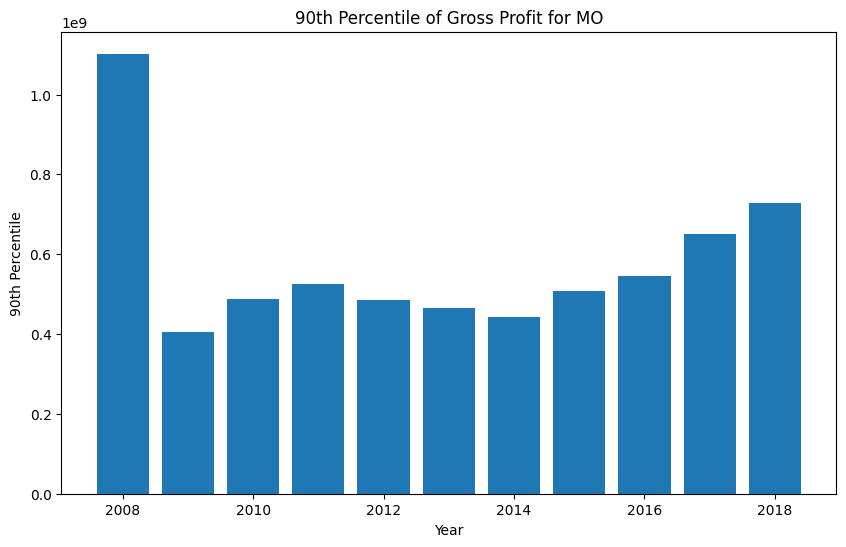

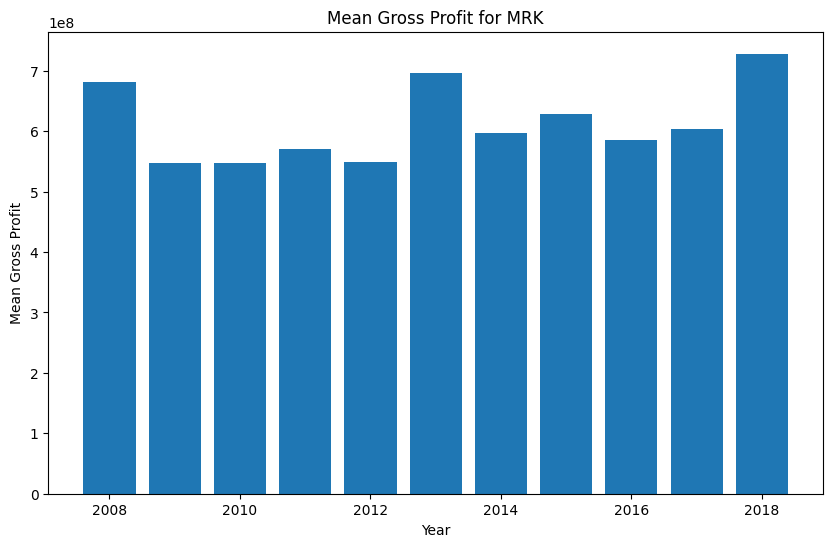

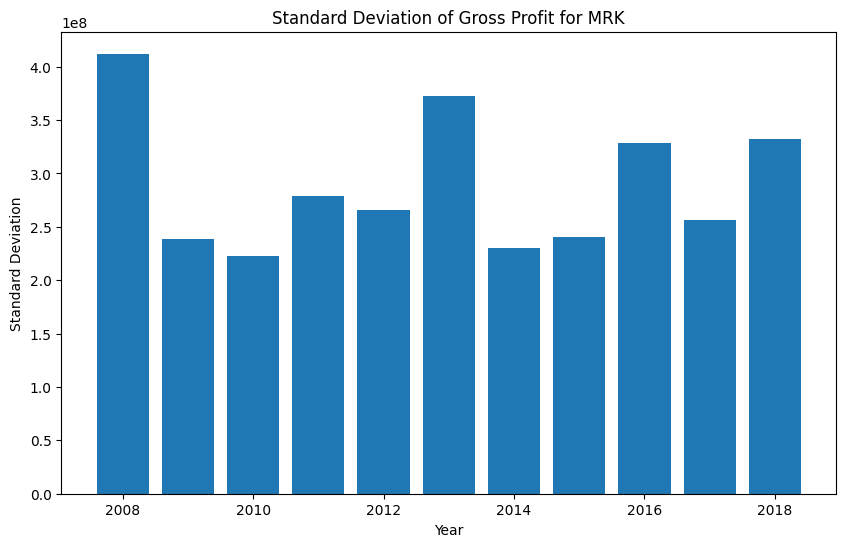

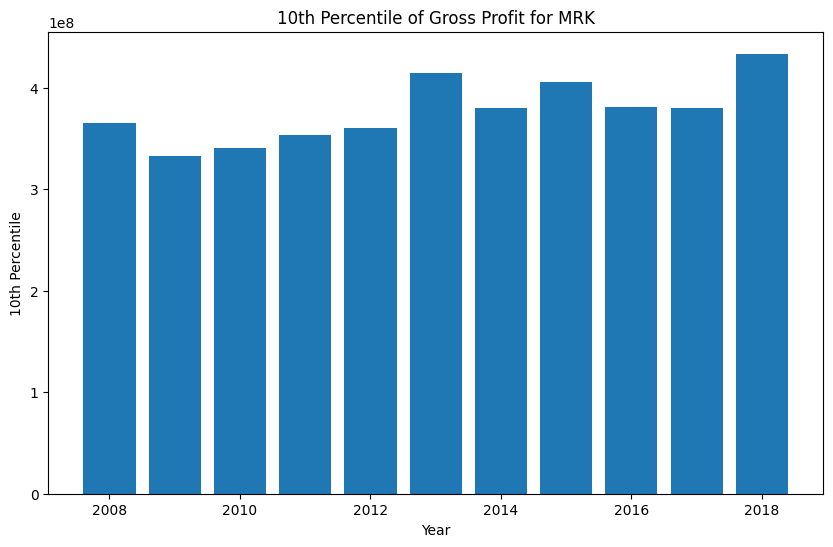

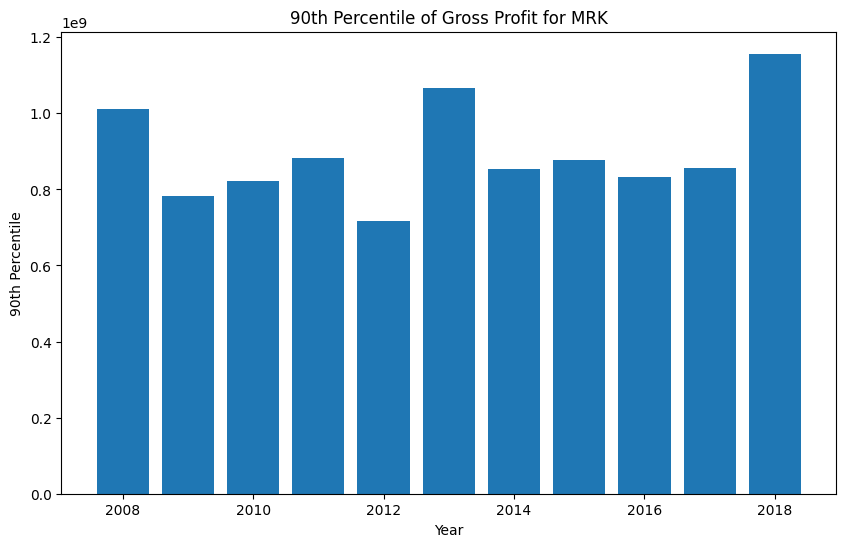

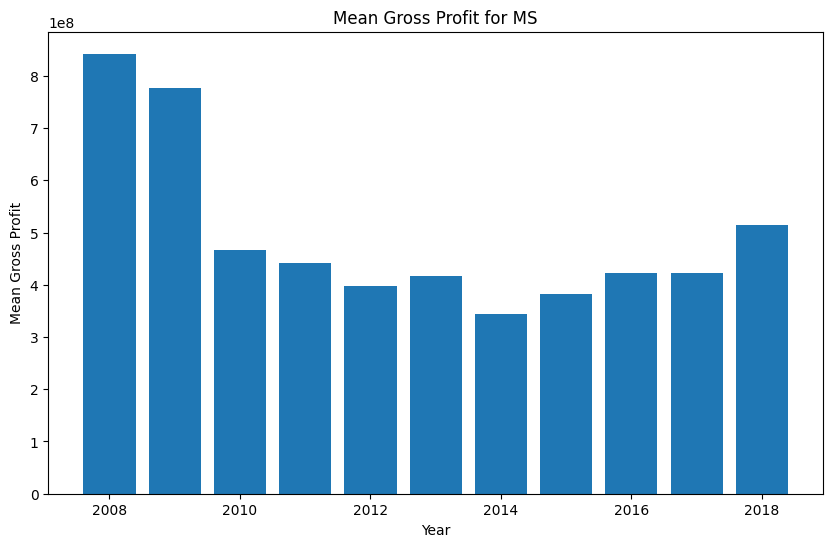

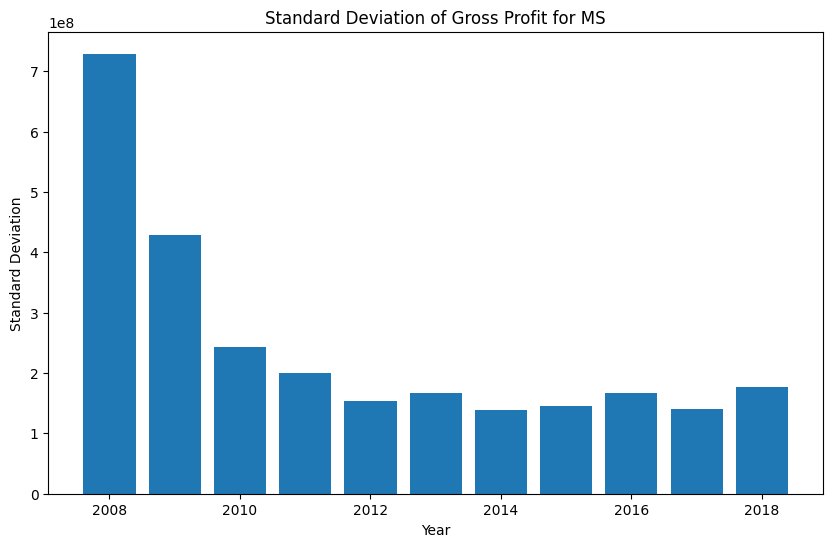

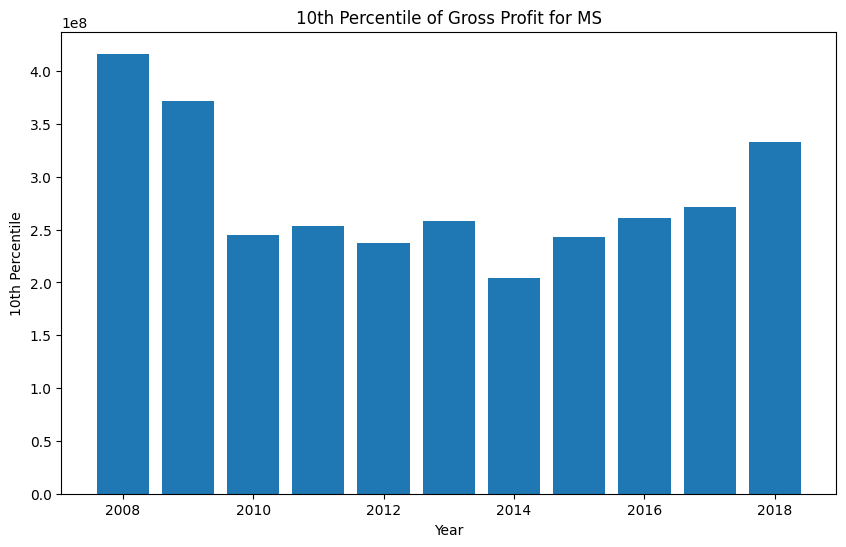

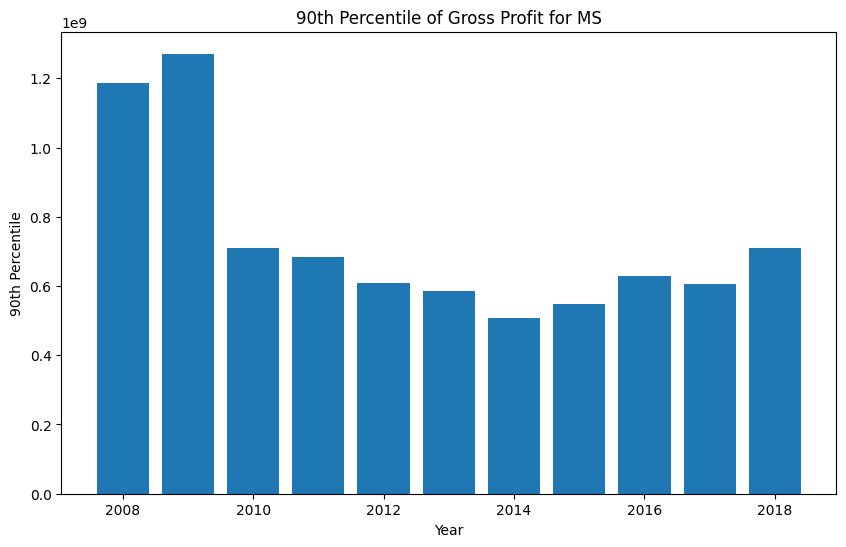

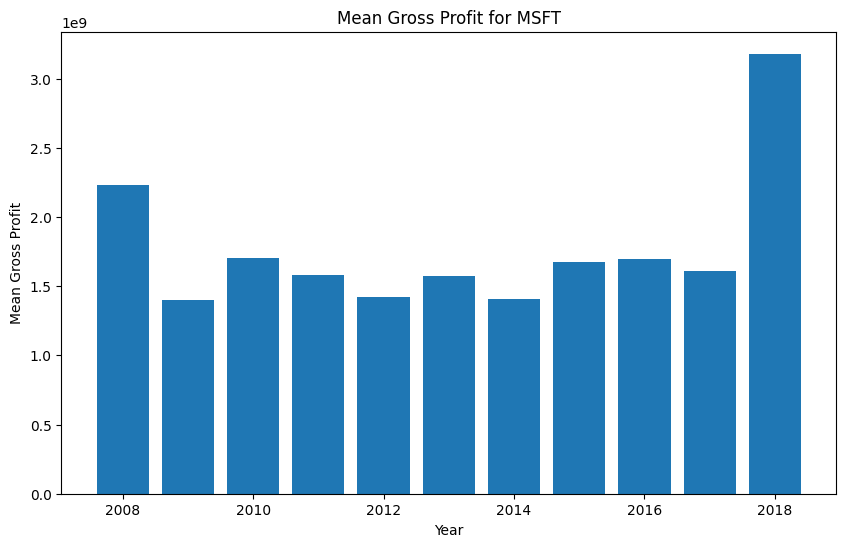

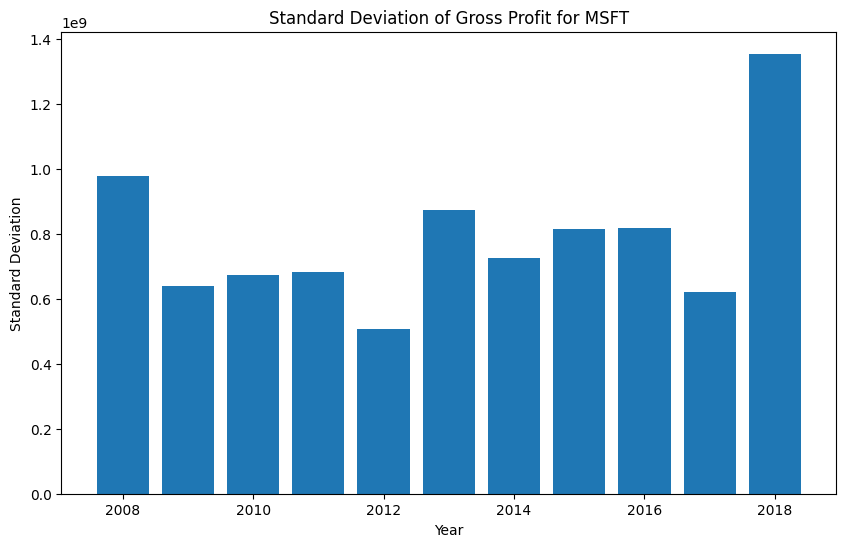

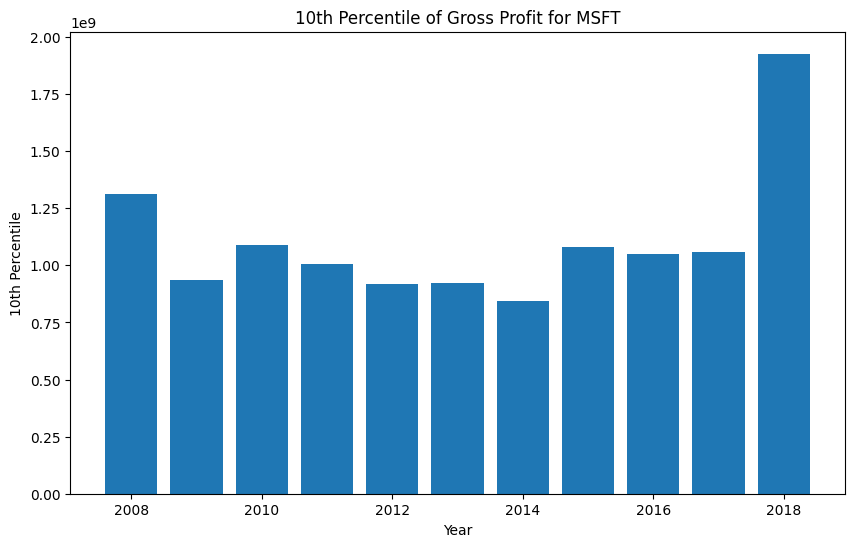

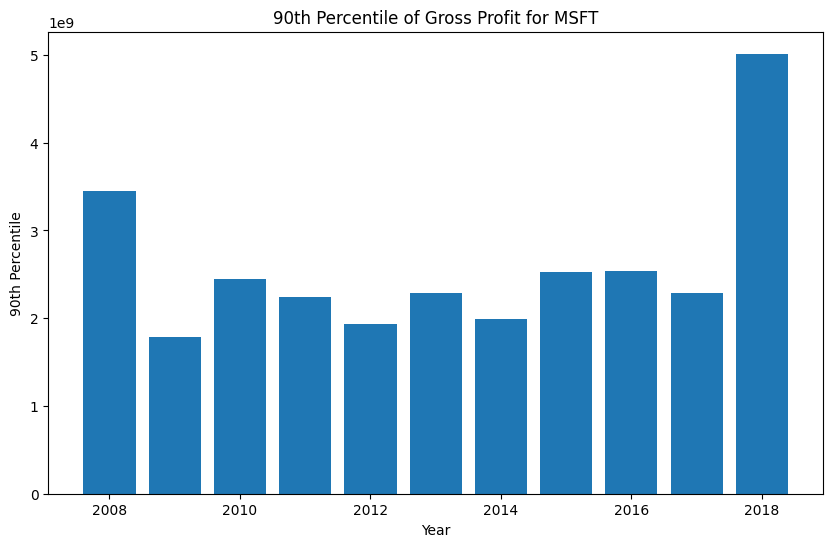

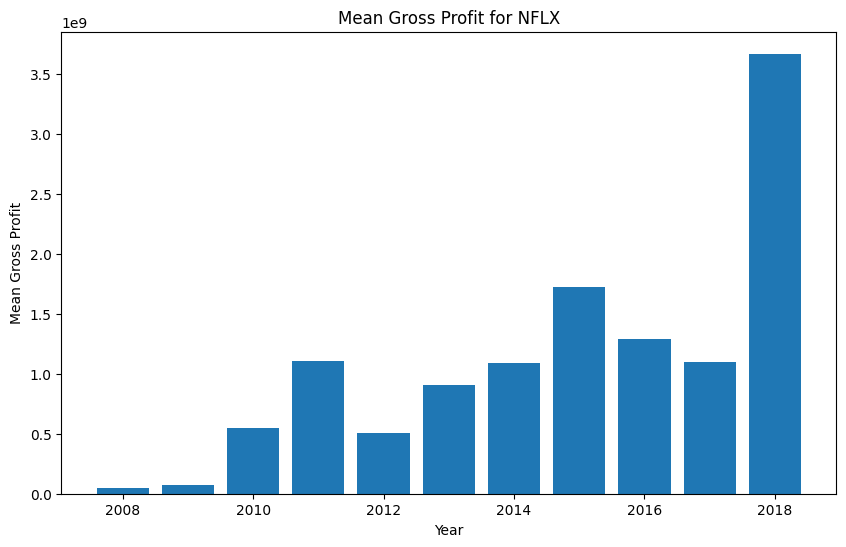

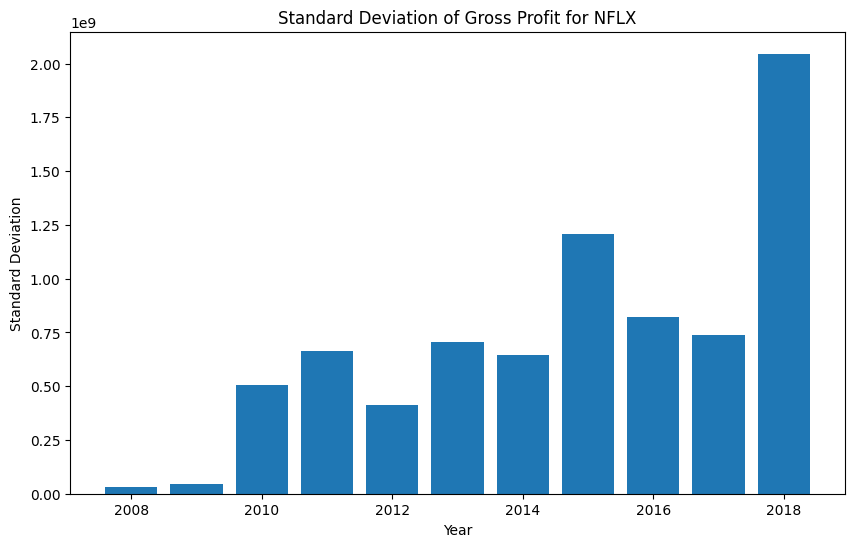

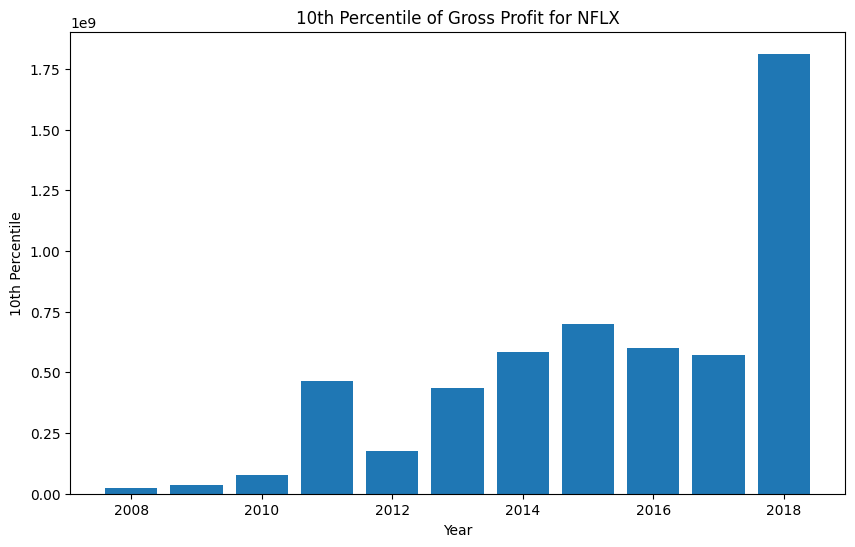

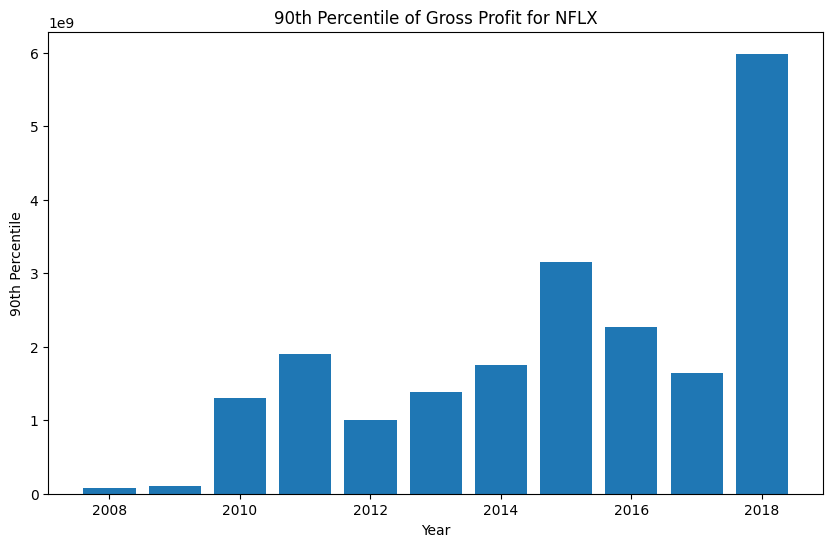

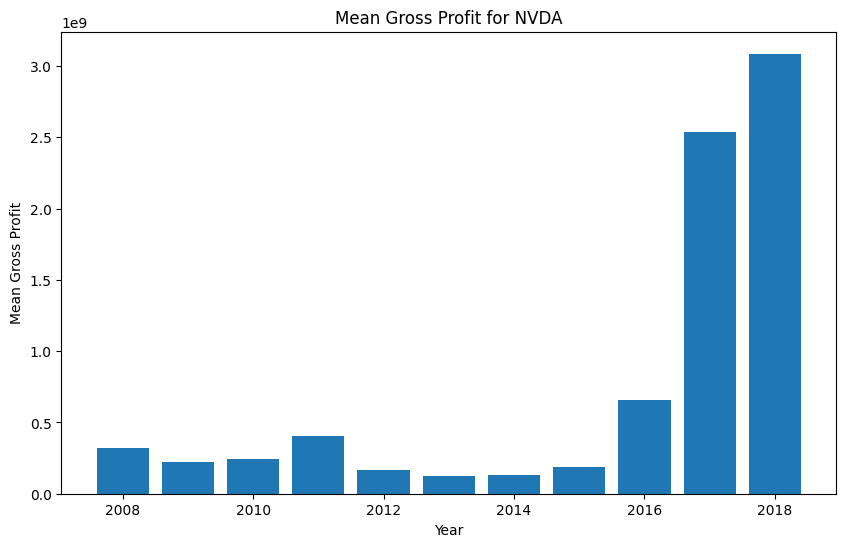

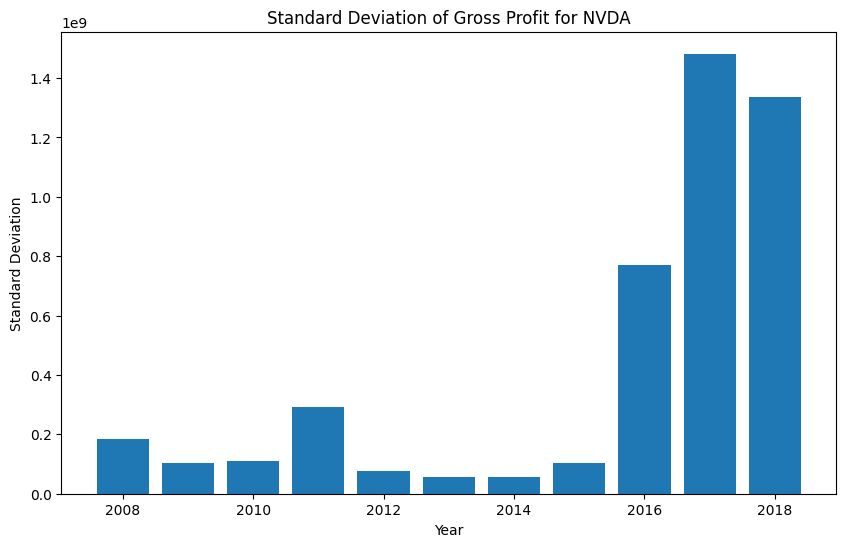

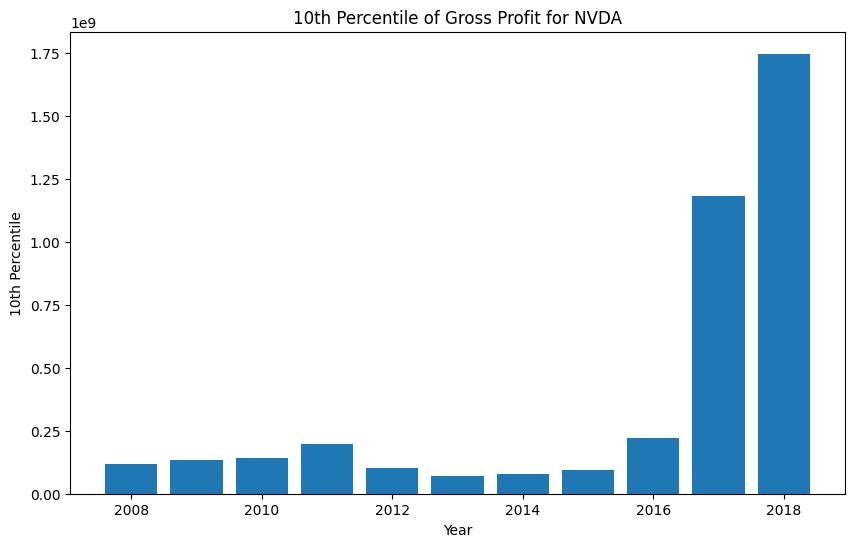

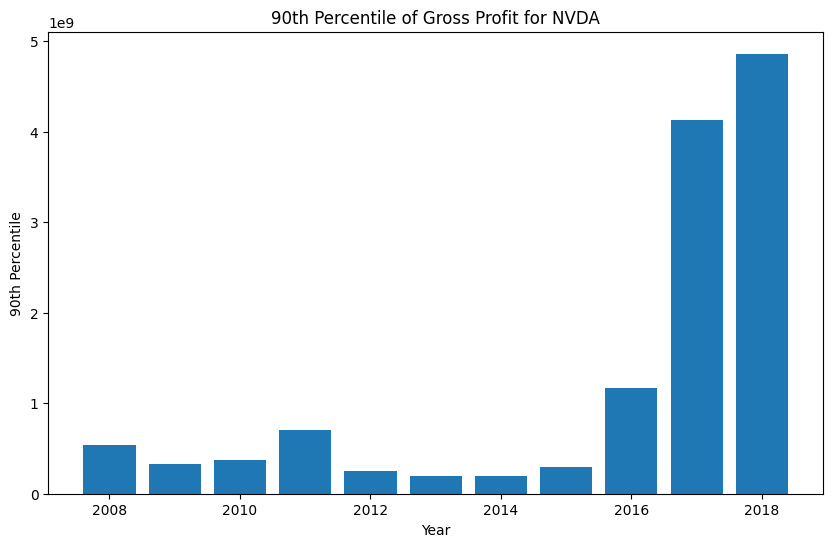

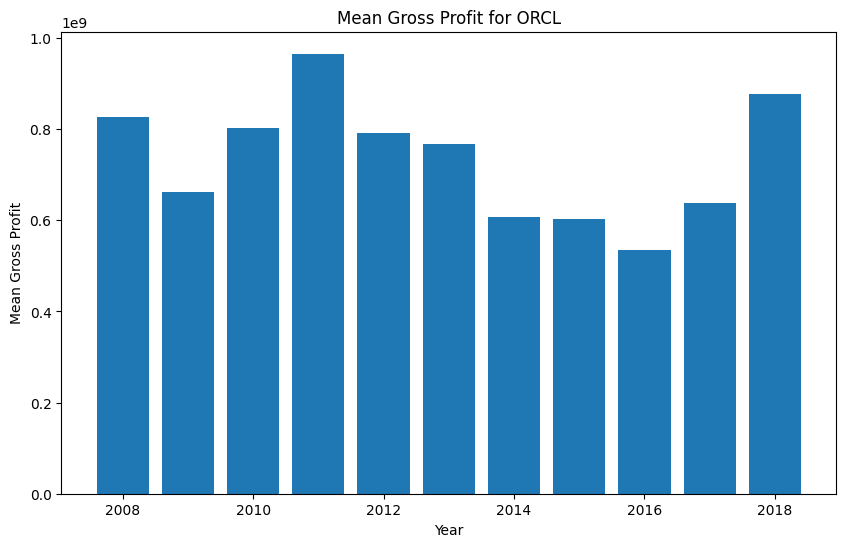

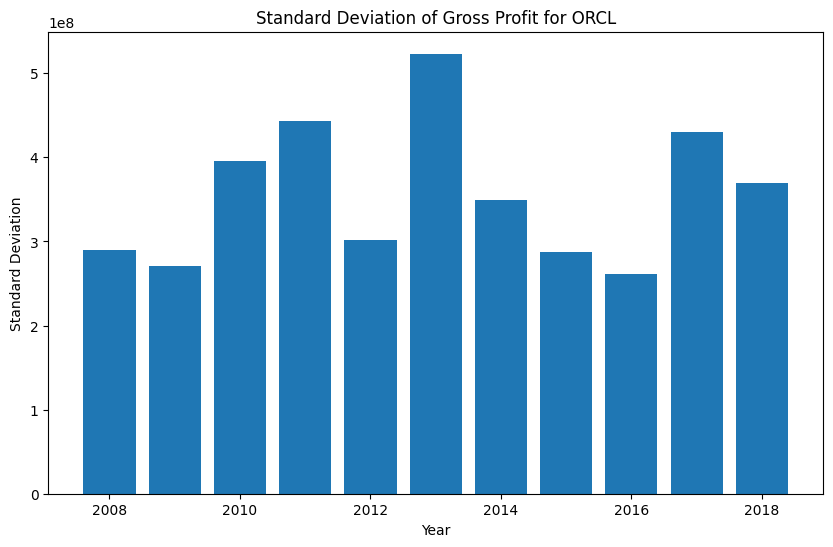

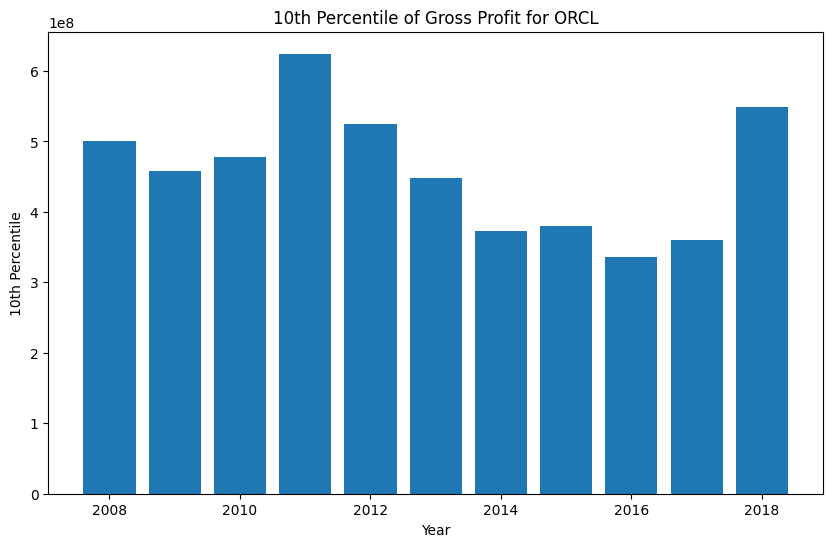

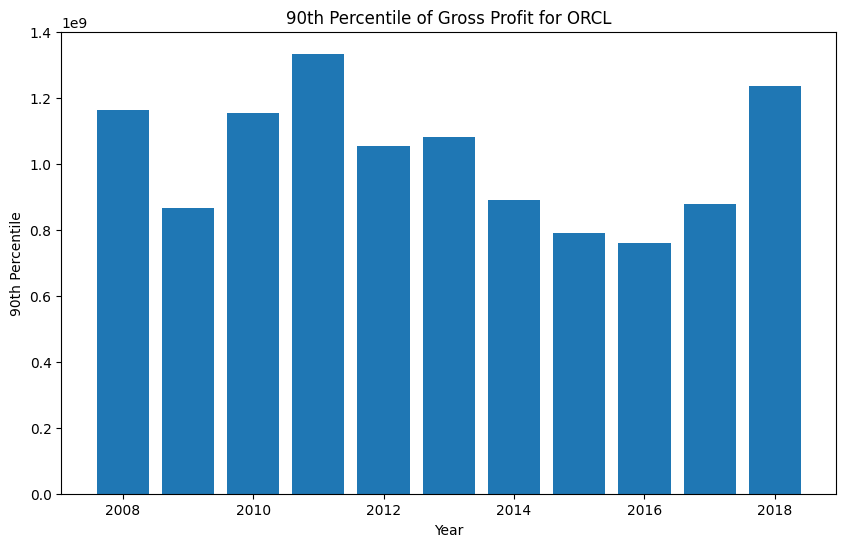

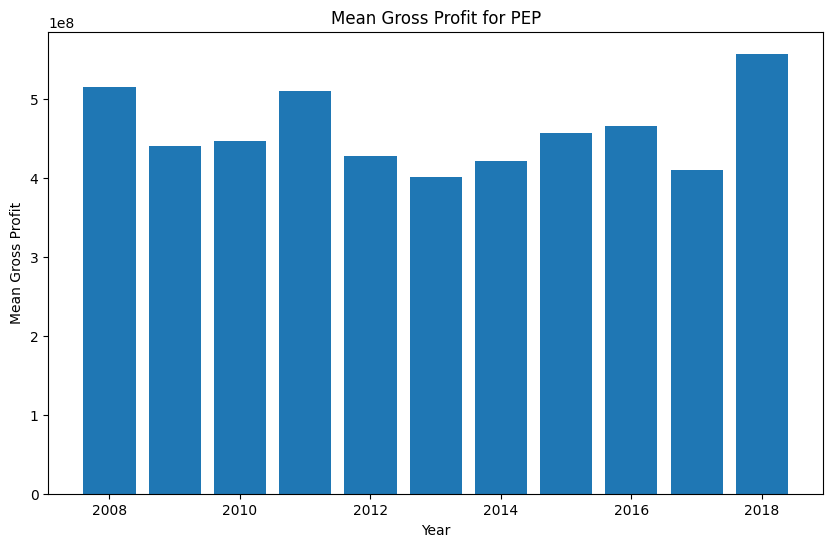

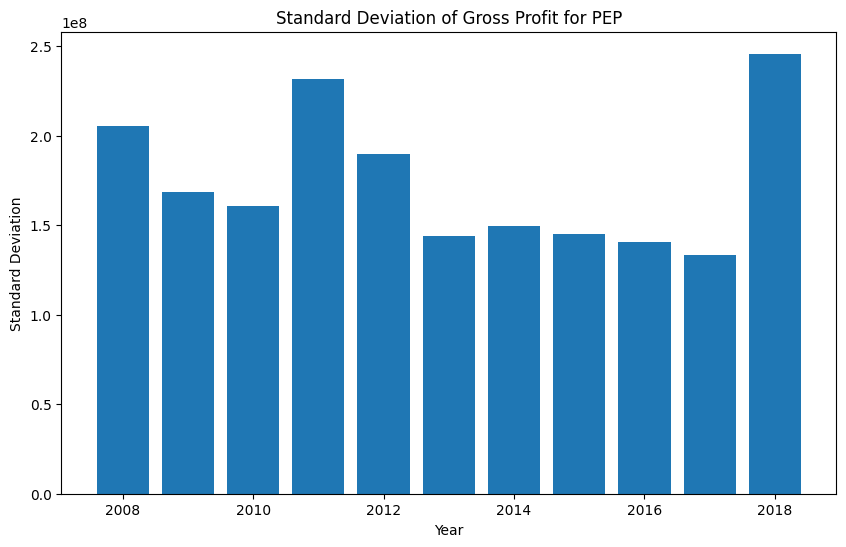

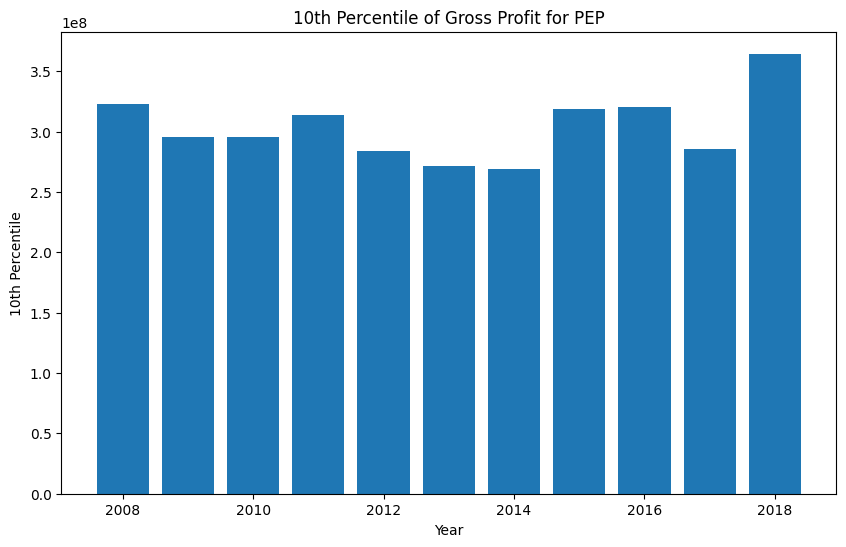

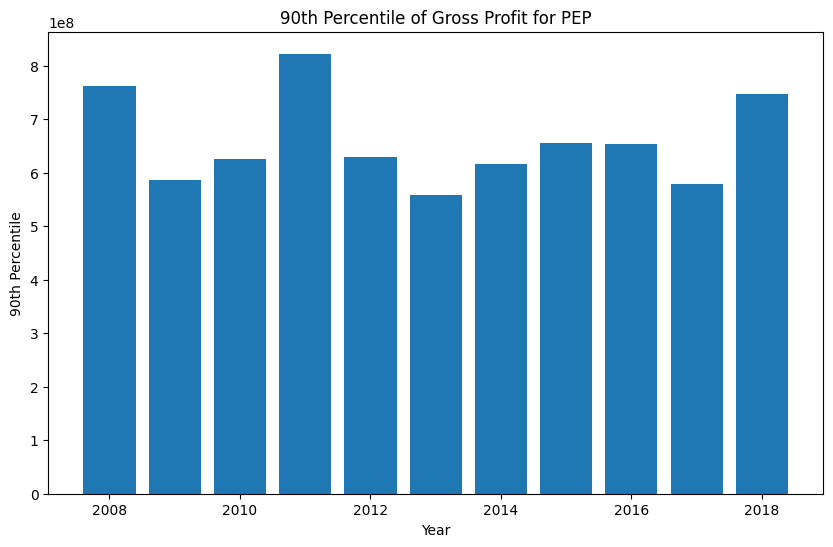

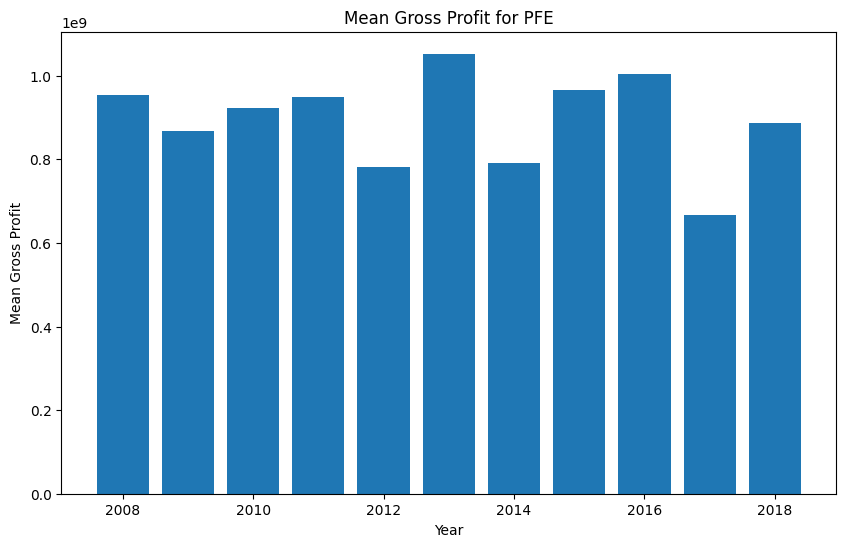

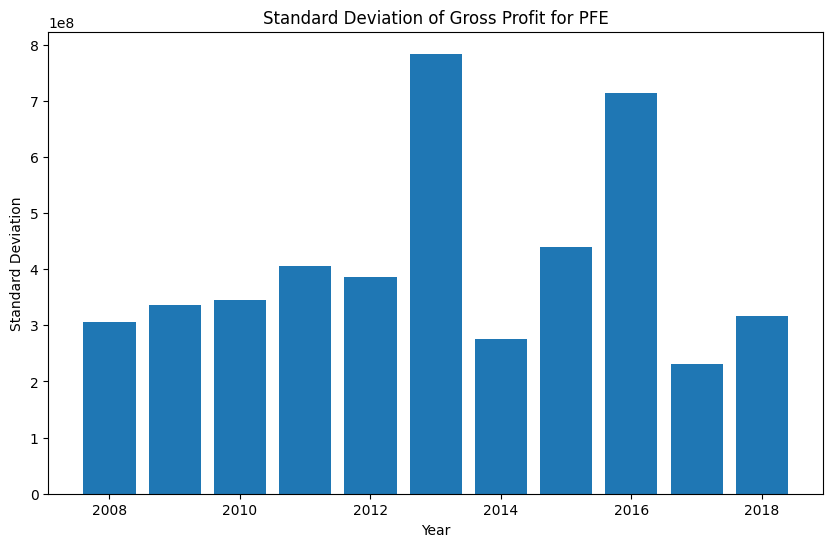

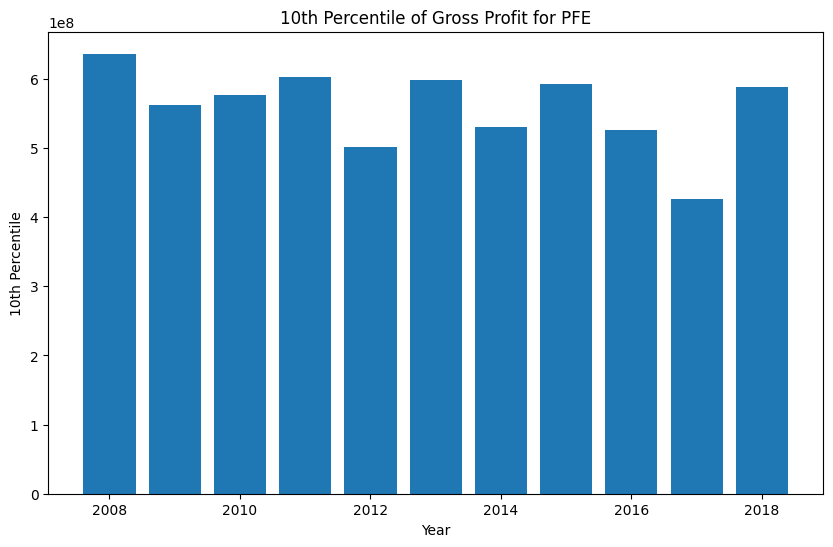

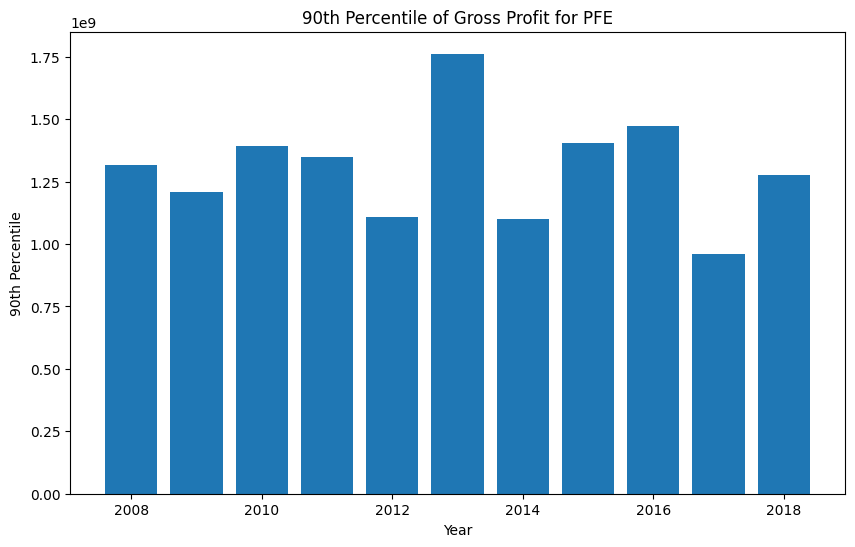

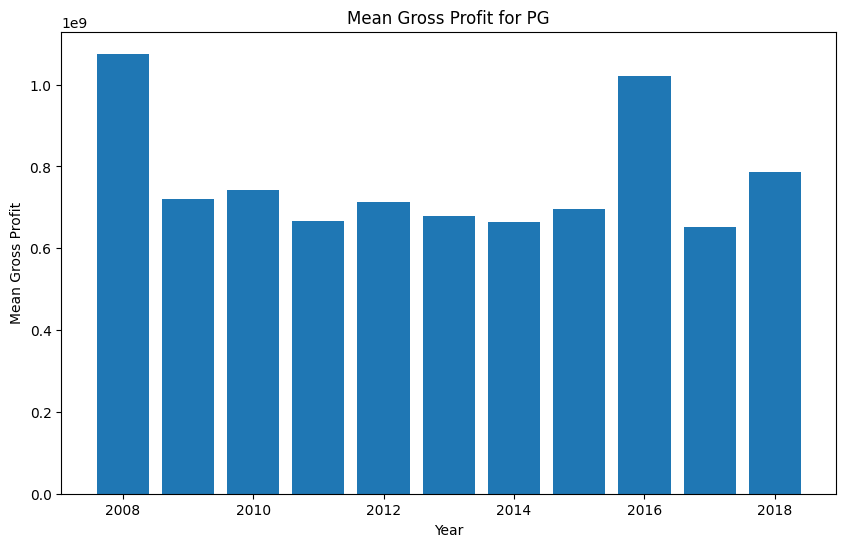

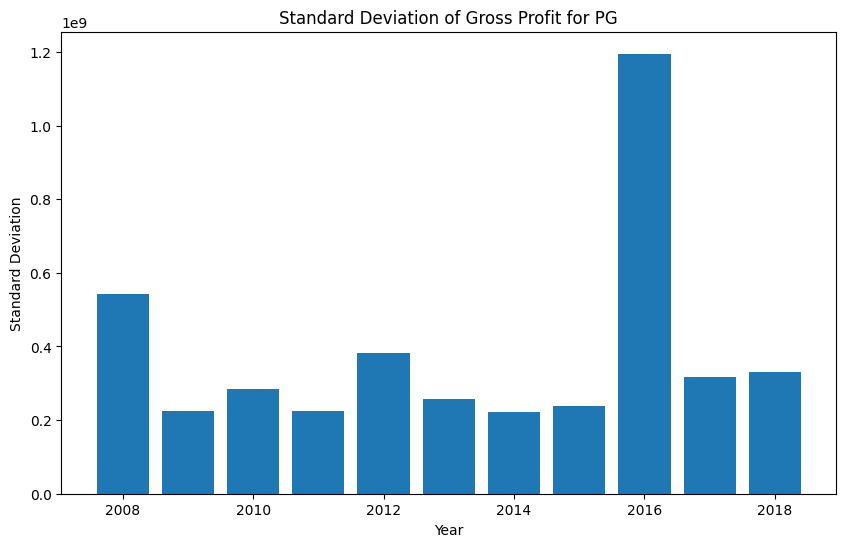

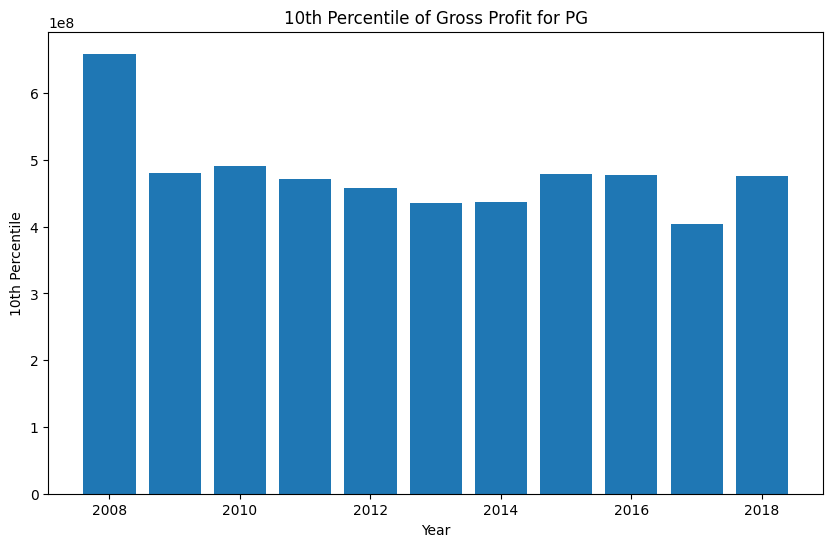

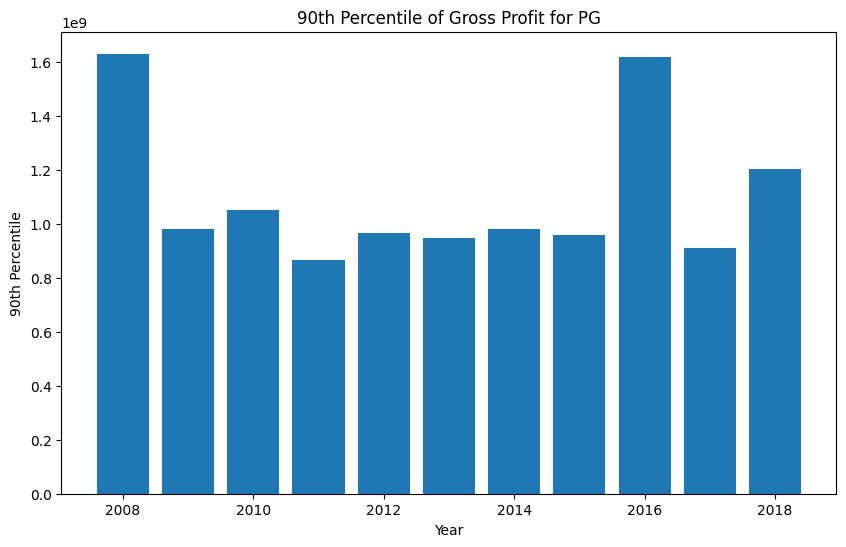

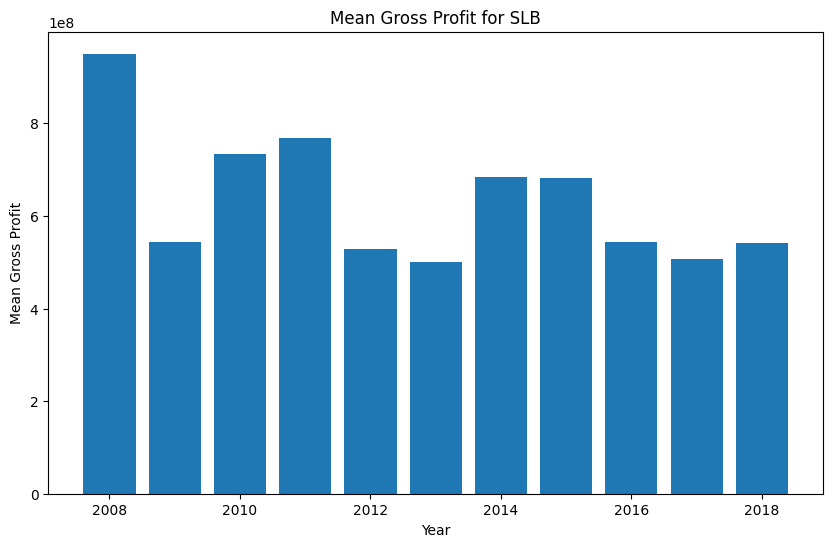

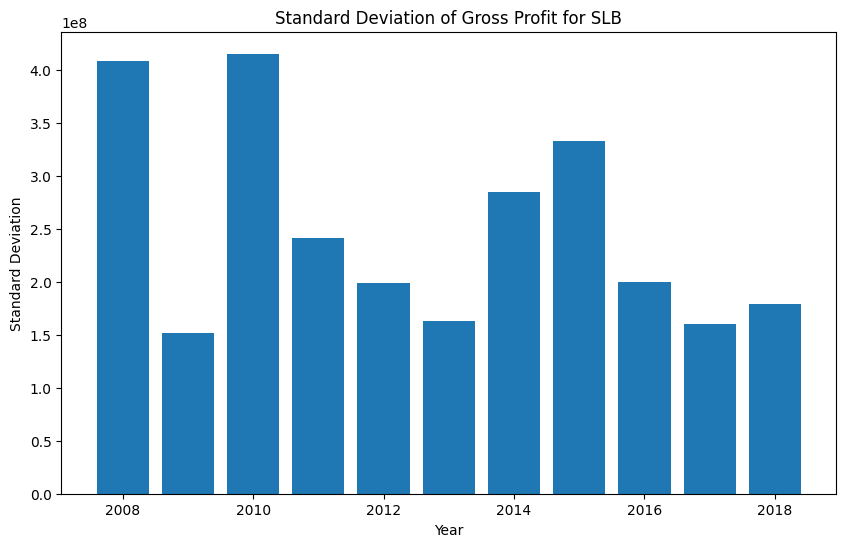

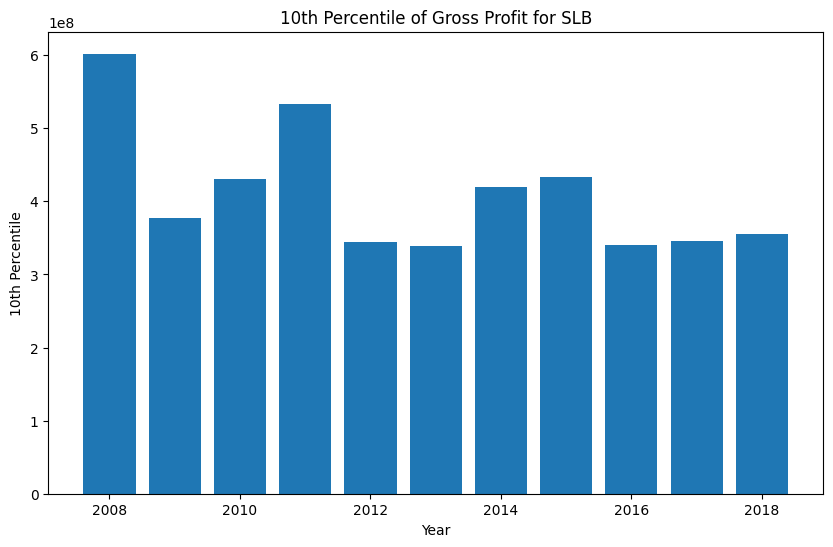

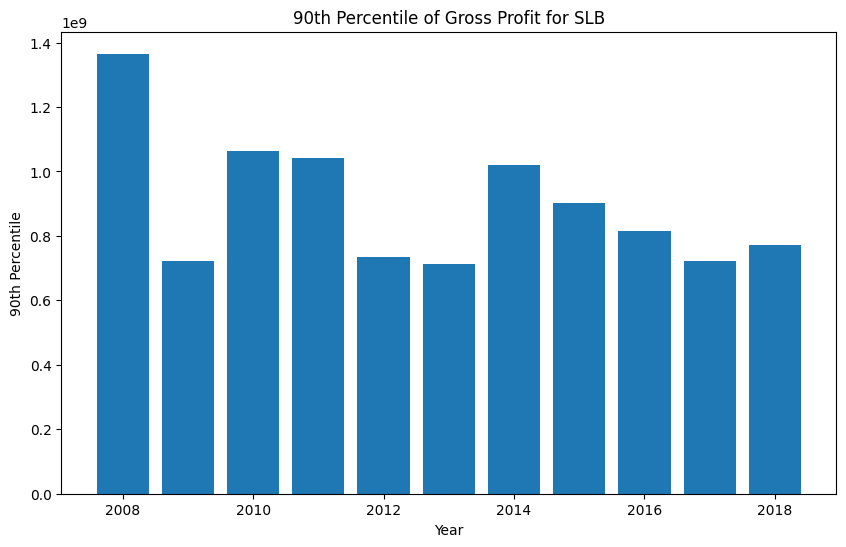

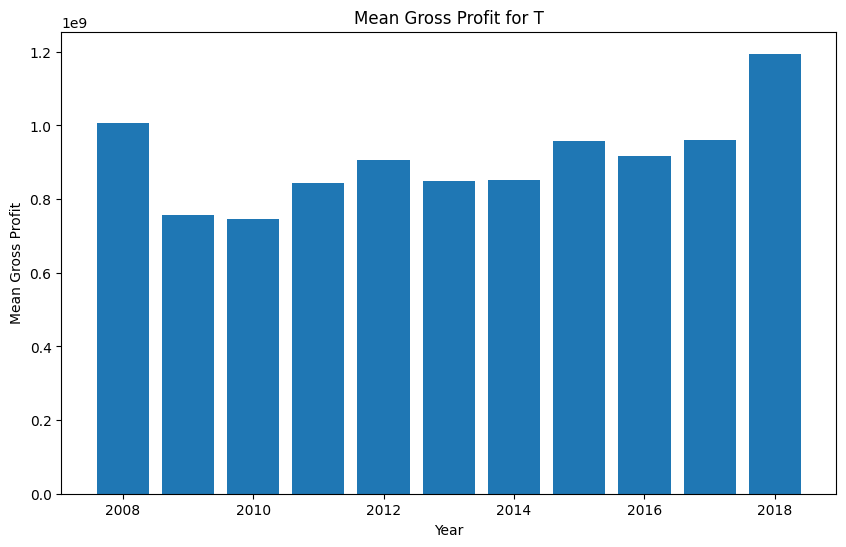

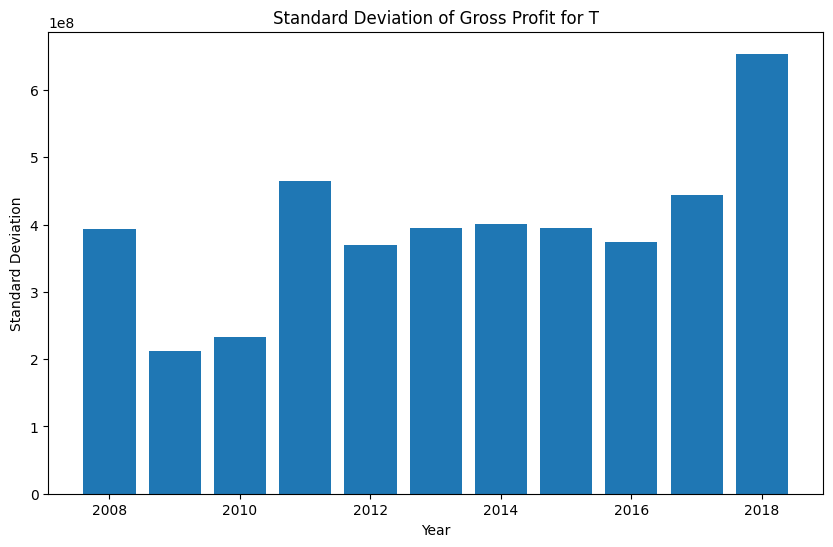

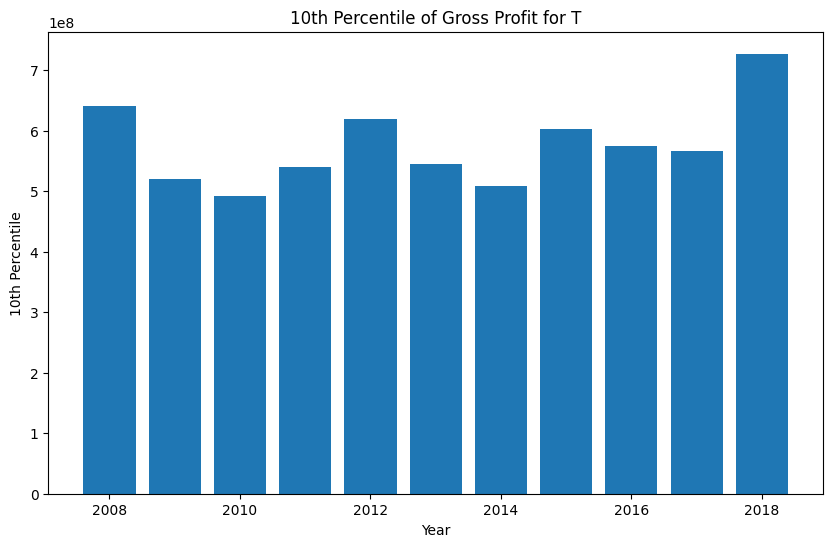

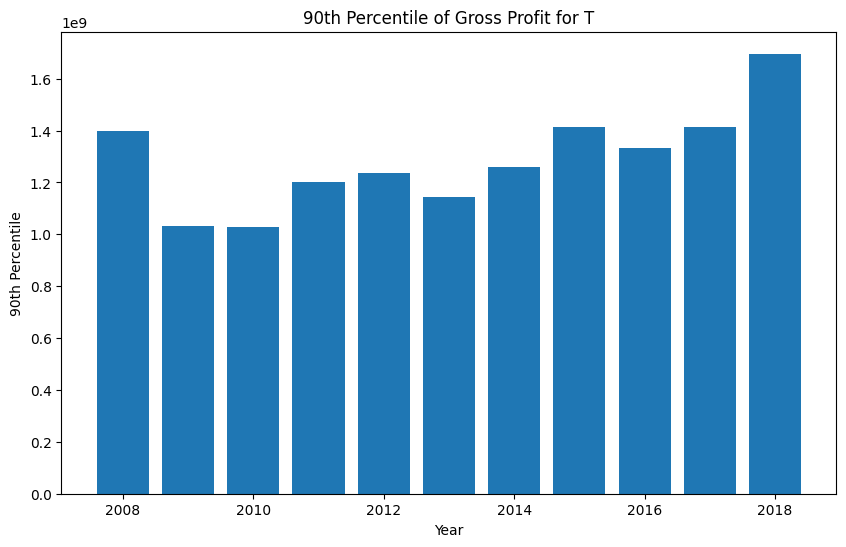

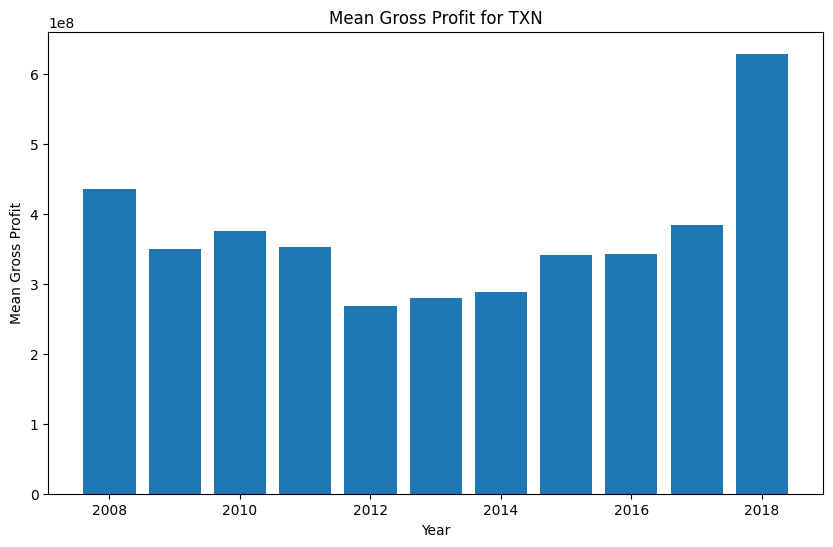

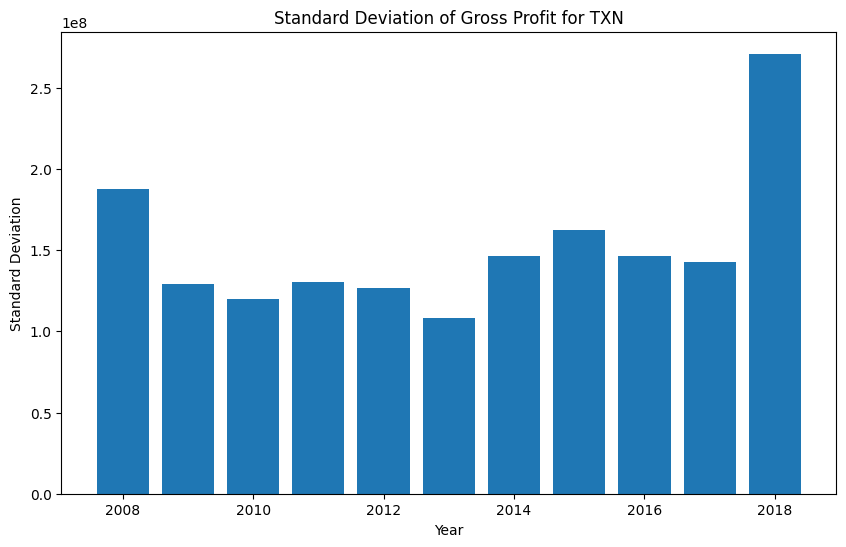

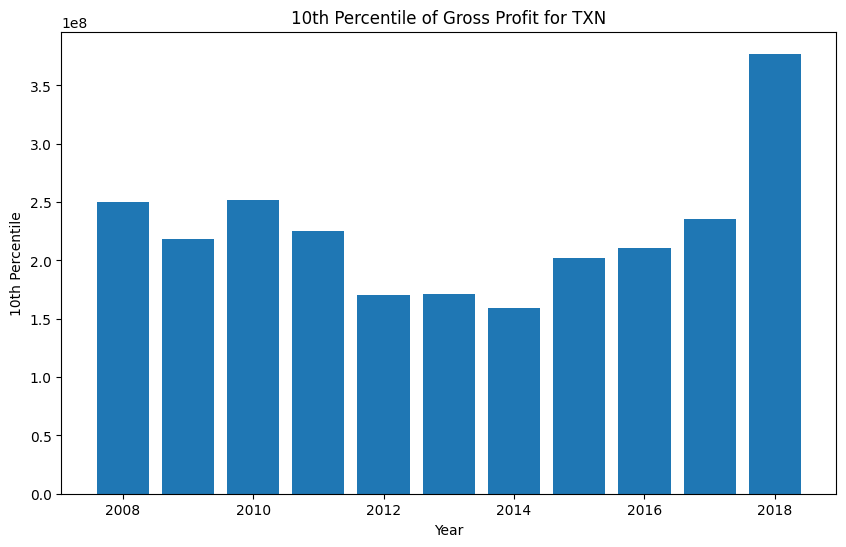

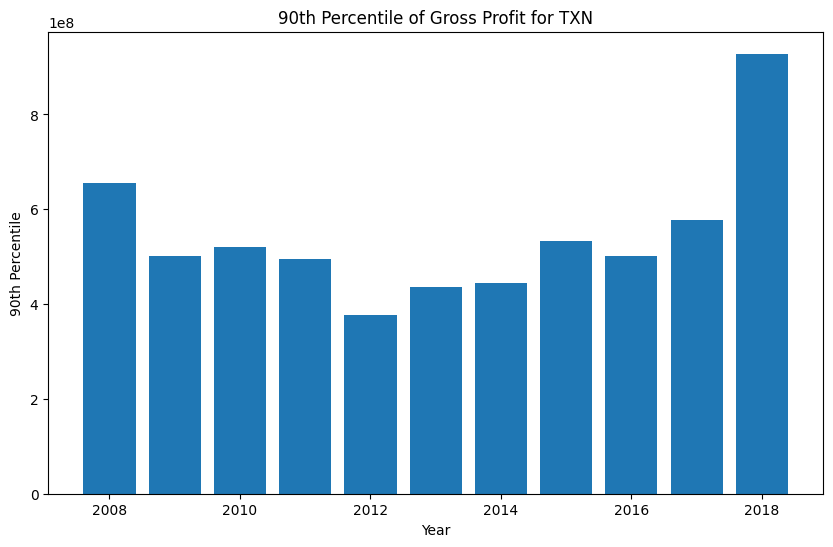

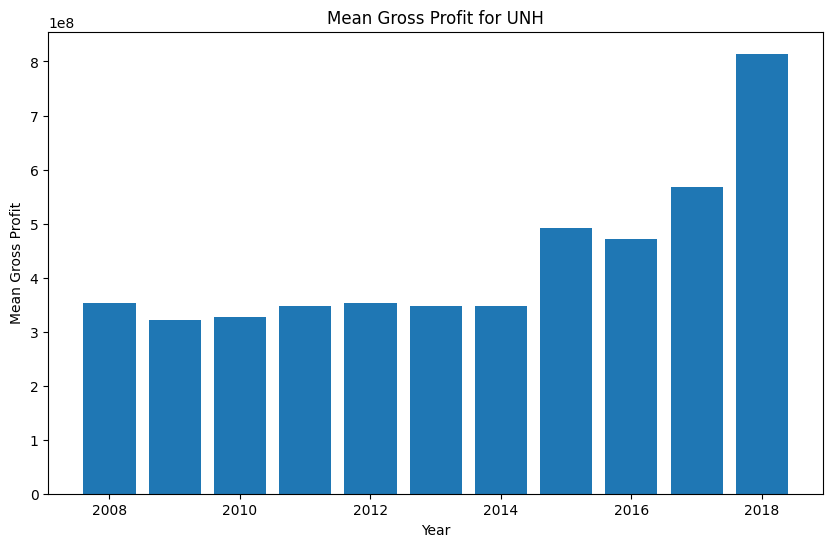

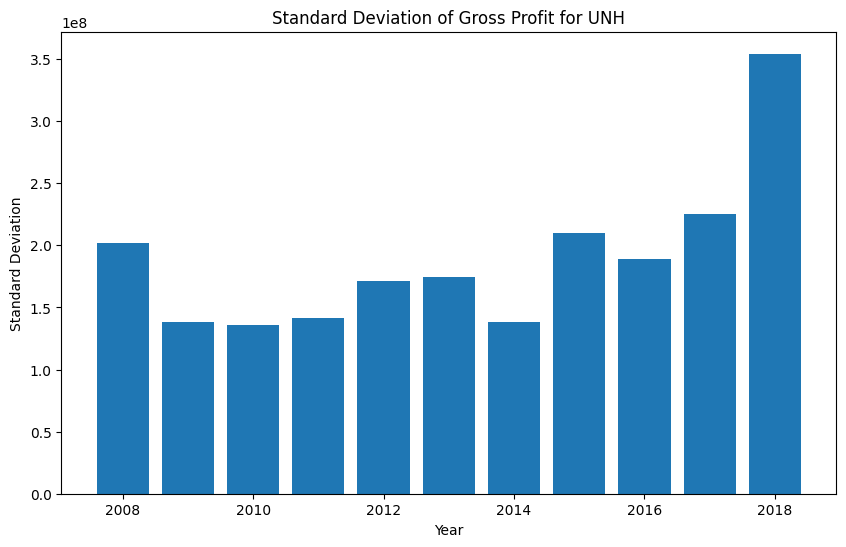

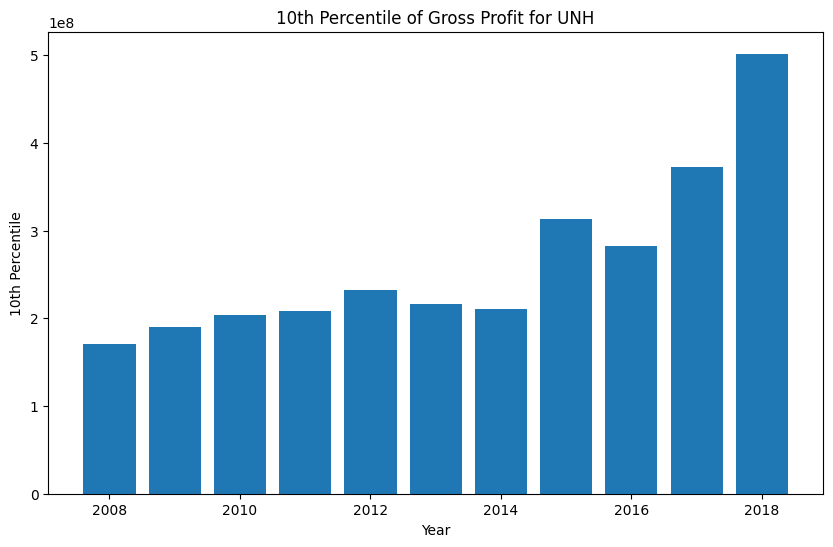

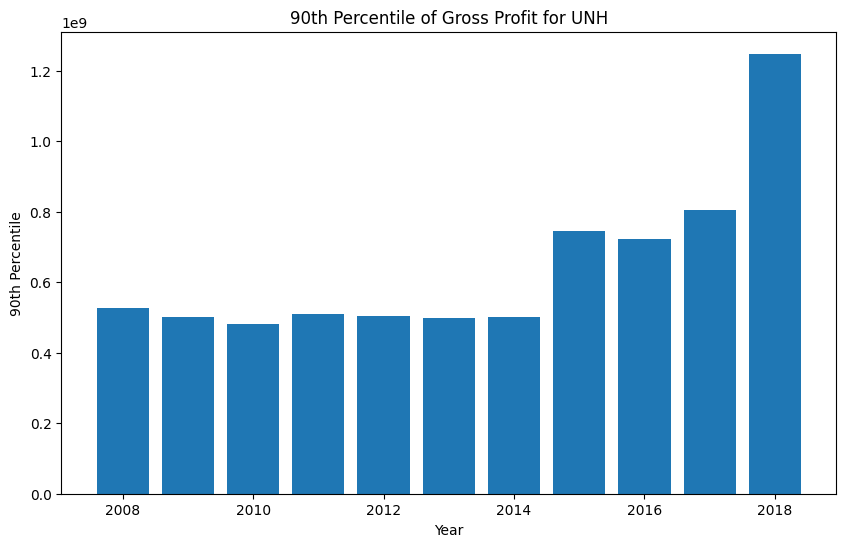

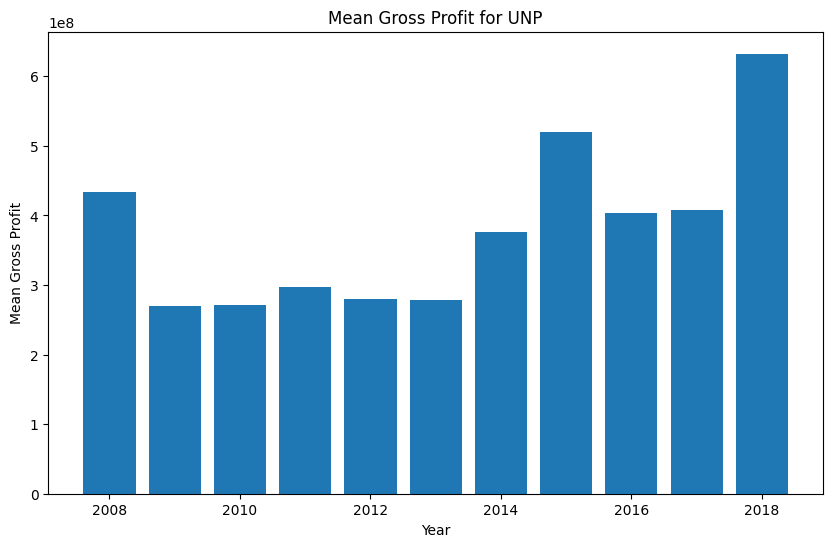

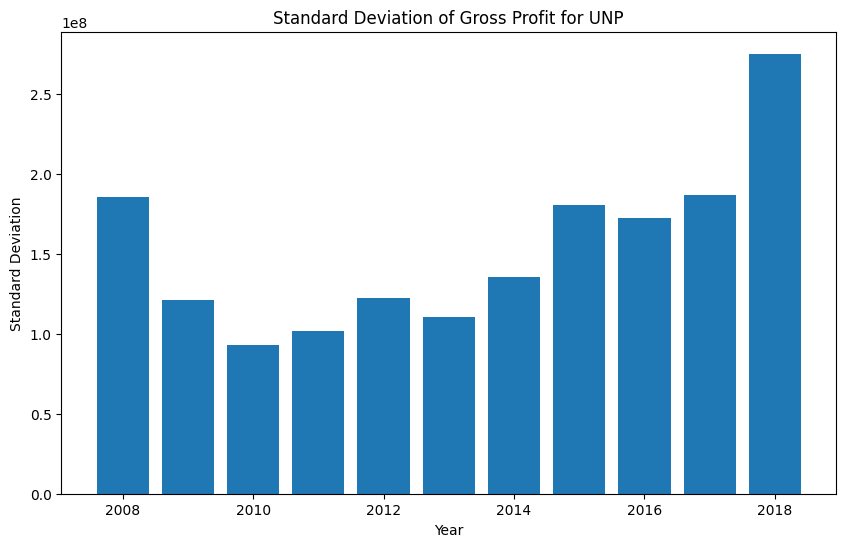

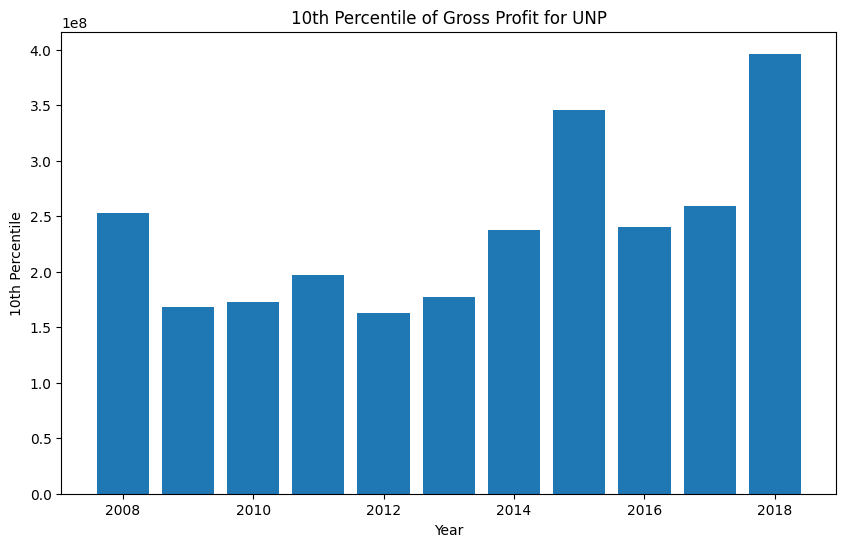

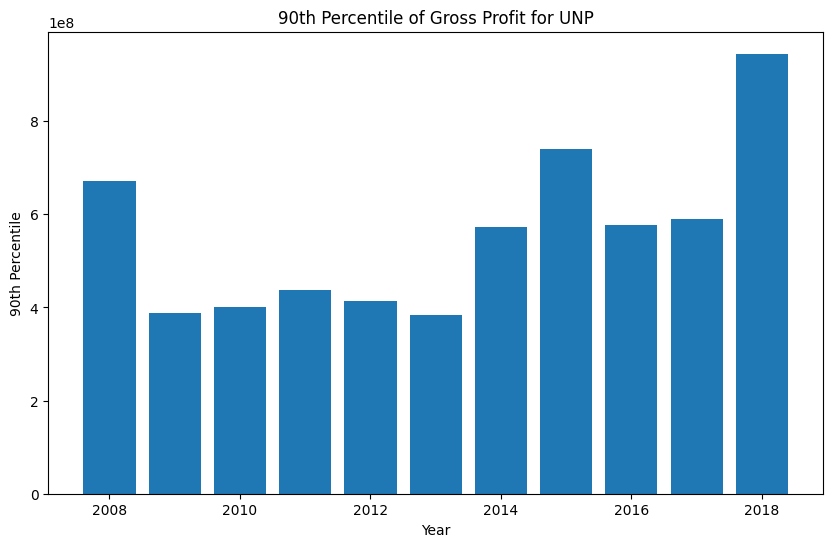

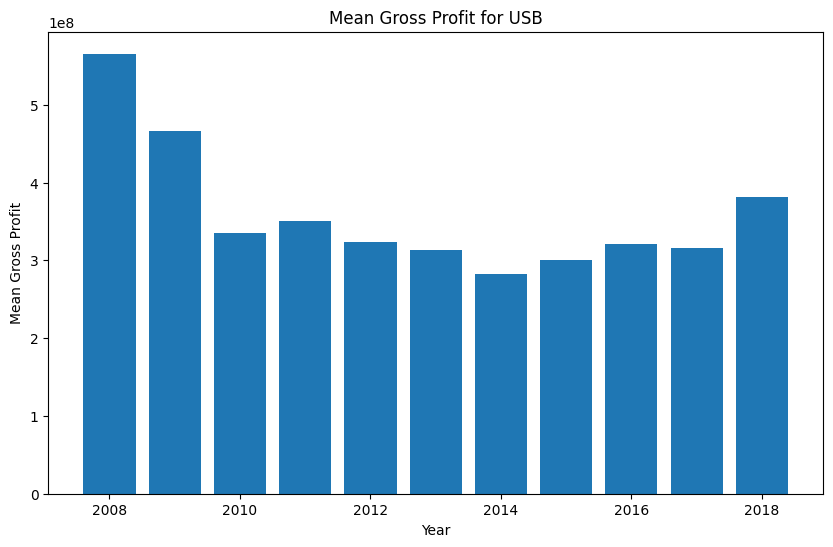

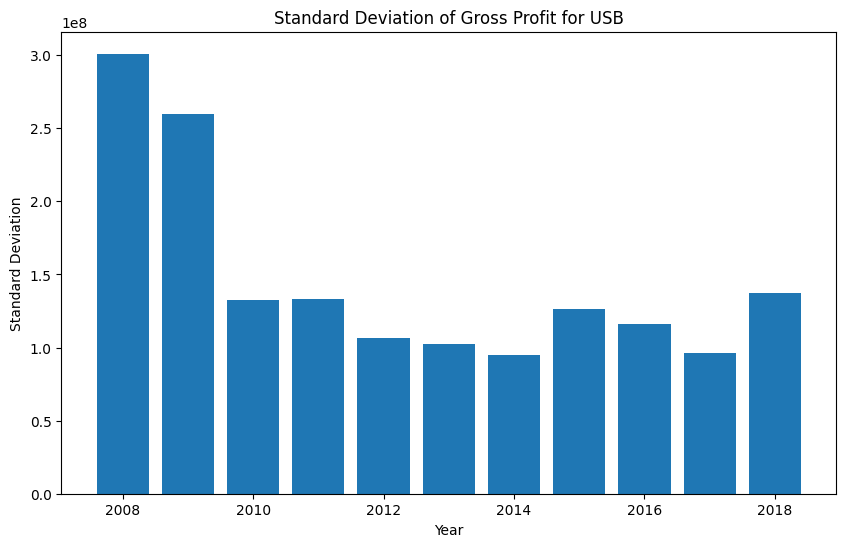

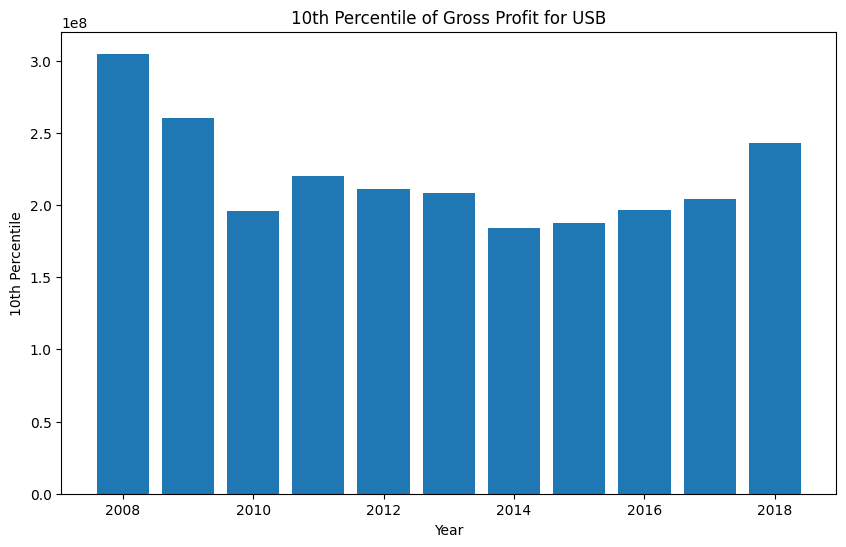

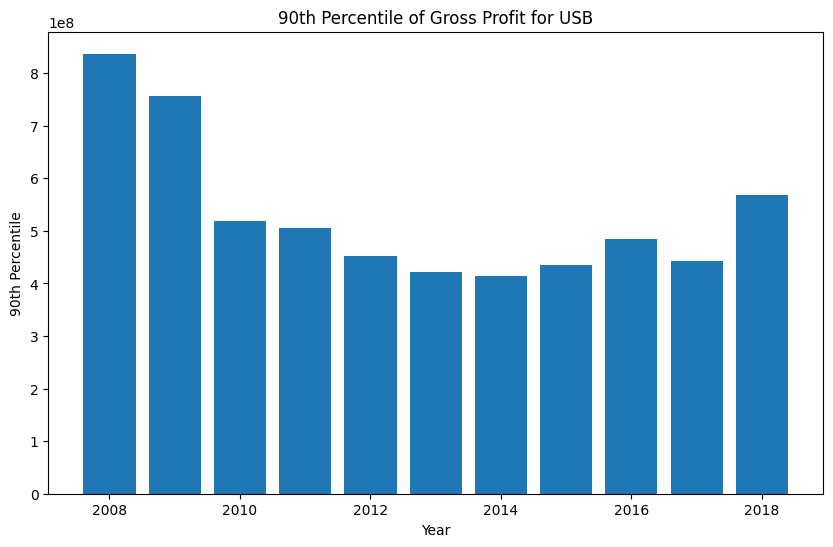

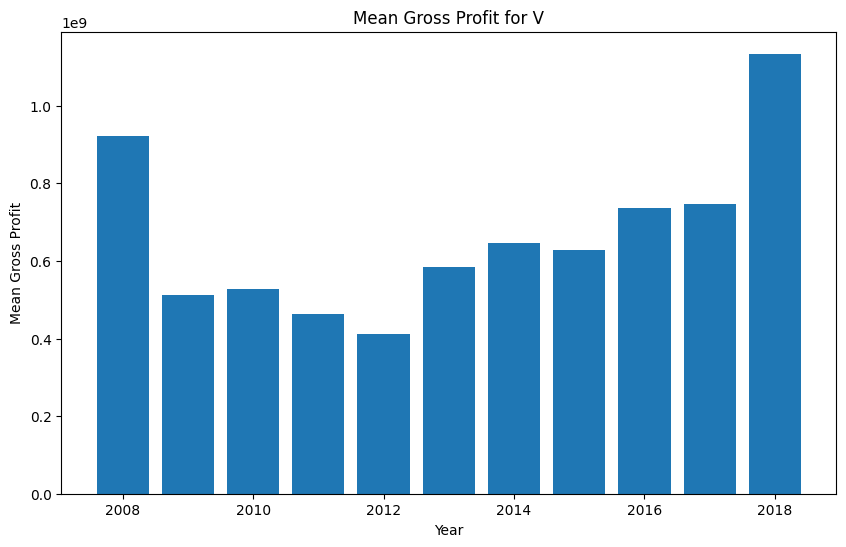

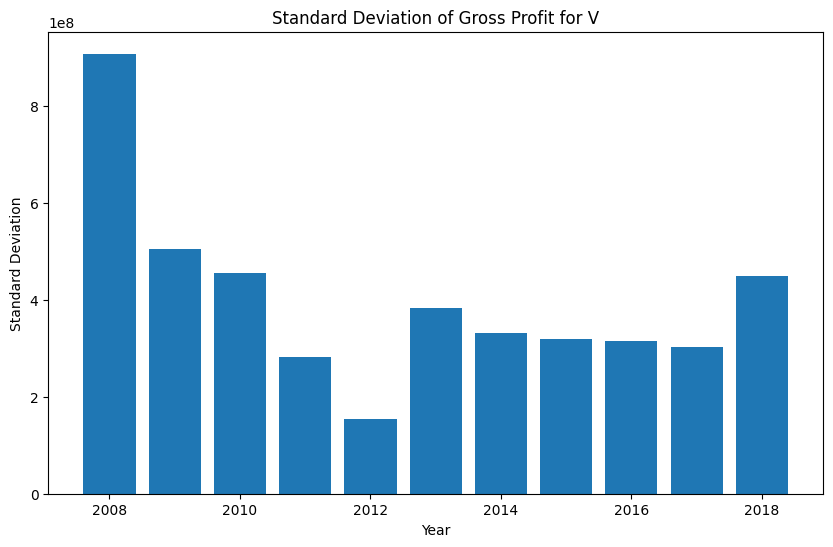

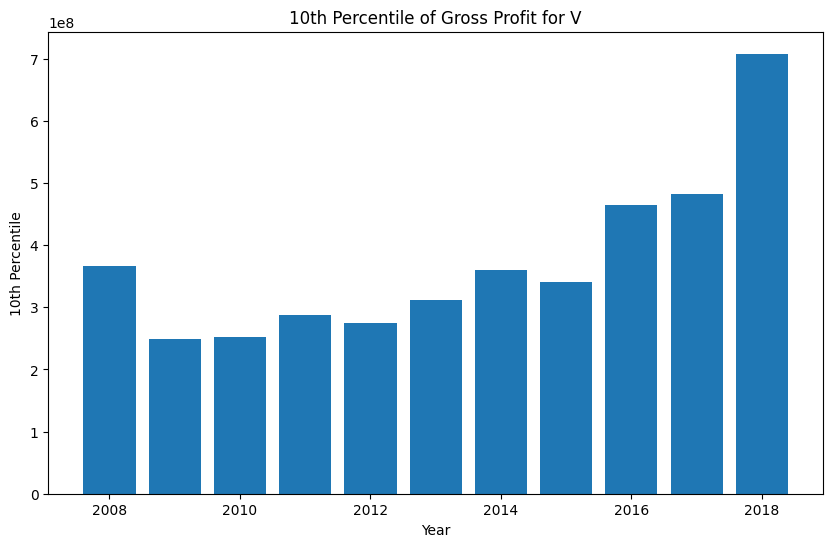

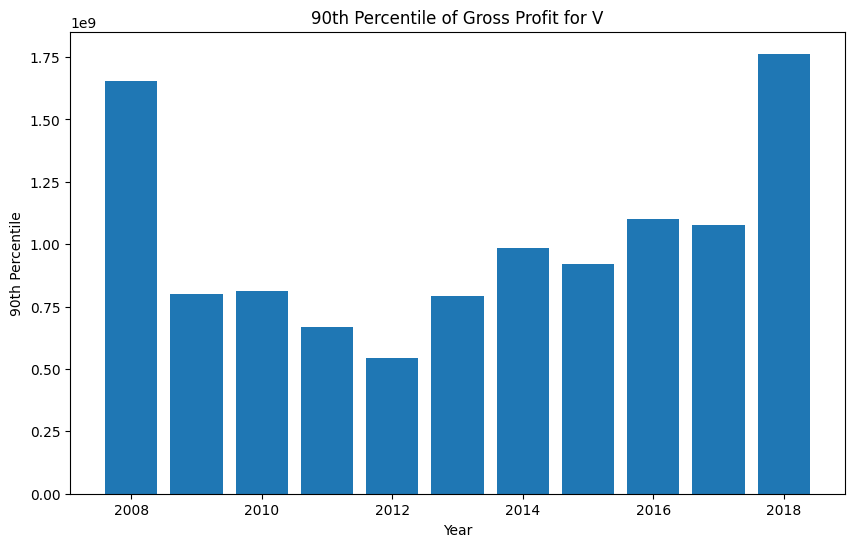

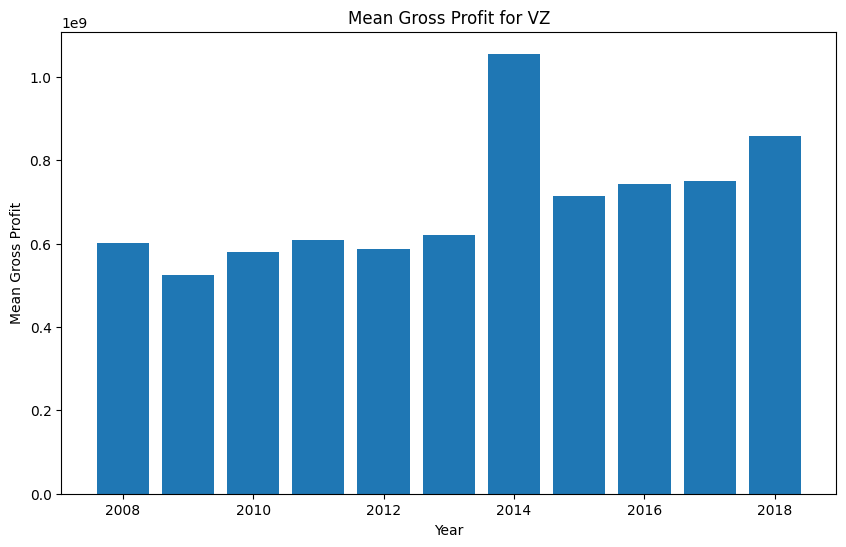

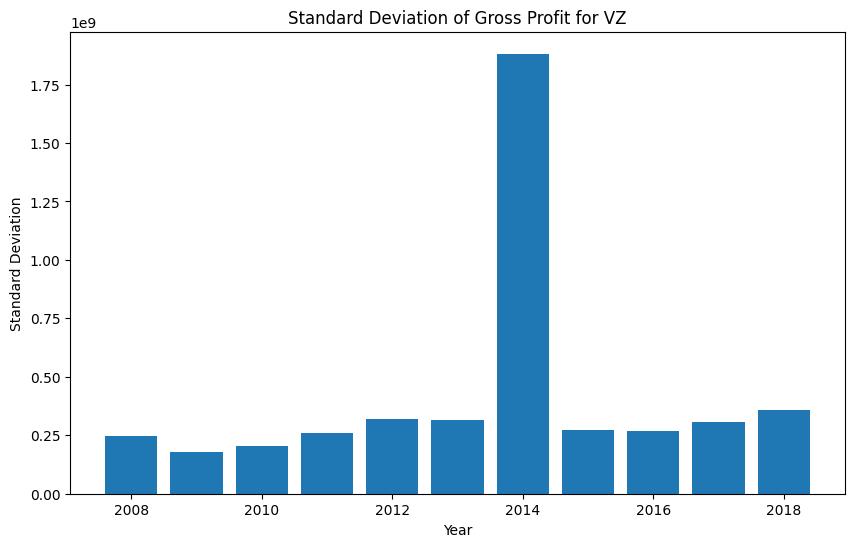

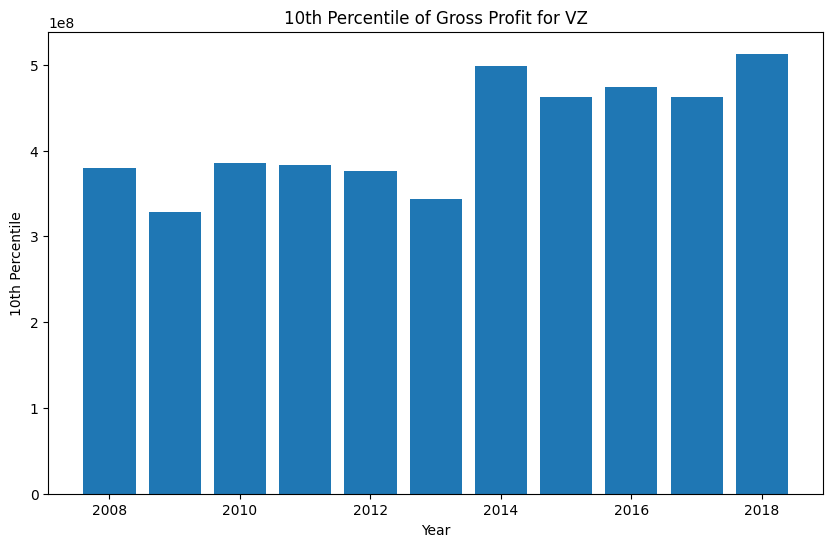

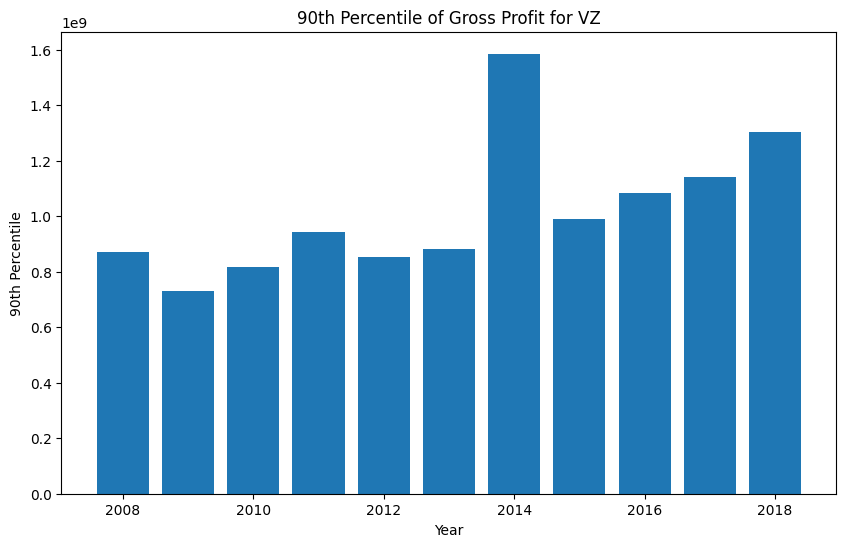

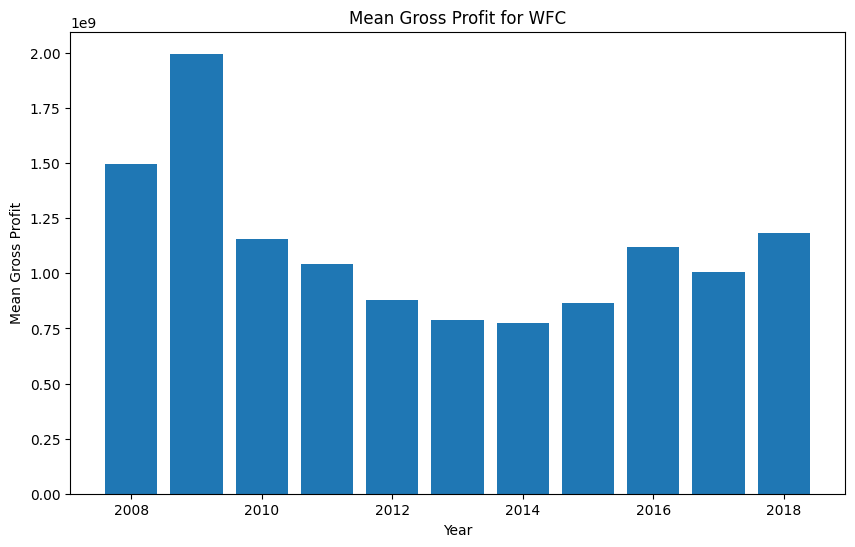

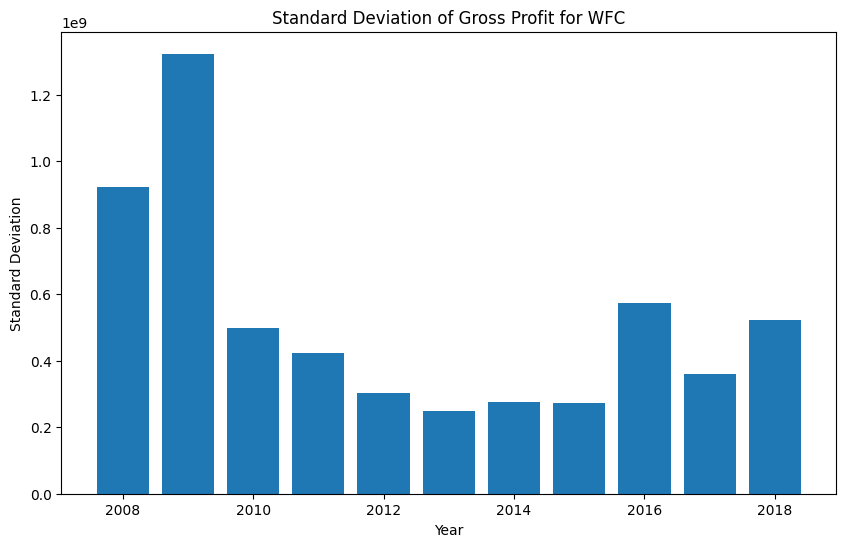

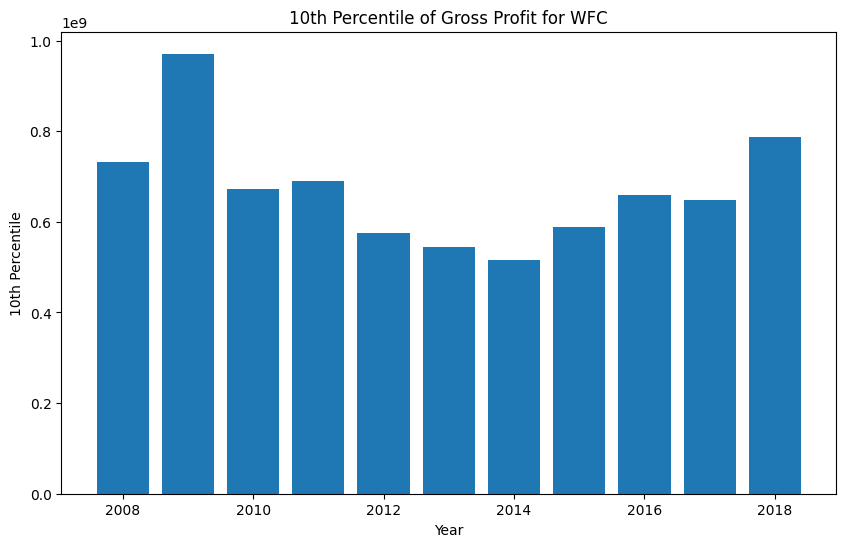

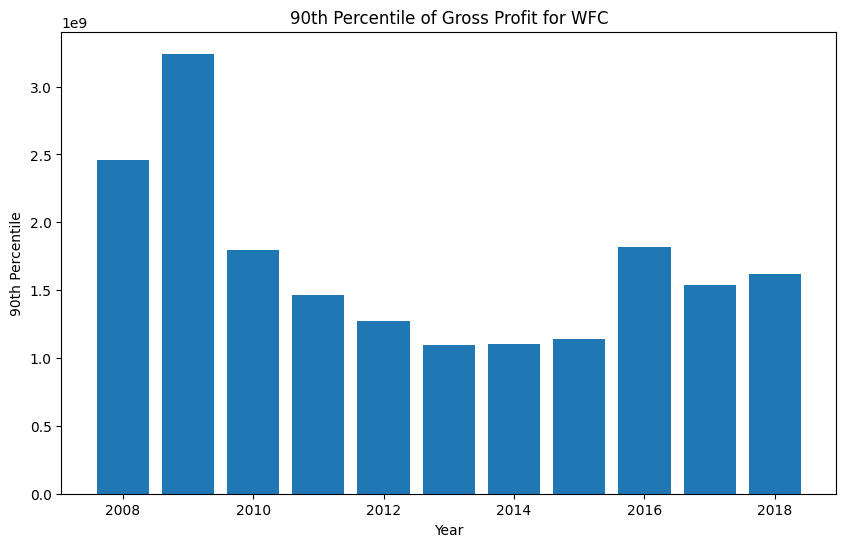

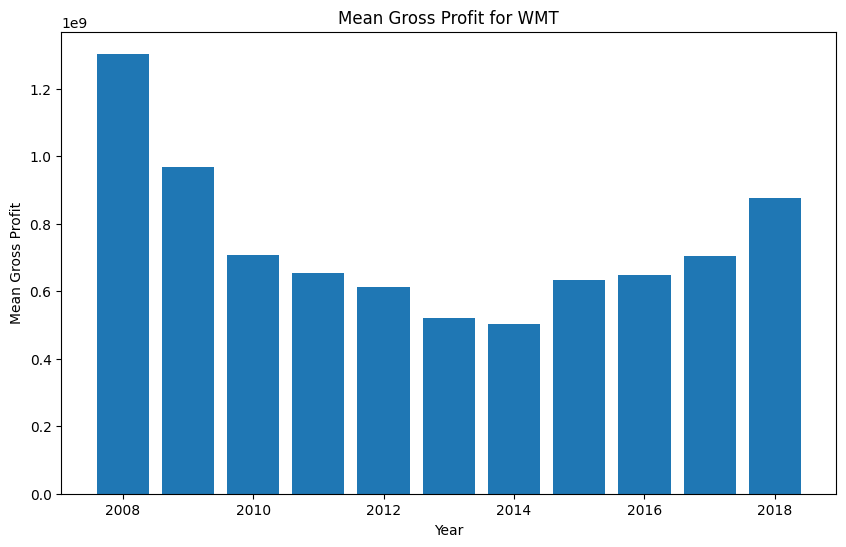

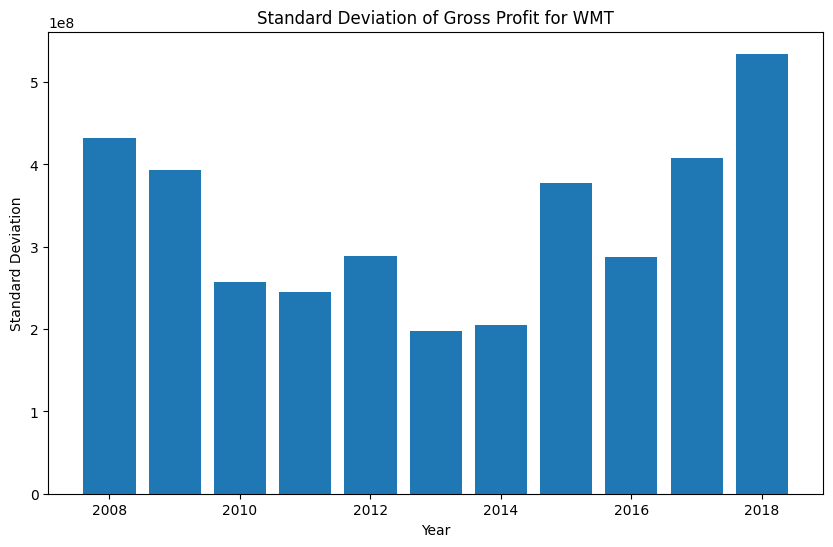

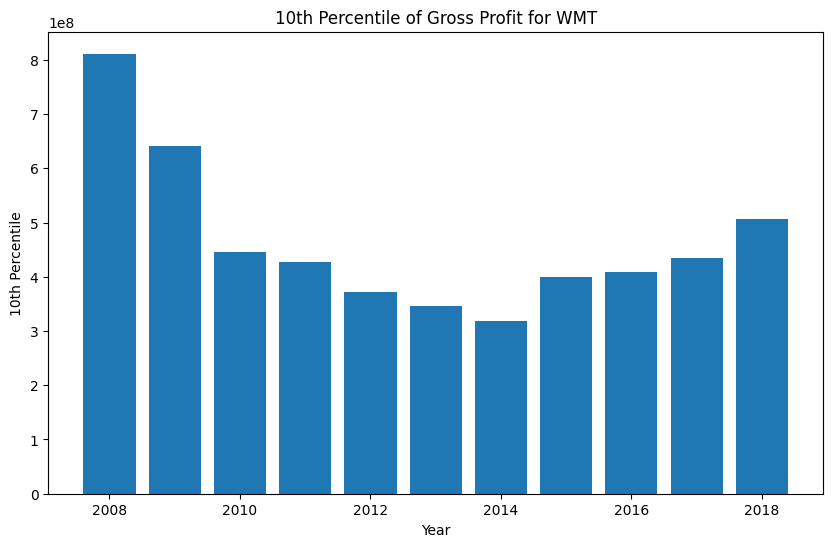

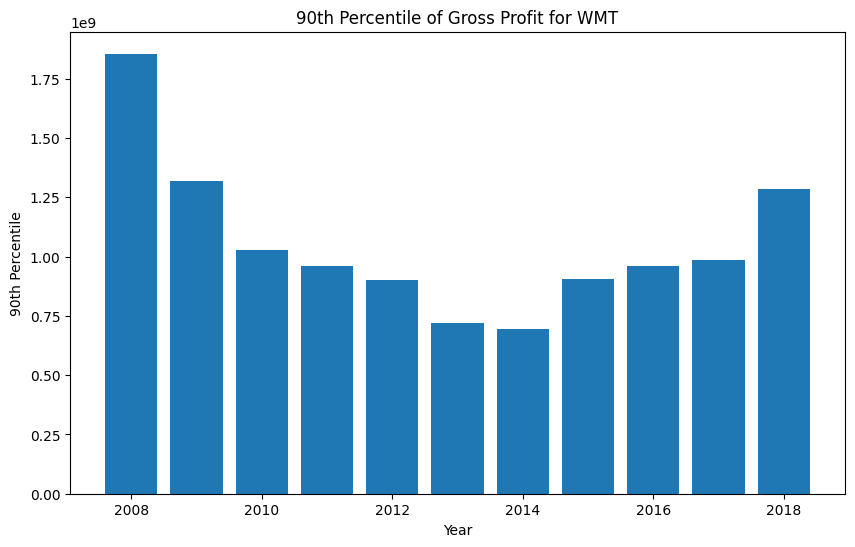

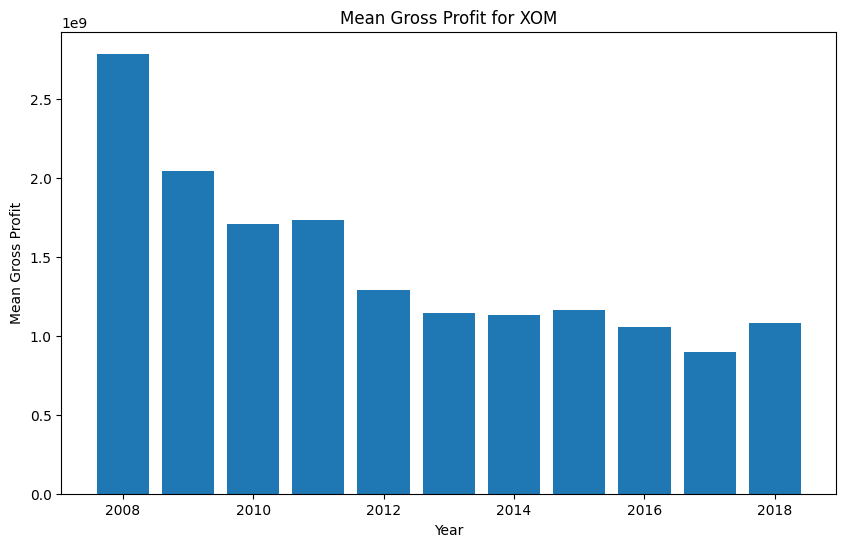

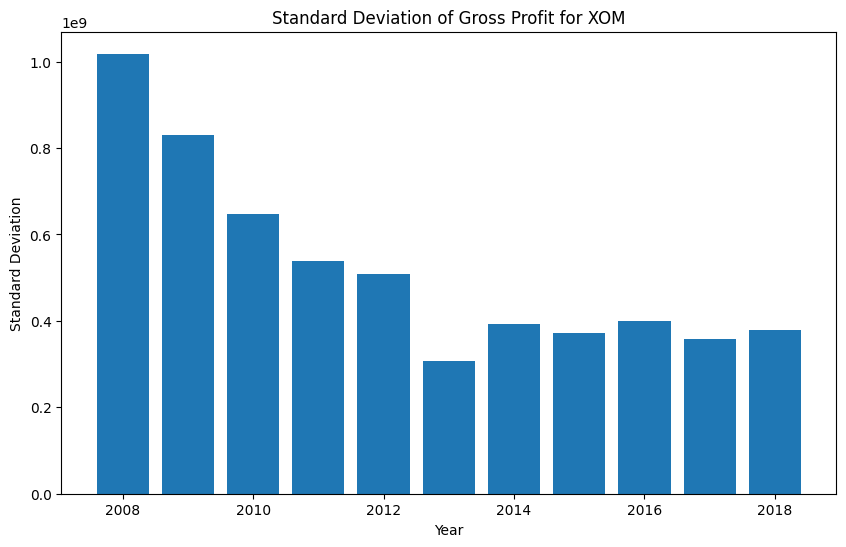

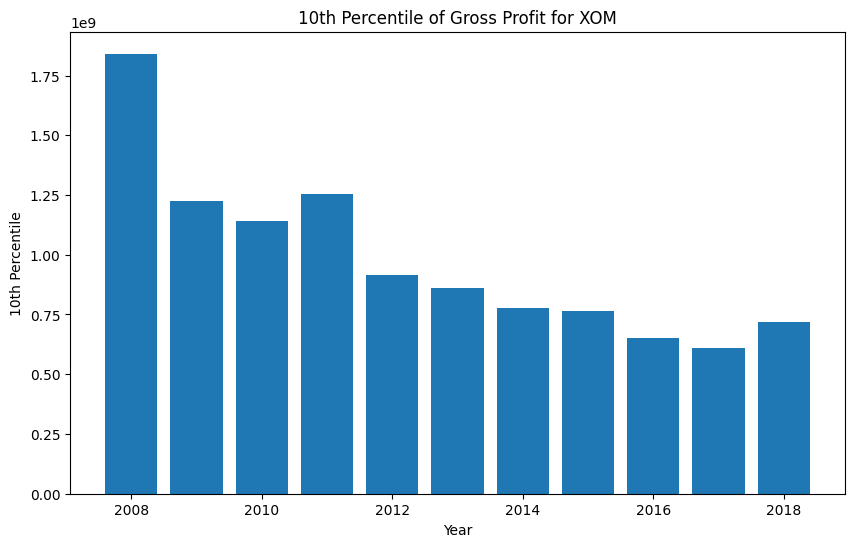

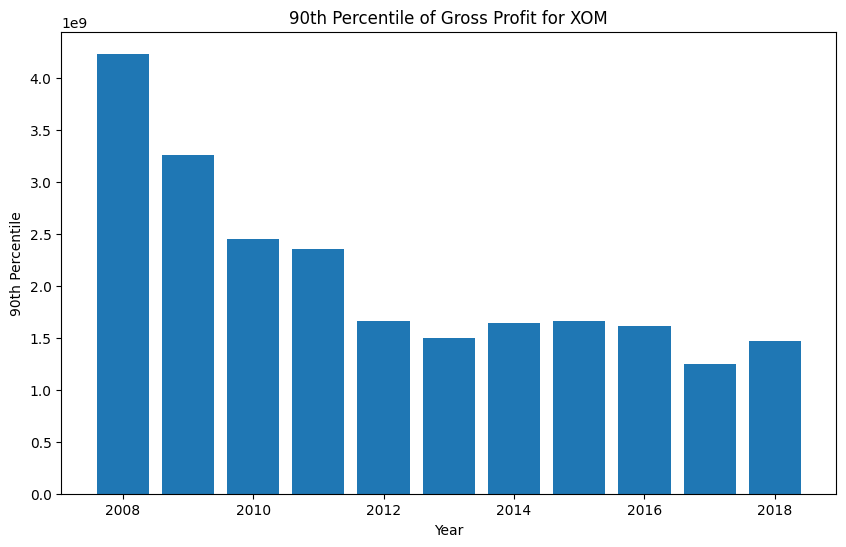

In [30]:

# Get the list of all unique companies
companies_list = analysis_results['Name'].unique()

# Loop through each company and create separate plots for their statistics
for selected_company in companies_list:
    # Filter data for the selected company
    selected_company_data = analysis_results[analysis_results['Name'] == selected_company]

    # Visualize Mean Gross Profit for the selected company and each year
    plt.figure(figsize=(10, 6))
    plt.bar(selected_company_data['Year'], selected_company_data['mean'])
    plt.xlabel('Year')
    plt.ylabel('Mean Gross Profit')
    plt.title(f'Mean Gross Profit for {selected_company}')
    plt.show()

    # Visualize Standard Deviation for the selected company and each year
    plt.figure(figsize=(10, 6))
    plt.bar(selected_company_data['Year'], selected_company_data['std'])
    plt.xlabel('Year')
    plt.ylabel('Standard Deviation')
    plt.title(f'Standard Deviation of Gross Profit for {selected_company}')
    plt.show()

    # Visualize 10th Percentile for the selected company and each year
    plt.figure(figsize=(10, 6))
    plt.bar(selected_company_data['Year'], selected_company_data['10th Percentile'])
    plt.xlabel('Year')
    plt.ylabel('10th Percentile')
    plt.title(f'10th Percentile of Gross Profit for {selected_company}')
    plt.show()

    # Visualize 90th Percentile for the selected company and each year
    plt.figure(figsize=(10, 6))
    plt.bar(selected_company_data['Year'], selected_company_data['90th Percentile'])
    plt.xlabel('Year')
    plt.ylabel('90th Percentile')
    plt.title(f'90th Percentile of Gross Profit for {selected_company}')
    plt.show()


**Forecasting future price changes using Monte Carlo Simulation for Apple Inc.**

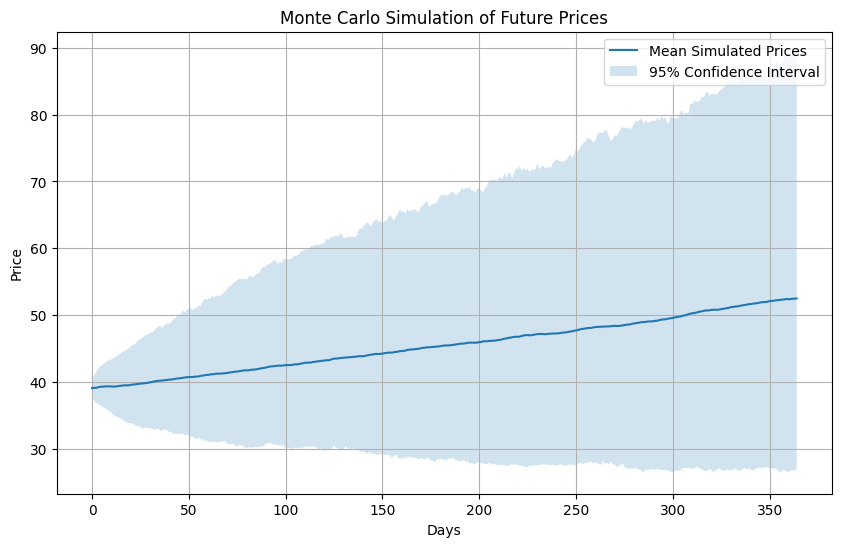

In [31]:
# Select the security data for the chosen security
selected_security = "AAPL"
security_data = data[data['Name'] == selected_security]

# Extract closing prices from the security data
closing_prices = security_data['Close'].values

# Calculate log returns based on the closing prices
log_returns = np.log(closing_prices[1:] / closing_prices[:-1])

# Calculate mean return and standard deviation of log returns
mean_return = np.mean(log_returns)
std_dev = np.std(log_returns)

# Retrieve the last price of the security
last_price = closing_prices[-1]

# Set the number of simulation days and simulations
simulation_days = 365
num_simulations = 1000

# Initialize an array to store the simulated price paths
simulated_price_paths = np.zeros((num_simulations, simulation_days))

# Perform Monte Carlo simulation
for i in range(num_simulations):
    # Generate random returns based on the mean return and standard deviation
    simulated_returns = np.random.normal(mean_return, std_dev, simulation_days)

    # Calculate the simulated price path using cumulative sum of the returns
    simulated_price_path = np.exp(simulated_returns.cumsum()) * last_price

    # Store the simulated price path in the array
    simulated_price_paths[i] = simulated_price_path


# Calculate mean simulated prices and upper/lower bounds for the confidence interval
mean_simulated_prices = np.mean(simulated_price_paths, axis=0)
upper_bound = np.percentile(simulated_price_paths, 95, axis=0)
lower_bound = np.percentile(simulated_price_paths, 5, axis=0)

# Plot the mean simulated prices and the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_days), mean_simulated_prices, label='Mean Simulated Prices')
plt.fill_between(range(simulation_days), lower_bound, upper_bound, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation of Future Prices')
plt.legend()
plt.grid(True)
plt.show()


**Calculation of statistical measures and forecasting price on 100th Day for Apple Inc.**

In [32]:
# Calculate statistical measures based on the mean simulated prices
mean_price = np.mean(mean_simulated_prices)
std_price = np.std(mean_simulated_prices)
percentile_10 = np.percentile(mean_simulated_prices, 10)
percentile_90 = np.percentile(mean_simulated_prices, 90)

# Set the price target and calculate the probability of achieving it
price_target = 43.0
probability_target = np.mean(mean_simulated_prices >= price_target)

# Calculate the Value at Risk (VaR) at the 5th percentile
var_5 = np.percentile(mean_simulated_prices, 5)

# Print the statistical measures
print("Statistical Measures:")
print(f"Mean Price: {mean_price:.2f}")
print(f"Standard Deviation: {std_price:.2f}")
print(f"10th Percentile: {percentile_10:.2f}")
print(f"90th Percentile: {percentile_90:.2f}")

# Print the probability of achieving the price target
print("Probability of Achieving Price Target:")
print(f"Price Target: {price_target:.2f}")
print(f"Probability: {probability_target:.2%}")

# Print the Value at Risk (VaR)
print("Value at Risk (VaR):")
print(f"5th Percentile (VaR): {var_5:.2f}")

Statistical Measures:
Mean Price: 45.49
Standard Deviation: 3.86
10th Percentile: 40.24
90th Percentile: 51.04
Probability of Achieving Price Target:
Price Target: 43.00
Probability: 68.77%
Value at Risk (VaR):
5th Percentile (VaR): 39.53


In [33]:
# Set the target day for the forecast
target_day = 100

# Retrieve the forecasted price at the target day from the mean simulated prices
forecasted_price = mean_simulated_prices[target_day]

# Set the price target and calculate the probability of achieving it
price_target = 43.0
probability_target = np.mean(mean_simulated_prices >= price_target)

# Calculate the Value at Risk (VaR) at the 5th percentile
var_5 = np.percentile(mean_simulated_prices, 5)

# Print the forecasts and risk assessment
print("Forecasts and Risk Assessment:")
print(f"Forecasted Price at Day {target_day}: {forecasted_price:.2f}")
print(f"Probability of Achieving Price Target {price_target}: {probability_target:.2%}")
print(f"Value at Risk (VaR) at 5th percentile: {var_5:.2f}")


Forecasts and Risk Assessment:
Forecasted Price at Day 100: 42.54
Probability of Achieving Price Target 43.0: 68.77%
Value at Risk (VaR) at 5th percentile: 39.53


**Calculation of call option price using Monte Carlo Simulation for Apple Inc.**

Option Price: 158.36939413012135


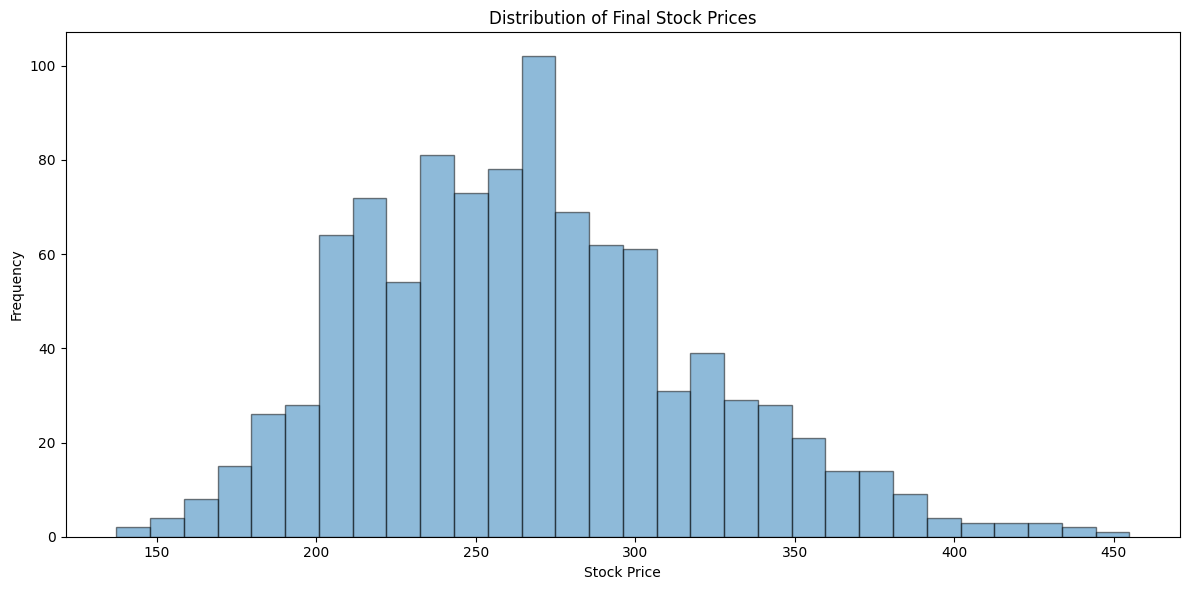

In [34]:
# Set the option type, strike price, and expiry
option_type = 'call'
strike_price = 100
expiry = 1

# Retrieve the stock prices from the data
stock_prices = data['Close']

# Set the risk-free rate and volatility
risk_free_rate = 0.05
volatility = 0.2

# Set the number of simulations and steps
num_simulations = 1000
num_steps = 252  #(No of trading days in a year)

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random numbers for the simulations
random_numbers = np.random.normal(size=(num_simulations, num_steps))

# Calculate time step and drift for the simulation
dt = expiry / num_steps
drift = (risk_free_rate - 0.5 * volatility ** 2) * dt
volatility_factor = volatility * np.sqrt(dt)

# Initialize stock price paths array
stock_price_paths = np.zeros((num_simulations, num_steps + 1))
stock_price_paths[:, 0] = stock_prices.iloc[-1]

# Simulate stock price paths
for i in range(num_simulations):
    for j in range(1, num_steps + 1):
        epsilon = random_numbers[i, j - 1]
        stock_price_paths[i, j] = stock_price_paths[i, j - 1] * np.exp(drift + volatility_factor * epsilon)

# Get final stock prices from the paths
final_stock_prices = stock_price_paths[:, -1]

# Calculate option payoffs based on option type
if option_type == 'call':
    option_payoffs = np.maximum(final_stock_prices - strike_price, 0)
else:
    option_payoffs = np.maximum(strike_price - final_stock_prices, 0)

# Calculate the discount factor and present value of the option
discount_factor = np.exp(-risk_free_rate * expiry)
option_present_value = discount_factor * np.mean(option_payoffs)

# Print the option price
print("Option Price:", option_present_value)


# Plot the distribution of final stock prices
plt.figure(figsize=(12, 6))
plt.hist(final_stock_prices, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Stock Prices')
plt.tight_layout()
plt.show()


**Calculation and visualization of the stock price path for Apple Inc.**

In [35]:
# Set the initial price of the stock
initial_price = filtered_data['Close'].iloc[-1]

# Retrieve the drift and volatility values for the selected security
drift = avg_returns_10yr.loc[avg_returns_10yr['Name'] == selected_security, 'Average Return 10 Years'].values[0]  # Drift or expected return based on average returns
volatility = std_dev_10yr.loc[std_dev_10yr['Name'] == selected_security, 'Standard Deviation 10 Years'].values[0]  # Volatility based on standard deviation


# Set the number of steps and time increment
num_steps = len(filtered_data)
dt = 1 / num_steps

# Generate random increments using a normal distribution
random_increments = np.random.normal(0, 1, size=num_steps)


# Initialize the stock price path array
stock_price_path = np.zeros(num_steps + 1)
stock_price_path[0] = initial_price

# Simulate the stock price path
for i in range(num_steps):
    drift_term = drift * stock_price_path[i] * dt
    volatility_term = volatility * stock_price_path[i] * np.sqrt(dt) * random_increments[i]
    stock_price_path[i+1] = stock_price_path[i] + drift_term + volatility_term


# Set print options to display the full array
np.set_printoptions(threshold=np.inf)


# Print the stock price path
print("Stock Price Path:")
print(stock_price_path)


Stock Price Path:
[ 90.11000061  87.26762608  87.81037497  88.69941695  89.78415302
  92.91733751  91.67034895  89.38333379  88.81665853  90.20866018
  89.57814211  88.49649868  86.97199259  87.94032505  89.9192767
  88.23796939  87.33203717  87.46089586  85.48281677  84.55201937
  83.28657968  82.67237563  84.11836333  82.86647482  83.40189662
  79.35621769  78.64681403  79.97056357  83.11995389  79.66720875
  78.21973372  78.29862754  79.65548004  78.84380183  79.3384494
  79.25034987  78.03634048  78.13849578  79.84276018  79.0792598
  79.96418198  80.85560436  82.55944631  81.49787556  80.49452261
  80.17515332  80.63761382  79.74289879  81.49964275  81.39001967
  81.07664646  81.57930379  79.48673871  80.71136667  80.96282987
  79.10100692  76.81636591  79.26525991  75.35073046  75.28268698
  73.84680132  75.02336553  75.13975021  75.17021838  75.6079733
  73.70031529  73.1314886   72.76695319  73.64055745  72.61499623
  68.23435956  66.54360939  67.5721974   68.31567804  70.06366

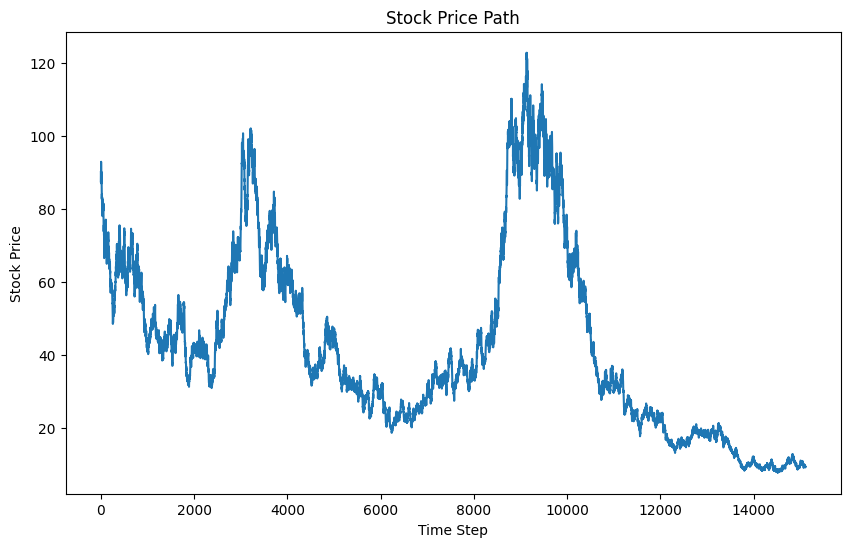

In [36]:
# Plot the stock price path
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps + 1), stock_price_path)
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.title('Stock Price Path')
plt.show()